In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [244]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import cohen_kappa_score, accuracy_score, classification_report, confusion_matrix 
from sklearn.metrics import recall_score, roc_auc_score, roc_curve

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import statsmodels.api as sm
from scipy import stats

In [4]:
raw_data = pd.read_csv('Heartdisease.csv')
raw_data.head()

Unnamed: 0  _STATE  FMONTH        IDATE IMONTH   IDAY    IYEAR  DISPCODE  \
0           0     1.0     1.0  b'01042020'  b'01'  b'04'  b'2020'    1100.0   
1           1     1.0     1.0  b'02072020'  b'02'  b'07'  b'2020'    1200.0   
2           2     1.0     1.0  b'01232020'  b'01'  b'23'  b'2020'    1100.0   
3           3     1.0     1.0  b'01092020'  b'01'  b'09'  b'2020'    1100.0   
4           4     1.0     1.0  b'01042020'  b'01'  b'04'  b'2020'    1100.0   

           SEQNO          _PSU  CTELENM1  PVTRESD1  COLGHOUS  STATERE1  \
0  b'2020000001'  2.020000e+09       1.0       1.0       NaN       1.0   
1  b'2020000002'  2.020000e+09       1.0       1.0       NaN       1.0   
2  b'2020000003'  2.020000e+09       1.0       1.0       NaN       1.0   
3  b'2020000004'  2.020000e+09       1.0       1.0       NaN       1.0   
4  b'2020000005'  2.020000e+09       1.0       1.0       NaN       1.0   

   CELPHONE  LADULT1  COLGSEX  NUMADULT  LANDSEX        NUMMEN  NUMWOMEN  \
0       2.0      1.0      NaN       1.0      2.0  5.397605e-79       1.0   
1       2.0      1.0      NaN       1.0      2.0  5.397605e-79       1.0   
2       2.0      1.0      NaN       1.0      2.0  5.397605e-79       1.0   
3       2.0      1.0      NaN       1.0      2.0  5.397605e-79       1.0   
4       2.0      1.0      NaN       1.0      2.0  5.397605e-79       1.0   

   RESPSLCT  SAFETIME  CTELNUM1  CELLFON5  CADULT1  CELLSEX  PVTRESD3  \
0       NaN       NaN       NaN       NaN      NaN      NaN       NaN   
1       NaN       NaN       NaN       NaN      NaN      NaN       NaN   
2       NaN       NaN       NaN       NaN      NaN      NaN       NaN   
3       NaN       NaN       NaN       NaN      NaN      NaN       NaN   
4       NaN       NaN       NaN       NaN      NaN      NaN       NaN   

   CCLGHOUS  CSTATE1  LANDLINE  HHADULT  SEXVAR  GENHLTH  PHYSHLTH  MENTHLTH  \
0       NaN      NaN       NaN      NaN     2.0      2.0       3.0      30.0   
1       NaN      NaN       NaN      NaN     2.0      3.0      88.0      88.0   
2       NaN      NaN       NaN      NaN     2.0      3.0      88.0      88.0   
3       NaN      NaN       NaN      NaN     2.0      1.0      88.0      88.0   
4       NaN      NaN       NaN      NaN     2.0      2.0      88.0      88.0   

   POORHLTH  HLTHPLN1  PERSDOC2  MEDCOST  CHECKUP1  EXERANY2  SLEPTIM1  \
0       3.0       2.0       3.0      1.0       4.0       1.0       5.0   
1       NaN       1.0       1.0      1.0       1.0       1.0       7.0   
2       NaN       1.0       1.0      2.0       1.0       1.0       7.0   
3       NaN       1.0       3.0      2.0       2.0       2.0       6.0   
4       NaN       1.0       1.0      2.0       1.0       1.0       7.0   

   CVDINFR4  CVDCRHD4  CVDSTRK3  ASTHMA3  ASTHNOW  CHCSCNCR  CHCOCNCR  \
0       2.0       2.0       2.0      1.0      1.0       1.0       1.0   
1       2.0       2.0       2.0      1.0      2.0       2.0       2.0   
2       2.0       2.0       2.0      2.0      NaN       2.0       1.0   
3       2.0       2.0       2.0      2.0      NaN       2.0       2.0   
4       2.0       2.0       1.0      2.0      NaN       2.0       2.0   

   CHCCOPD2  HAVARTH4  ADDEPEV3  CHCKDNY2  DIABETE4  DIABAGE3  LASTDEN4  \
0       1.0       1.0       1.0       2.0       1.0      35.0       1.0   
1       2.0       1.0       1.0       2.0       3.0       NaN       1.0   
2       2.0       1.0       2.0       2.0       3.0       NaN       1.0   
3       2.0       2.0       2.0       2.0       3.0       NaN       7.0   
4       2.0       2.0       2.0       2.0       3.0       NaN       7.0   

   RMVTETH4  MARITAL  EDUCA  RENTHOM1  NUMHHOL3  NUMPHON3  CPDEMO1B  VETERAN3  \
0       2.0      2.0    6.0       1.0       2.0       NaN       1.0       2.0   
1       1.0      3.0    6.0       1.0       1.0       1.0       1.0       2.0   
2       7.0      1.0    5.0       1.0       2.0       NaN       1.0       2.0   
3       1.0      3.0    4.0       1.0       9.0

In [5]:
# Part 1 - dropping columns based on relevance

cols_drop = ['Unnamed: 0', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'QSTLANG', 'MSCODE', '_STSTR', 'QSTVER', '_STRWT', '_RAWRAKE', 
             '_WT2RAKE', '_CHISPNC', '_CRACE1', '_CPRACE', '_CLLCPWT', '_DUALUSE', '_DUALCOR', '_LLCPWT2', '_LLCPWT', '_ALTETH3', '_FLSHOT7', '_PNEUMO3', 
             '_RFMAM22', '_MAM5023', '_RFPAP35', '_RFPSA23', '_CLNSCPY', '_SGMSCPY', '_SGMS10Y', '_RFBLDS4', '_STOLDNA', '_VIRCOLN', '_SBONTIM', '_CRCREC1', 
             'CTELENM1', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHONE', 'LADULT1', 'COLGSEX', 'NUMADULT', 'LANDSEX', 'NUMMEN', 'NUMWOMEN', 'RESPSLCT', 
             'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'CELLSEX', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'POORHLTH', 'CVDINFR4', 'CVDCRHD4', 
             'DIABAGE3', 'RMVTETH4', 'RENTHOM1', 'NUMHHOL3', 'NUMPHON3', 'CPDEMO1B', 'STOPSMK2', 'ALCDAY5', 'FLSHTMY3', 'FALL12MN', 'FALLINJ4', 'HADMAM',
             'HOWLONG', 'HADPAP2', 'LASTPAP2', 'HPVTEST', 'HPLSTTST', 'HADHYST2', 'PCPSAAD3', 'PCPSADI1', 'PCPSARE1', 'PSATEST1', 'PSATIME', 'PCPSARS1', 
             'COLNSCPY', 'COLNTEST', 'SIGMSCPY', 'SIGMTEST', 'BLDSTOL1', 'LSTBLDS4', 'STOOLDNA', 'SDNATEST', 'VIRCOLON', 'VCLNTEST', 'HIVTSTD3', 'PDIABTST', 
             'PREDIAB1', 'INSULIN1', 'BLDSUGAR', 'FEETCHK3', 'DOCTDIAB', 'CHKHEMO3', 'FEETCHK', 'EYEEXAM1', 'DIABEYE', 'DIABEDU', 'TOLDCFS', 'HAVECFS', 
             'WORKCFS', 'TOLDHEPC', 'TRETHEPC', 'PRIRHEPC', 'HAVEHEPC', 'HAVEHEPB', 'MEDSHEPB', 'HLTHCVR1', 'CIMEMLOS', 'CDHOUSE', 'CDASSIST', 'CDHELP', 
             'CDSOCIAL', 'CDDISCUS', 'CAREGIV1', 'CRGVREL4', 'CRGVLNG1', 'CRGVHRS1', 'CRGVPRB3', 'CRGVALZD', 'CRGVPER1', 'CRGVHOU1', 'CRGVEXPT', 'LCSFIRST', 
             'LCSLAST', 'LCSCTSCN', 'CNCRAGE', 'CNCRTYP1', 'CSRVTRT3', 'CSRVDOC1', 'CSRVSUM', 'CSRVRTRN', 'CSRVINST', 'CSRVINSR', 'CSRVDEIN', 'CSRVCLIN', 
             'CSRVPAIN', 'CSRVCTL2', 'PCPSADE1', 'PCDMDEC1', 'HPVADVC4', 'HPVADSHT', 'TETANUS1', 'IMFVPLA1', 'BIRTHSEX', 'SOMALE', 'SOFEMALE', 'TRNSGNDR', 
             'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX', 'RCSGENDR', 
             'RCSRLTN2', 'CASTHDX2', 'CASTHNO2']

In [6]:
data = raw_data.drop(cols_drop, axis=1)
data.head()

_STATE  HHADULT  SEXVAR  GENHLTH  PHYSHLTH  MENTHLTH  HLTHPLN1  PERSDOC2  \
0     1.0      NaN     2.0      2.0       3.0      30.0       2.0       3.0   
1     1.0      NaN     2.0      3.0      88.0      88.0       1.0       1.0   
2     1.0      NaN     2.0      3.0      88.0      88.0       1.0       1.0   
3     1.0      NaN     2.0      1.0      88.0      88.0       1.0       3.0   
4     1.0      NaN     2.0      2.0      88.0      88.0       1.0       1.0   

   MEDCOST  CHECKUP1  EXERANY2  SLEPTIM1  CVDSTRK3  ASTHMA3  ASTHNOW  \
0      1.0       4.0       1.0       5.0       2.0      1.0      1.0   
1      1.0       1.0       1.0       7.0       2.0      1.0      2.0   
2      2.0       1.0       1.0       7.0       2.0      2.0      NaN   
3      2.0       2.0       2.0       6.0       2.0      2.0      NaN   
4      2.0       1.0       1.0       7.0       1.0      2.0      NaN   

   CHCSCNCR  CHCOCNCR  CHCCOPD2  HAVARTH4  ADDEPEV3  CHCKDNY2  DIABETE4  \
0       1.0       1.0       1.0       1.0       1.0       2.0       1.0   
1       2.0       2.0       2.0       1.0       1.0       2.0       3.0   
2       2.0       1.0       2.0       1.0       2.0       2.0       3.0   
3       2.0       2.0       2.0       2.0       2.0       2.0       3.0   
4       2.0       2.0       2.0       2.0       2.0       2.0       3.0   

   LASTDEN4  MARITAL  EDUCA  VETERAN3  EMPLOY1  CHILDREN  INCOME2  PREGNANT  \
0       1.0      2.0    6.0       2.0      4.0      88.0      1.0       NaN   
1       1.0      3.0    6.0       2.0      7.0      88.0     99.0       NaN   
2       1.0      1.0    5.0       2.0      7.0      88.0      7.0       NaN   
3       7.0      3.0    4.0       2.0      5.0      88.0     99.0       NaN   
4       7.0      3.0    6.0       2.0      7.0      88.0     77.0       NaN   

   WEIGHT2  HEIGHT3  DEAF  BLIND  DECIDE  DIFFWALK  DIFFDRES  DIFFALON  \
0    106.0    507.0   2.0    2.0     1.0       2.0       2.0       2.0   
1    170.0    504.0   2.0    2.0     2.0       2.0       2.0       2.0   
2   7777.0    508.0   2.0    2.0     2.0       2.0       2.0       2.0   
3   9999.0   9999.0   2.0    2.0     2.0       2.0       2.0       2.0   
4    126.0    506.0   2.0    2.0     2.0       2.0       2.0       2.0   

   SMOKE100  SMOKDAY2  LASTSMK2  USENOW3  AVEDRNK3  DRNK3GE5  MAXDRNKS  \
0       1.0       1.0       NaN      3.0       NaN       NaN       NaN   
1       NaN       NaN       NaN      NaN       NaN       NaN       NaN   
2       2.0       NaN       NaN      3.0       NaN       NaN       NaN   
3       2.0       NaN       NaN      3.0       NaN       NaN       NaN   
4       2.0       NaN       NaN      3.0       NaN       NaN       NaN   

   FLUSHOT7  SHINGLE2  PNEUVAC4  SEATBELT  DRNKDRI2  HIVTST7  HIVRISK5  \
0       2.0       2.0       2.0       1.0       NaN      1.0       2.0   
1       NaN       NaN       NaN       NaN       NaN      NaN       NaN   
2       1.0       2.0       2.0       1.0       NaN      2.0       2.0   
3       2.0       2.0       2.0       1.0       NaN      2.0       2.0   
4       1.0       1.0       1.0       1.0       NaN      7.0       2.0   

   ECIGARET  ECIGNOW  MARIJAN1  USEMRJN2  RSNMRJN1  LCSNUMCG  CNCRDIFF  \
0       1.0      3.0       NaN       NaN       NaN       NaN       NaN   
1       NaN      NaN       NaN       NaN       NaN       NaN       NaN   
2       2.0      NaN       NaN       NaN       NaN       NaN       NaN   
3       2.0      NaN       NaN       NaN       NaN       NaN       NaN   
4       2.0      NaN       NaN       NaN       NaN       NaN       NaN   

   _METSTAT  _URBSTAT  _IMPRACE  _RFHLTH  _PHYS14D  _MENT14D  _HCVU651  \
0       1.0       1.0       1.0      1.0       2.0       3.0       2.0   
1       1.0       1.0       2.0      1.0       1.0       1.0       9.0   
2       1.0       1.0       2.0      1.0       1.0       1.0       9.0   
3       1.0       1.0       1.0      1.0       1.0       1.0       9.0   
4       1.0       1

In [7]:
data.shape

(401958, 106)

In [8]:
# Part 2 - dropping feature engineered variables

cols_drop_engineered_vars = ['_URBSTAT', 'ASTHMA3', 'ASTHNOW', '_LTASTH1', '_CASTHM1', 'HAVARTH4', '_DENVST3', 'LASTDEN4', '_PRACE1', '_MRACE1', 
                             '_HISPANC', '_RACE', '_RACEG21', '_RACEGR3', '_RACEPRV', '_AGEG5YR', '_AGE65YR', '_AGE_G', 'HTM4', '_BMI5CAT', '_RFBMI5', 
                             '_RFSMOK3', 'SMOKE100', 'SMOKDAY2', 'LASTSMK2', 'USENOW3', 'ECIGARET', 'ECIGNOW', 'LCSNUMCG', 'MAXDRNKS', 
                             '_DRNKDRV', '_RFSEAT2', '_RFSEAT3', 'SEATBELT', 'DRNKDRI2', 'SEXVAR', 'DECIDE', '_MENT14D', '_RFHLTH', '_PHYS14D', 
                             '_HCVU651', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'EXERANY2', 'CNCRDIFF', 'DIFFDRES', 'DIFFALON', 'FLUSHOT7', 
                             'SHINGLE2', 'PNEUVAC4', '_AIDTST4', 'HIVTST7', 'HIVRISK5', 'USEMRJN2', 'RSNMRJN1', 'EDUCA', 'VETERAN3', 'CHILDREN', 
                             'INCOME2', '_CHLDCNT', 'PREGNANT', 'HEIGHT3', 'WEIGHT2']

print('Number of columns to be dropped which belong to engineered variables: ', len(cols_drop_engineered_vars))

Number of columns to be dropped which belong to engineered variables:  65


In [9]:
data.drop(cols_drop_engineered_vars, axis=1, inplace=True)

data.shape

(401958, 41)

In [12]:
# dropping all rows where the target response is missing

drop_ind = data.index[data['_MICHD'].isna()]
data.drop(drop_ind, axis=0, inplace=True)
    

# Splitting the train and test data

In [13]:
train, test = train_test_split(data, test_size=0.3, random_state=42, stratify=data['_MICHD'])

In [14]:
print(train.shape)
print(test.shape)

(278870, 41)
(119517, 41)


# X_transformation_pipeline

## Imputing Missing values

In [15]:
train.isna().sum()

_STATE           0
HHADULT      86198
GENHLTH          3
PHYSHLTH         1
MENTHLTH         1
SLEPTIM1         0
CVDSTRK3         0
CHCSCNCR         0
CHCOCNCR         0
CHCCOPD2         2
ADDEPEV3         2
CHCKDNY2         2
DIABETE4         2
MARITAL          6
EMPLOY1       1976
DEAF          8513
BLIND         9157
DIFFWALK     10520
AVEDRNK3    146080
DRNK3GE5    146442
MARIJAN1    188517
_METSTAT      4997
_IMPRACE         0
_TOTINDA         0
_MICHD           0
_ASTHMS1         0
_DRDXAR2      1355
_EXTETH3         0
_SEX             0
_AGE80           0
HTIN4        16359
WTKG3        24109
_BMI5        28544
_EDUCAG          0
_INCOMG          0
_SMOKER3         0
DRNKANY5         0
DROCDY3_         0
_RFBING5         0
_DRNKWK1         0
_RFDRHV7         0
dtype: int64

In [16]:
def replace_with_custom(data):
    # replace missing data with custom values
    data['EMPLOY1'].fillna(0, inplace=True)
    data['AVEDRNK3'].fillna(0, inplace=True)
    data['DRNK3GE5'].fillna(0, inplace=True)
    data['MARIJAN1'].fillna(0, inplace=True)
    
    return data

train = replace_with_custom(train)

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [13]:
# after replace_with_custom, before replacena_with_median_mode
train.isna().sum()

_STATE          0
HHADULT     87520
GENHLTH         5
PHYSHLTH        2
MENTHLTH        2
SLEPTIM1        1
CVDSTRK3        1
CHCSCNCR        1
CHCOCNCR        1
CHCCOPD2        3
ADDEPEV3        4
CHCKDNY2        4
DIABETE4        4
MARITAL         6
EMPLOY1         0
DEAF         8679
BLIND        9336
DIFFWALK    10714
AVEDRNK3        0
DRNK3GE5        0
MARIJAN1        0
_METSTAT     4983
_IMPRACE        0
_TOTINDA        0
_MICHD       2488
_ASTHMS1        0
_DRDXAR2     1611
_EXTETH3        0
_SEX            0
_AGE80          0
HTIN4       16639
WTKG3       24324
_BMI5       28863
_EDUCAG         0
_INCOMG         0
_SMOKER3        0
DRNKANY5        0
DROCDY3_        0
_RFBING5        0
_DRNKWK1        0
_RFDRHV7        0
dtype: int64

In [17]:
# function to replace missing values with median or mode

def replacena_with_median_mode(data):
    
    replacena_with_median_cols = ['HHADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'SLEPTIM1', 'HTIN4']
    
    replacena_with_mode_cols = ['CVDSTRK3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD2', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4',
                               'MARITAL', 'DEAF', 'BLIND', 'DIFFWALK', '_METSTAT', '_DRDXAR2']
    
    for col in data.columns:
        
        if col in replacena_with_median_cols:
            data[col].fillna(data[col].median(), inplace=True)
        elif col in replacena_with_mode_cols:
            data[col].fillna(data[col].mode()[0], inplace=True)
    
    return data

train = replacena_with_median_mode(train)

In [18]:
# after replacena_with_median_mode
train.isnull().sum()

_STATE          0
HHADULT         0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
SLEPTIM1        0
CVDSTRK3        0
CHCSCNCR        0
CHCOCNCR        0
CHCCOPD2        0
ADDEPEV3        0
CHCKDNY2        0
DIABETE4        0
MARITAL         0
EMPLOY1         0
DEAF            0
BLIND           0
DIFFWALK        0
AVEDRNK3        0
DRNK3GE5        0
MARIJAN1        0
_METSTAT        0
_IMPRACE        0
_TOTINDA        0
_MICHD       2488
_ASTHMS1        0
_DRDXAR2        0
_EXTETH3        0
_SEX            0
_AGE80          0
HTIN4           0
WTKG3       24324
_BMI5       28863
_EDUCAG         0
_INCOMG         0
_SMOKER3        0
DRNKANY5        0
DROCDY3_        0
_RFBING5        0
_DRNKWK1        0
_RFDRHV7        0
dtype: int64

In [19]:
# before replace_no_info_values
train['HHADULT'].value_counts()

2.0     183847
1.0      45998
3.0      29673
4.0      13852
5.0       4391
6.0       1349
99.0       985
7.0        443
77.0       333
8.0        194
10.0        95
9.0         66
12.0        35
13.0        32
11.0        24
18.0        14
15.0         8
17.0         8
16.0         8
23.0         4
14.0         4
20.0         1
19.0         1
22.0         1
34.0         1
33.0         1
32.0         1
25.0         1
Name: HHADULT, dtype: int64

In [20]:
# before replace_no_info_values
train['PHYSHLTH'].value_counts()

88.0    194917
30.0     17572
2.0      12566
1.0       8795
3.0       7284
5.0       6394
77.0      4966
10.0      4723
15.0      4373
7.0       3987
4.0       3788
20.0      2816
14.0      2515
99.0      1102
6.0       1047
25.0      1039
8.0        783
21.0       527
12.0       514
28.0       404
29.0       198
9.0        162
18.0       146
16.0       115
27.0       113
17.0        87
13.0        83
22.0        79
11.0        73
24.0        68
26.0        56
23.0        50
19.0        28
Name: PHYSHLTH, dtype: int64

In [19]:
# replace non-information values with custom values based on codebook
def replace_no_info_values(data, train):
    data = data.replace({'HHADULT': {77: 1, 99: 1},
                        'GENHLTH': {7: train['GENHLTH'].mode()[0], 9: train['GENHLTH'].mode()[0]},
                        'PHYSHLTH': {77: 0, 88: 0, 99: train['PHYSHLTH'].median()},
                        'MENTHLTH': {77: 0, 88: 0, 99: train['MENTHLTH'].median()},
                        'SLEPTIM1': {77: train['SLEPTIM1'].median(), 99: train['SLEPTIM1'].median()},
                        'CVDSTRK3': {7: 2, 9: 2},
                        'CHCSCNCR': {7: 2, 9: 2},
                        'CHCOCNCR': {7: 2, 9: 2},
                        'CHCCOPD2': {7: 2, 9: 2},
                        'ADDEPEV3': {7: 2, 9: 2},
                        'CHCKDNY2': {7: 2, 9: 2},
                        'DIABETE4': {3: 2, 4: 2, 7: 2, 9: 2},
                        'MARITAL': {9: train['MARITAL'].mode()[0]},
                        'EMPLOY1': {9: 0},
                        'DEAF': {7: 2, 9: 2},
                        'BLIND': {7: 2, 9: 2},
                        'DIFFWALK': {7: 2, 9: 2},
                        'AVEDRNK3': {88:0, 77: 0, 99: 0},
                        'DRNK3GE5': {88:0, 77: 0, 99: 0},
                        'MARIJAN1': {77: 0, 88:0, 99: 0},
                        '_TOTINDA': {9: train['_TOTINDA'].mode()[0]}, 
                        '_ASTHMS1': {9: train['_ASTHMS1'].mode()[0]},
                        '_EXTETH3': {9: train['_EXTETH3'].mode()[0]},
                        '_SEX': {2: 0}, # replacing female (2) with 0
                        '_EDUCAG': {9: train['_EDUCAG'].mode()[0]},
                        '_INCOMG': {9: train['_INCOMG'].mode()[0]},
                        '_SMOKER3': {9: train['_SMOKER3'].mode()[0]},
                        'DRNKANY5': {7: 2, 9: 2},
                        'DROCDY3_': {900: 0},
                        'DRNKWK1': {99900: 0},
                        '_RFDRHV7': {9: train['_RFDRHV7'].mode()[0]},
                        '_RFBING5': {9: train['_RFBING5'].mode()[0]}
                        })
    return data

train = replace_no_info_values(train, train)

In [20]:
# after replace_no_info_values
train['HHADULT'].value_counts()

2.0     182171
1.0      46672
3.0      29587
4.0      13820
5.0       4398
6.0       1335
7.0        446
8.0        175
10.0        81
9.0         61
12.0        31
13.0        24
11.0        22
18.0        10
15.0         8
17.0         7
14.0         6
16.0         4
23.0         3
25.0         2
36.0         1
43.0         1
34.0         1
19.0         1
35.0         1
20.0         1
54.0         1
Name: HHADULT, dtype: int64

In [23]:
# after replace_no_info_values
train['PHYSHLTH'].value_counts()

0.0     199883
30.0     17572
2.0      12566
1.0       8795
3.0       7284
5.0       6394
10.0      4723
15.0      4373
7.0       3987
4.0       3788
20.0      2816
14.0      2515
88.0      1102
6.0       1047
25.0      1039
8.0        783
21.0       527
12.0       514
28.0       404
29.0       198
9.0        162
18.0       146
16.0       115
27.0       113
17.0        87
13.0        83
22.0        79
11.0        73
24.0        68
26.0        56
23.0        50
19.0        28
Name: PHYSHLTH, dtype: int64

In [25]:
train.isnull().sum()

_STATE          0
HHADULT         0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
SLEPTIM1        0
CVDSTRK3        0
CHCSCNCR        0
CHCOCNCR        0
CHCCOPD2        0
ADDEPEV3        0
CHCKDNY2        0
DIABETE4        0
MARITAL         0
EMPLOY1         0
DEAF            0
BLIND           0
DIFFWALK        0
AVEDRNK3        0
DRNK3GE5        0
MARIJAN1        0
_METSTAT        0
_IMPRACE        0
_TOTINDA        0
_MICHD          0
_ASTHMS1        0
_DRDXAR2        0
_EXTETH3        0
_SEX            0
_AGE80          0
HTIN4           0
WTKG3       23954
_BMI5       28435
_EDUCAG         0
_INCOMG         0
_SMOKER3        0
DRNKANY5        0
DROCDY3_        0
_RFBING5        0
_DRNKWK1        0
_RFDRHV7        0
dtype: int64

### WTKG3, _BMI5: Using Linear Regression to fill in missing values.

Remaining variables that have missing values:

WTKG: ~30000K missing values, impute this using Linear Regression (using a few of the other correlated features)


In [26]:
train['_BMI5'].isna().sum()

28435

In [27]:
train['WTKG3'].isna().sum()

23954

In [28]:
train[['_BMI5', 'WTKG3']][train[['_BMI5','WTKG3']].isna().all(axis=1)]

_BMI5  WTKG3
161369    NaN    NaN
320989    NaN    NaN
232059    NaN    NaN
299637    NaN    NaN
235044    NaN    NaN
...       ...    ...
349457    NaN    NaN
347449    NaN    NaN
235796    NaN    NaN
175203    NaN    NaN
259178    NaN    NaN

[23954 rows x 2 columns]

Note that wherever weight is missing, so is _BMI5. We will not be able to impute any of the WTKG3 values using linear regression.

In [29]:
train.corr().style.background_gradient(cmap='coolwarm')

WTKG3 is highly correlated to _BMI5

Thus, WTKG3 may be a good candidate for predicting the missing values present in the _BMI5 column.

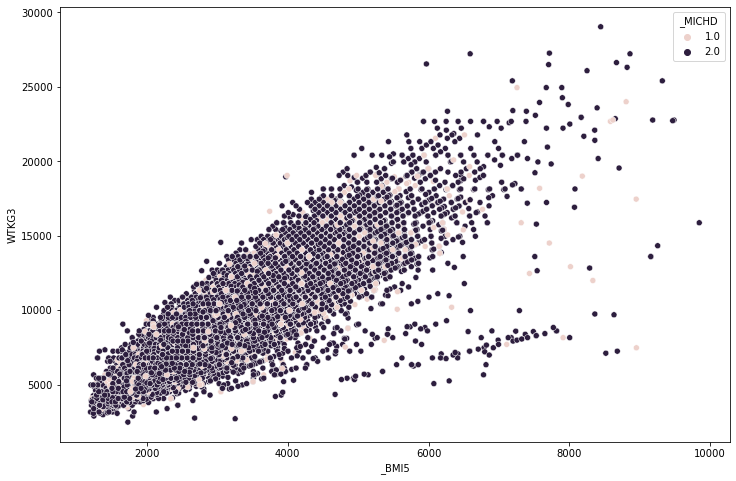

In [31]:
# plotting a pairplot to visually check the linear relationship between them

plt.figure(figsize=[12, 8])

sns.scatterplot(x=train['_BMI5'], y=train['WTKG3'], hue=train['_MICHD'])
plt.show()

From this it seems like _BMI5 might be a good indicator of the variable WEIGHT2

In [21]:
# function to impute all nan values of _BMI5, where WTKG3 is not na

def train_linear_model(data):
    
    # Selecting all non-nan pairs of _BMI5 and WTKG3
    data_impute_wtkg3_mv = data[['_BMI5', 'WTKG3']][~data[['_BMI5', 'WTKG3']].isna().any(axis=1)]
    print('Shape of the overall data with non-nan pairs of _BMI5 and WTKG3', data_impute_wtkg3_mv.shape)
    
    # splitting the above data into train and test
    X_train_mv, X_test_mv, y_train_mv, y_test_mv = train_test_split(data_impute_wtkg3_mv['WTKG3'].values.reshape(-1, 1), 
                                                                data_impute_wtkg3_mv['_BMI5'], 
                                                                test_size=0.3, random_state=42)
    print('Shape of the training set: ', X_train_mv.shape)
    print('Labels of training set: ', X_test_mv.shape)
    print('Shape of the test set: ', y_train_mv.shape)
    print('Labels of the test set: ', y_test_mv.shape)
    
    linear_reg_mv = LinearRegression()

    linear_reg_mv.fit(X_train_mv, y_train_mv)
    
    print('Score of the Linear model is: ', linear_reg_mv.score(X_test_mv, y_test_mv))
    
    return linear_reg_mv
    
# imputing all missing BMI5 values with the predicted value using WTKG3
def impute_bmi5_lin_reg(model, data):
    X_final_mv = data[data['_BMI5'].isna() & ~data['WTKG3'].isna()]['WTKG3']
    print(X_final_mv.shape)
    
    
    for row in X_final_mv.index:
        test_data_wtkg3 = X_final_mv.loc[row]
        predicted_bmi = model.predict(test_data_wtkg3.reshape(-1, 1))
        data.loc[row]['_BMI5'] = predicted_bmi
        
    return data

In [22]:
# storing the linear model
linear_reg_mv = train_linear_model(train)

train = impute_bmi5_lin_reg(linear_reg_mv, train)

Shape of the overall data with non-nan pairs of _BMI5 and WTKG3 (250326, 2)
Shape of the training set:  (175228, 1)
Labels of training set:  (75098, 1)
Shape of the test set:  (175228,)
Labels of the test set:  (75098,)
Score of the Linear model is:  0.7322612638757031
(4435,)


The errors are larger for some of the smaller BMI values.

In [38]:
train.isna().sum()

_STATE          0
HHADULT         0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
SLEPTIM1        0
CVDSTRK3        0
CHCSCNCR        0
CHCOCNCR        0
CHCCOPD2        0
ADDEPEV3        0
CHCKDNY2        0
DIABETE4        0
MARITAL         0
EMPLOY1         0
DEAF            0
BLIND           0
DIFFWALK        0
AVEDRNK3        0
DRNK3GE5        0
MARIJAN1        0
_METSTAT        0
_IMPRACE        0
_TOTINDA        0
_MICHD          0
_ASTHMS1        0
_DRDXAR2        0
_EXTETH3        0
_SEX            0
_AGE80          0
HTIN4           0
WTKG3       23954
_BMI5       23954
_EDUCAG         0
_INCOMG         0
_SMOKER3        0
DRNKANY5        0
DROCDY3_        0
_RFBING5        0
_DRNKWK1        0
_RFDRHV7        0
dtype: int64

### WTKG3, _BMI5 - using KNNImputer to impute the remaining missing values

<AxesSubplot:>

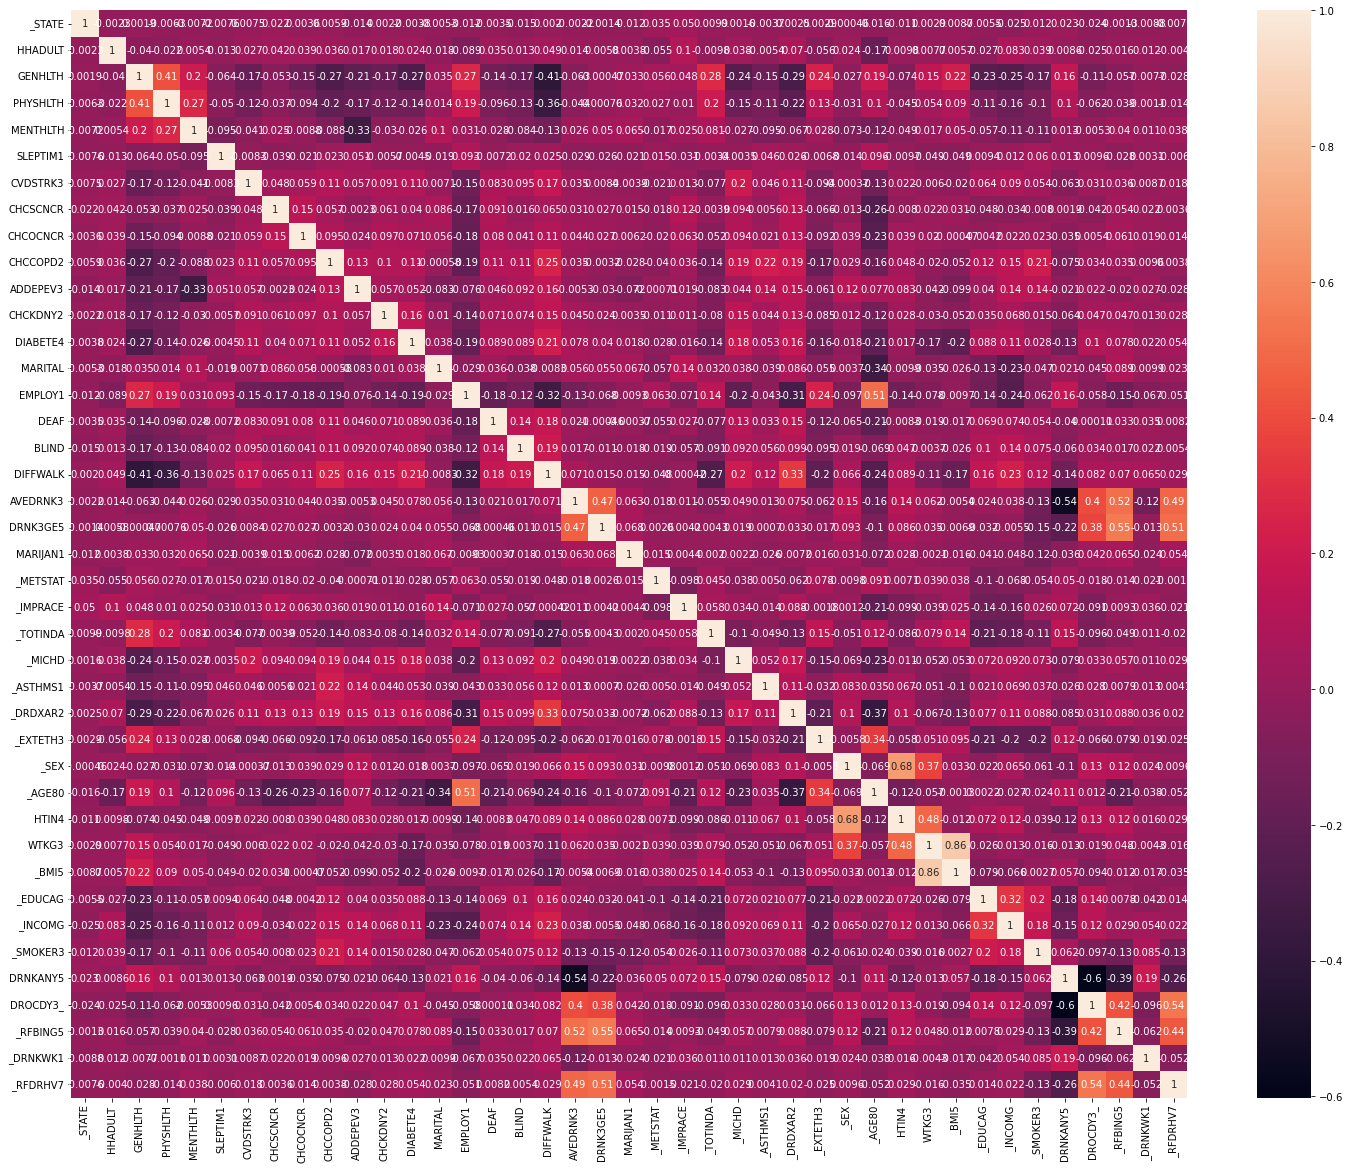

In [41]:
# Now imputing all the remaining missing values in WTKG3 and _BMI5

plt.figure(figsize=[25, 20])
sns.heatmap(train.corr(), annot=True)
plt.show()

In [24]:
from sklearn.impute import KNNImputer

def train_imputeKNN(data):
    missing_data = data.copy()

    knn_imp = KNNImputer()
    data = knn_imp.fit(missing_data)
    
    return knn_imp

def imputeKNN(model, data):
    data_trans = knn_imp.transform(data)
    return data_trans

In [25]:
knn_imp = train_imputeKNN(train)

train_trans = imputeKNN(knn_imp, train)

In [26]:
train_trans[:, [31, 32]]

array([[ 9752.        ,  3690.        ],
       [ 8182.8       ,  2734.15142473],
       [ 8845.        ,  2645.        ],
       ...,
       [ 8165.        ,  2995.        ],
       [10886.        ,  3081.        ],
       [ 7031.        ,  2162.        ]])

In [63]:
train[['WTKG3', '_BMI5']] = train_trans[:, [31, 32]]

In [64]:
train.isnull().sum()

_STATE      0
HHADULT     0
GENHLTH     0
PHYSHLTH    0
MENTHLTH    0
SLEPTIM1    0
CVDSTRK3    0
CHCSCNCR    0
CHCOCNCR    0
CHCCOPD2    0
ADDEPEV3    0
CHCKDNY2    0
DIABETE4    0
MARITAL     0
EMPLOY1     0
DEAF        0
BLIND       0
DIFFWALK    0
AVEDRNK3    0
DRNK3GE5    0
MARIJAN1    0
_METSTAT    0
_IMPRACE    0
_TOTINDA    0
_MICHD      0
_ASTHMS1    0
_DRDXAR2    0
_EXTETH3    0
_SEX        0
_AGE80      0
HTIN4       0
WTKG3       0
_BMI5       0
_EDUCAG     0
_INCOMG     0
_SMOKER3    0
DRNKANY5    0
DROCDY3_    0
_RFBING5    0
_DRNKWK1    0
_RFDRHV7    0
dtype: int64

In [31]:
def X_transform(X, train): 
    
    global linear_reg_mv
    global knn_imp
    
    X = replace_with_custom(X)
    X = replacena_with_median_mode(X)
    X = replace_no_info_values(X, train) 
    X = impute_bmi5_lin_reg(linear_reg_mv, X)
    
    imputed_X = imputeKNN(knn_imp, X)
    X[['WTKG3', '_BMI5']] = imputed_X[:, [31, 32]]
    
    return X

train = X_transform(train, train) # for the test set, this should be test, train

(0,)


# Feature Transformations and Treating Outliers

In [35]:
def split_num_cat_y(data):    
    y = data['_MICHD'].replace({2:0})
    X_numeric = data.drop(['_STATE', 'MARITAL', 'EMPLOY1', '_IMPRACE', '_ASTHMS1', '_EDUCAG', '_SMOKER3', 
                       'CVDSTRK3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD2', 'ADDEPEV3', 'CHCKDNY2', 'DEAF', 'BLIND', 
                        'DIFFWALK', '_METSTAT', '_TOTINDA', '_DRDXAR2', '_EXTETH3', '_SEX', 'DRNKANY5', '_RFDRHV7', 
                           'DIABETE4', '_MICHD', '_RFBING5'], 
                          axis=1)

    X_categoric = data[['_STATE', 'MARITAL', 'EMPLOY1', '_IMPRACE', '_ASTHMS1', '_EDUCAG', '_SMOKER3', 
                       'CVDSTRK3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD2', 'ADDEPEV3', 'CHCKDNY2', 'DEAF', 'BLIND', 
                        'DIFFWALK', '_METSTAT', '_TOTINDA', '_DRDXAR2', '_EXTETH3', '_SEX', 'DRNKANY5', '_RFDRHV7', 
                       'DIABETE4', '_RFBING5']]

    print(X_numeric.shape)
    print(X_categoric.shape)
    
    return y, X_numeric, X_categoric

(278870, 15)
(278870, 25)


In [37]:
# function to replace a few of the outliers manually

def remove_outliers_manually(data):
    data['PHYSHLTH'] = data['PHYSHLTH'].replace({88:0})
    data['MENTHLTH'] = data['MENTHLTH'].replace({88:0})
    data['AVEDRNK3'][data['AVEDRNK3'] > 10] = 10
    data['_DRNKWK1'][data['_DRNKWK1'] > 80000]  = data['_DRNKWK1'].median()
    
    HHADULT_outliers = data.index[data['HHADULT'] > 10]
    data.loc[HHADULT_outliers, 'HHADULT'] = 10
    
    return data


Note: 

    AVEDRNK3: There are very few datapoints (< 0.01%)  with > 10 drinks per day, we can cap these.
    _DRNKWK1: There are very few datapoints (< 0.001%) with > 80000 drinks per week, we can cap these
    HHADULT: There are very few datapoints (< 0.01%)  with > 10 adults in the household, we can cap these. 


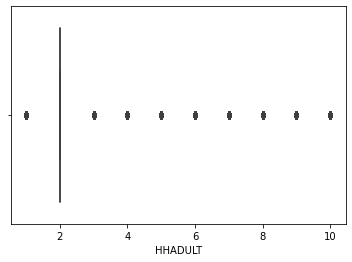

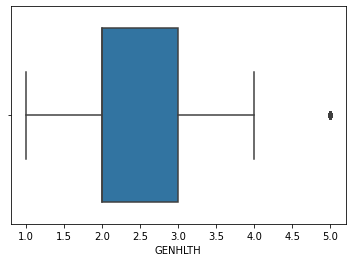

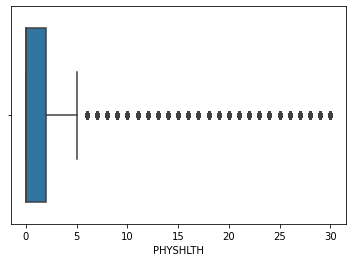

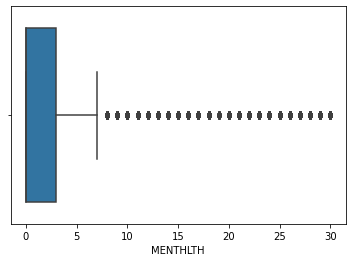

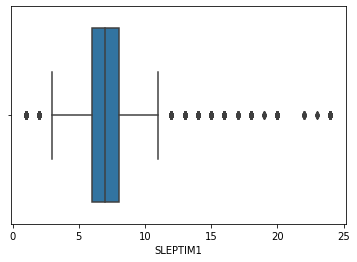

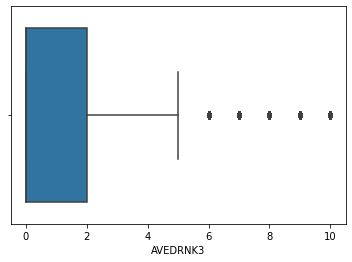

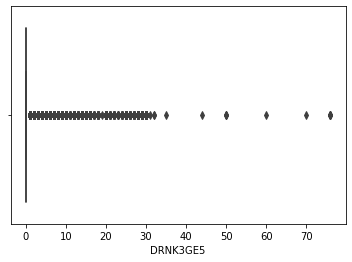

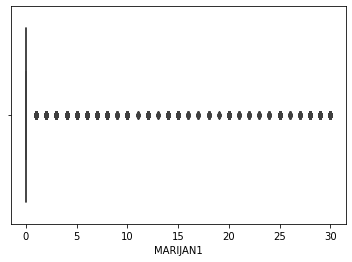

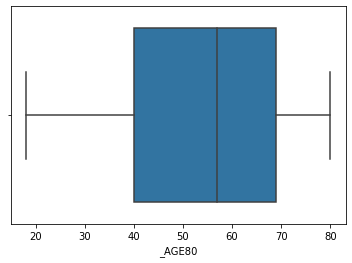

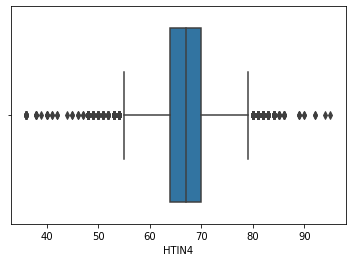

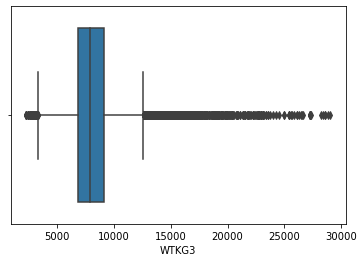

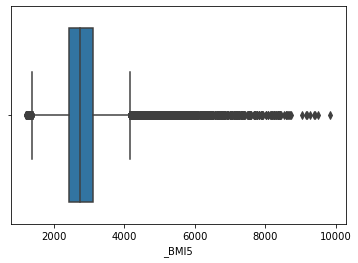

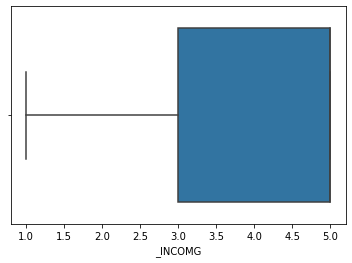

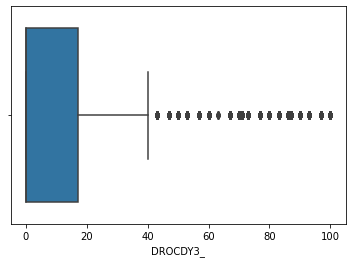

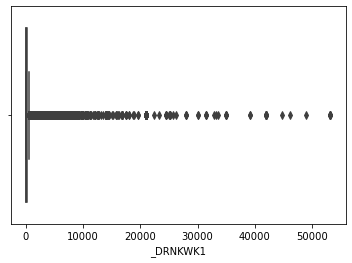

In [38]:
# checking for all the feature distributions again, after remove_outliers_manually(data)

for col in X_train_numeric:
    sns.boxplot(x=X_train_numeric[col])
    plt.show()

In [39]:
# making a few log transformations

def log_trans(data):
    data['WTKG3'] = np.log(data['WTKG3'])
    data['_BMI5'] = np.log(data['_BMI5'])
    
    return data

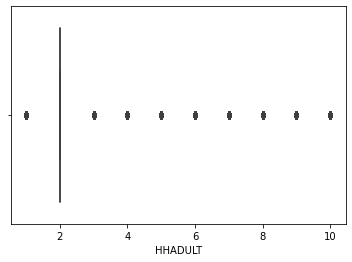

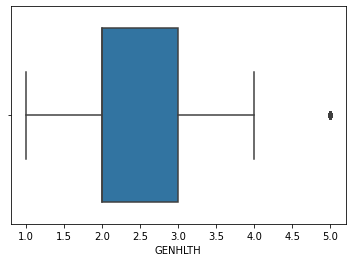

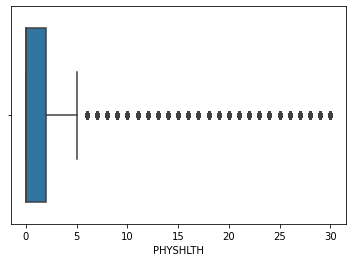

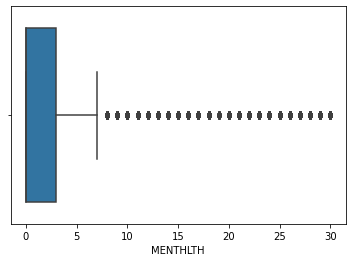

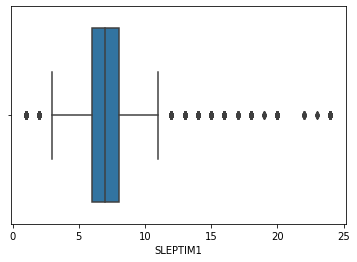

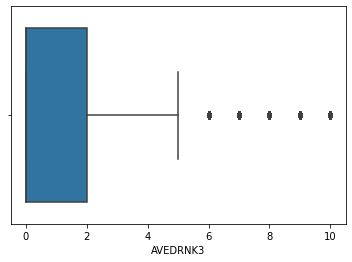

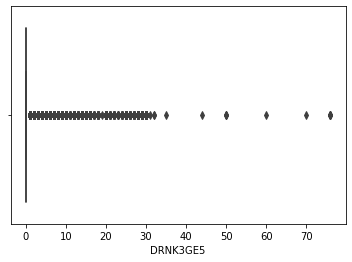

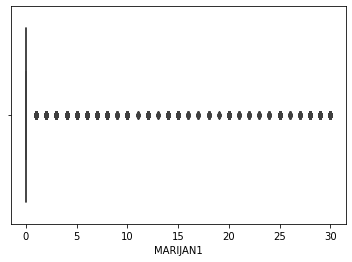

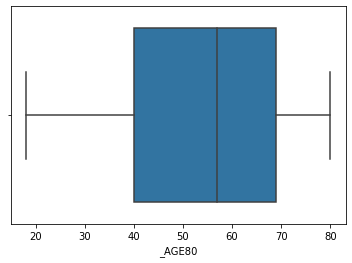

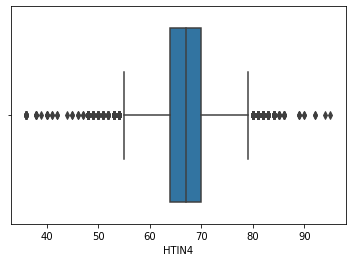

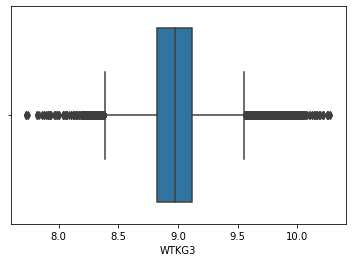

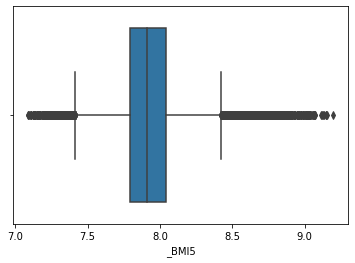

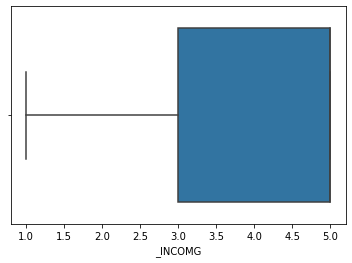

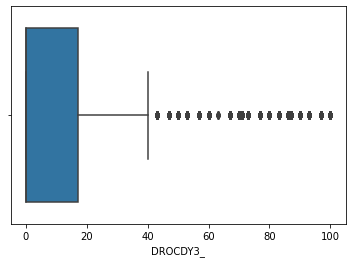

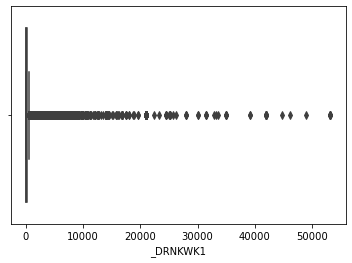

In [40]:
# checking for all the feature distributions again, after remove_outliers_manually(data)

for col in X_train_numeric:
    sns.boxplot(x=X_train_numeric[col])
    plt.show()

In [41]:
# pipeline to split the X set into numeric and categoric, then cap the outliers.

def X_transform2(X):
    y, X_numeric, X_categoric = split_num_cat_y(X)
    X_numeric = remove_outliers_manually(X_numeric)
    X_numeric = log_trans(X_numeric)
    
    return y, X_numeric, X_categoric

In [77]:
# using pipeline 2 to prepare the test data
y_train, X_train_numeric, X_train_categoric = X_transform2(train)

(278882, 15)
(278882, 25)


# Preparing the data for model building

In [43]:
# pipeline to encode categoric, scale numeric and join both dataframes

scale = StandardScaler()
scale.fit(X_train_numeric)

def data_prep_modelling(X_numeric, X_categoric):
    global scale
    
    X_categoric_encoded = pd.get_dummies(X_categoric.astype('object'), drop_first=True)
    print('Shape of the encoded categoric data: ', X_categoric_encoded.shape)
    
    X_numeric_scaled = scale.transform(X_numeric)
    print('Shape of the numeric data: ', X_numeric_scaled.shape)
    
    X_full = pd.concat([X_categoric_encoded, pd.DataFrame(X_numeric_scaled, columns=X_numeric.columns, index=X_numeric.index)], axis=1)
    print('Shape of the full transformed data: ', X_full.shape)
    
    return X_categoric_encoded, X_numeric_scaled, X_full


In [44]:
# using the data_prep_modelling function to ready the data for modelling
X_train_categoric_encoded, X_train_numeric_scaled, X_train_full = data_prep_modelling(X_train_numeric, X_train_categoric)

Shape of the encoded categoric data:  (278870, 96)
Shape of the numeric data:  (278870, 15)
Shape of the full transformed data:  (278870, 111)


In [45]:
# Now passing the entire test data through all the pipelines

test = X_transform(test, train) # for the test set, this should be test, train
y_test, X_test_numeric, X_test_categoric = X_transform2(test)
X_test_categoric_encoded, X_test_numeric_scaled, X_test_full = data_prep_modelling(X_test_numeric, X_test_categoric)

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


(1887,)
(119517, 15)
(119517, 25)
Shape of the encoded categoric data:  (119517, 96)
Shape of the numeric data:  (119517, 15)
Shape of the full transformed data:  (119517, 111)


In [46]:
# saving this data in csv files

X_test_full.to_csv('X_test.csv')
X_train_full.to_csv('X_train.csv')
y_test.to_csv('y_test.csv')
y_train.to_csv('y_train.csv')

In [136]:
# saving the full file

full_test = pd.concat([X_test_full, y_test], axis=1)
full_train = pd.concat([X_train_full, y_train], axis=1)

full_dataset_cleaned = pd.concat([full_test, full_train])

In [139]:
full_dataset_cleaned['_MICHD'] = full_dataset_cleaned['_MICHD'].replace({0: "0", 1:"1"})

In [142]:
full_dataset_cleaned.to_csv('Heartdisease_cleaned_dataset.csv')

# Model Fitting

In [206]:
scorecard_details = ['Recall Score, pos=1', 'Accuracy', 'Cohen Kappa Score', 
                                       'Bias Error', 'Variance Error', 'ROC-AUC score', 'Best Youden', 'Best Threshold']

model_scorecard = pd.DataFrame(columns=scorecard_details)

In [207]:
# function to calculate bias and variance errors 

def plot_cv_results(model, X_train, y_train):
    
    for i in np.arange(10, 100, 10):
        
        kf = KFold(n_splits=5)

def calc_bias_variance_error(model, X_train, y_train):
    
    kf = KFold(n_splits=5)
    
    scores = cross_val_score(estimator=model, cv=kf, X=X_train, y=y_train, scoring='recall')
    
    bias_error = np.mean(1-scores)
    variance_error = np.std(scores, ddof=1)
    
    return bias_error, variance_error
    
# function to calculate the scorecard metrics

def calc_best_youden(model, X_test, y_test):
    
    y_test_prob_preds = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_preds)
    youden_index = tpr - fpr
    
    youden_df = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Youden Index': youden_index, 'Threshold':thresholds})
    youden_df.sort_values(by='Youden Index', ascending=False, inplace=True)
    
    best_threshold = youden_df.iloc[0]['Threshold']
    best_youden = youden_df.iloc[0]['Youden Index']
    
    return best_threshold, best_youden, youden_df
    

def calc_model_scores(model, X_train, y_train, X_test, y_test):
    
    y_test_preds = model.predict(X_test)
    y_test_prob_preds = model.predict_proba(X_test)[:, 1]
    
    # calculating recall
    recall = recall_score(y_test, y_test_preds, pos_label=1)
    
    # calculating accuracy
    accuracy = accuracy_score(y_test, y_test_preds)
    
    # calculating cohen_kappa
    cohen_kappa = cohen_kappa_score(y_test, y_test_preds)
    
    # calculating bias and variance error
    bias_error, variance_error = calc_bias_variance_error(model, X_train, y_train)
    
    # calculating the roc_auc_score
    roc_score = roc_auc_score(y_test, y_test_preds)
    
    # calculating roc_score
    roc_score = roc_auc_score(y_test, y_test_prob_preds)
    
    # getting the best youden and threshold
    best_threshold, best_youden, df = calc_best_youden(model, X_test, y_test)
    
    return (recall, accuracy, cohen_kappa, bias_error, variance_error, roc_score, best_youden, best_threshold)
    
# function to print all the relevant performance metrics
def model_performance_reports(model, X_test, y_test):

    y_test_preds = model.predict(X_test)
    y_test_prob_preds = model.predict_proba(X_test)[:, 1]
    
    # printing confusion matrix
    print('\nConfusion Matrix')
    print(confusion_matrix(y_test, y_test_preds))
    
    # printing classification report
    print('\nClassification report')
    print(classification_report(y_test, y_test_preds))
    
    print('\nDistribution of probabilities for the response class')
    sns.displot(x=y_test_prob_preds, hue=y_test, kind='kde')
    plt.axvline(x=0.5, c='r')
    plt.show()
    
# function to update the scorecard (using validation dataset scores)
def update_scorecard(name, scores):
    
    global model_scorecard
    model_scorecard = model_scorecard.append(pd.Series(list(scores), index=scorecard_details, name=name))

# Model Type - Random Forest and Decision Trees

Assumptions of Random Forest and Decision Trees:

    1. As most of our data is skewed, non continuous, and not correlated, we could use Random Forest as our base model.
    2. The decision boundary is clearly non-linear, simple models like Logistic Regression may not be very good at handling the decision.


Cons of using Random Forests

    1. Interpretability could become an issue.
    2. The Random Forests may not be a good option if the variance error is already very low with a Decision Tree.
    

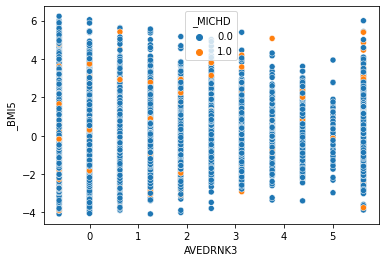

In [150]:
sns.scatterplot(x=X_train_full['AVEDRNK3'], y=X_train_full['_BMI5'], hue=y_train)
plt.show()

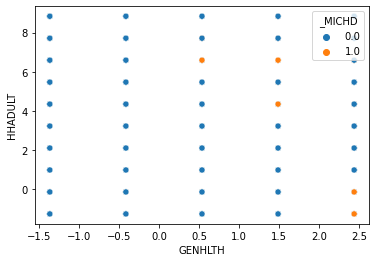

In [151]:
sns.scatterplot(x=X_train_full['GENHLTH'], y=X_train_full['HHADULT'], hue=y_train)
plt.show()

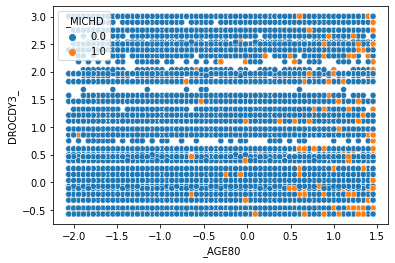

In [153]:
sns.scatterplot(x=X_train_full['_AGE80'], y=X_train_full['DROCDY3_'], hue=y_train)
plt.show()

The above scatterplots illustrate that the decision boundary would be quite complex and thus Random Forests / Decision Trees may be a good starting option.

### Model 1: Random Forest - Default Settings

In [65]:
rf = RandomForestClassifier()

rf.fit(X_train_full, y_train)

RandomForestClassifier()


Confusion Matrix
[[108992    276]
 [  9795    454]]

Classification report
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    109268
         1.0       0.62      0.04      0.08     10249

    accuracy                           0.92    119517
   macro avg       0.77      0.52      0.52    119517
weighted avg       0.89      0.92      0.88    119517


Distribution of probabilities for the response class


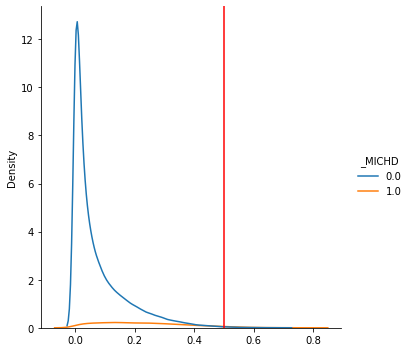

In [66]:
model_performance_reports(rf, X_test_full, y_test)

In [118]:
scores = calc_model_scores(rf, X_train_full, y_train, X_test_full, y_test)
update_scorecard('Random Forest - default', scores)
model_scorecard

Recall Score, pos=1  Accuracy  Cohen Kappa Score  \
Random Forest - default             0.047582  0.916171           0.076885   

                         Bias Error  Variance Error  ROC-AUC score  \
Random Forest - default    0.955029        0.003717       0.831034   

                         Best Youden  Best Threshold  
Random Forest - default      0.51761            0.11

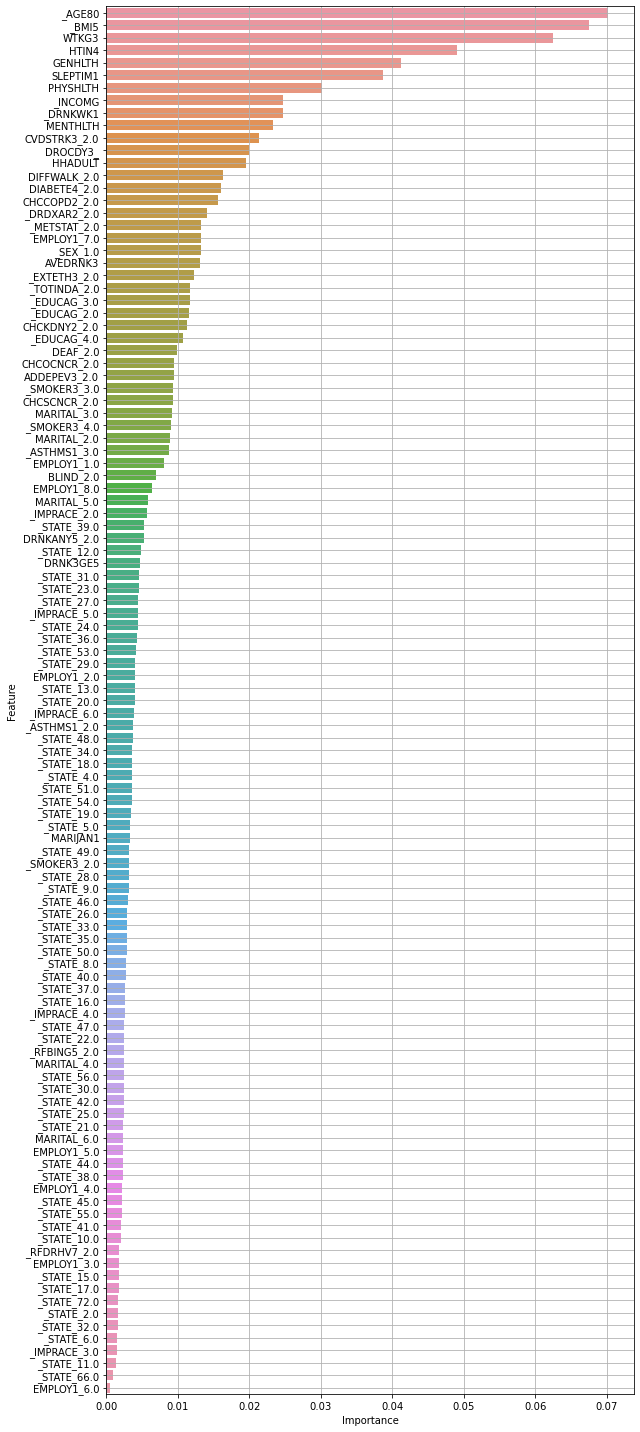

In [199]:
feat_imp_rf = pd.DataFrame({'Feature': X_train_full.columns, 'Importance':rf.feature_importances_}).sort_values('Importance', ascending=False)

plt.figure(figsize=[9, 20])
sns.barplot(data=feat_imp_rf, x='Importance', y='Feature')
plt.tight_layout()
plt.grid()
plt.show()

According to the default selection within the Random Forest, the most important features are: _AGE80, BMI, WTKG3, _HTIN4 and GENHLTH - which is in accordance with basic domain research found on the topic.

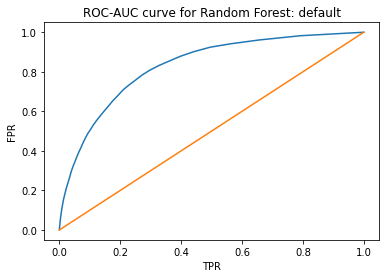

In [68]:
y_preds_rf = rf.predict(X_test_full)
y_prob_preds_rf = rf.predict_proba(X_test_full)[:, 1]

fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, y_prob_preds_rf)

plt.title('ROC-AUC curve for Random Forest: default')
plt.plot(fpr_rf, tpr_rf)
plt.plot([0, 1], [0, 1]) 
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

### Analysis: Tuning the Random Forest

In [126]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
params = {'n_estimators': [1, 2, 5, 10], 'max_depth': [None, 10, 25, 50, 60, 70, 80],
         'max_features': ['auto', 10, 20, 30, 40]}

GS_rf = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=params,
                    scoring='recall',
                    cv=kfold,
                    n_jobs=-1, 
                    verbose=2)

GS_rf.fit(X_train_full, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 25, 50, 60, 70, 80],
                         'max_features': ['auto', 10, 20, 30, 40],
                         'n_estimators': [1, 2, 5, 10]},
             scoring='recall', verbose=2)

[CV] END ..max_depth=None, max_features=auto, n_estimators=2; total time=   3.8s
[CV] END .max_depth=None, max_features=auto, n_estimators=10; total time=  11.9s
[CV] END ....max_depth=None, max_features=10, n_estimators=2; total time=   3.0s
[CV] END ....max_depth=None, max_features=10, n_estimators=5; total time=   5.6s
[CV] END ....max_depth=None, max_features=20, n_estimators=1; total time=   2.5s
[CV] END ....max_depth=None, max_features=20, n_estimators=1; total time=   2.7s
[CV] END ....max_depth=None, max_features=20, n_estimators=2; total time=   3.9s
[CV] END ....max_depth=None, max_features=20, n_estimators=5; total time=   8.5s
[CV] END ....max_depth=None, max_features=30, n_estimators=1; total time=   3.3s
[CV] END ....max_depth=None, max_features=30, n_estimators=1; total time=   3.3s
[CV] END ....max_depth=None, max_features=30, n_estimators=2; total time=   5.1s
[CV] END ....max_depth=None, max_features=30, n_estimators=5; total time=  13.5s
[CV] END ....max_depth=None,

[CV] END ....max_depth=10, max_features=auto, n_estimators=2; total time=   2.2s
[CV] END ....max_depth=10, max_features=auto, n_estimators=5; total time=   3.3s
[CV] END ...max_depth=10, max_features=auto, n_estimators=10; total time=   4.8s
[CV] END ...max_depth=10, max_features=auto, n_estimators=10; total time=   4.8s
[CV] END ......max_depth=10, max_features=10, n_estimators=2; total time=   2.0s
[CV] END ......max_depth=10, max_features=10, n_estimators=5; total time=   3.4s
[CV] END ......max_depth=10, max_features=20, n_estimators=1; total time=   2.1s
[CV] END ......max_depth=10, max_features=20, n_estimators=1; total time=   2.0s
[CV] END ......max_depth=10, max_features=20, n_estimators=2; total time=   2.8s
[CV] END .....max_depth=10, max_features=20, n_estimators=10; total time=   7.6s
[CV] END ......max_depth=10, max_features=30, n_estimators=2; total time=   3.2s
[CV] END .....max_depth=10, max_features=30, n_estimators=10; total time=   9.8s
[CV] END ......max_depth=10,

[CV] END ..max_depth=None, max_features=auto, n_estimators=1; total time=   3.1s
[CV] END ..max_depth=None, max_features=auto, n_estimators=5; total time=   7.2s
[CV] END .max_depth=None, max_features=auto, n_estimators=10; total time=  10.7s
[CV] END ...max_depth=None, max_features=10, n_estimators=10; total time=  11.0s
[CV] END ....max_depth=None, max_features=20, n_estimators=5; total time=   8.7s
[CV] END ...max_depth=None, max_features=20, n_estimators=10; total time=  16.2s
[CV] END ...max_depth=None, max_features=30, n_estimators=10; total time=  23.7s
[CV] END ....max_depth=None, max_features=40, n_estimators=2; total time=   7.1s
[CV] END ...max_depth=None, max_features=40, n_estimators=10; total time=  29.1s
[CV] END ......max_depth=10, max_features=10, n_estimators=1; total time=   1.6s
[CV] END ......max_depth=10, max_features=10, n_estimators=1; total time=   1.8s
[CV] END ......max_depth=10, max_features=10, n_estimators=5; total time=   3.4s
[CV] END .....max_depth=10, 

[CV] END ..max_depth=None, max_features=auto, n_estimators=2; total time=   3.7s
[CV] END ..max_depth=None, max_features=auto, n_estimators=5; total time=   7.4s
[CV] END ....max_depth=None, max_features=10, n_estimators=1; total time=   2.5s
[CV] END ....max_depth=None, max_features=10, n_estimators=1; total time=   2.2s
[CV] END ....max_depth=None, max_features=10, n_estimators=2; total time=   3.3s
[CV] END ....max_depth=None, max_features=10, n_estimators=5; total time=   5.3s
[CV] END ....max_depth=None, max_features=20, n_estimators=1; total time=   2.6s
[CV] END ....max_depth=None, max_features=20, n_estimators=1; total time=   3.2s
[CV] END ....max_depth=None, max_features=20, n_estimators=2; total time=   4.4s
[CV] END ...max_depth=None, max_features=20, n_estimators=10; total time=  16.1s
[CV] END ....max_depth=None, max_features=30, n_estimators=2; total time=   5.5s
[CV] END ....max_depth=None, max_features=30, n_estimators=5; total time=  12.7s
[CV] END ....max_depth=None,

[CV] END ..max_depth=None, max_features=auto, n_estimators=1; total time=   3.2s
[CV] END ..max_depth=None, max_features=auto, n_estimators=5; total time=   7.7s
[CV] END ....max_depth=None, max_features=10, n_estimators=1; total time=   2.6s
[CV] END ....max_depth=None, max_features=10, n_estimators=2; total time=   3.3s
[CV] END ....max_depth=None, max_features=10, n_estimators=2; total time=   2.8s
[CV] END ...max_depth=None, max_features=10, n_estimators=10; total time=  10.5s
[CV] END ....max_depth=None, max_features=20, n_estimators=2; total time=   4.6s
[CV] END ...max_depth=None, max_features=20, n_estimators=10; total time=  16.6s
[CV] END ....max_depth=None, max_features=30, n_estimators=2; total time=   6.1s
[CV] END ...max_depth=None, max_features=30, n_estimators=10; total time=  23.1s
[CV] END ....max_depth=None, max_features=40, n_estimators=5; total time=  14.1s
[CV] END ...max_depth=None, max_features=40, n_estimators=10; total time=  28.9s
[CV] END .....max_depth=10, 

In [127]:
GS_rf.best_params_

{'max_depth': None, 'max_features': 40, 'n_estimators': 1}

In [128]:
rf_tuned = RandomForestClassifier(n_estimators=1, 
                                  max_depth=30, 
                                  max_features=40)

rf_tuned.fit(X_train_full, y_train)

RandomForestClassifier(max_depth=30, max_features=40, n_estimators=1)


Confusion Matrix
[[101486   7826]
 [  7860   2333]]

Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93    109312
         1.0       0.23      0.23      0.23     10193

    accuracy                           0.87    119505
   macro avg       0.58      0.58      0.58    119505
weighted avg       0.87      0.87      0.87    119505


Distribution of probabilities for the response class


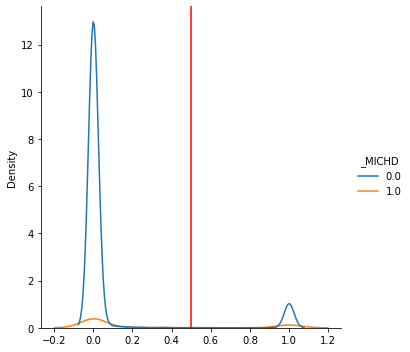

In [129]:
# test performance
model_performance_reports(rf_tuned, X_test_full, y_test)


Confusion Matrix
[[248088   6824]
 [  7599  16371]]

Classification report
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97    254912
         1.0       0.71      0.68      0.69     23970

    accuracy                           0.95    278882
   macro avg       0.84      0.83      0.83    278882
weighted avg       0.95      0.95      0.95    278882


Distribution of probabilities for the response class


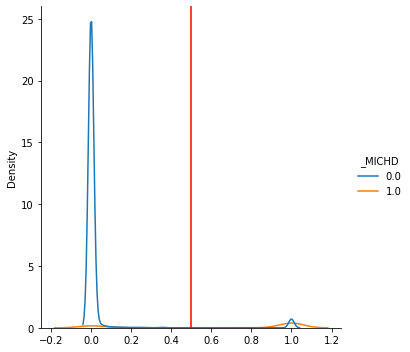

In [130]:
# training performance
model_performance_reports(rf_tuned, X_train_full, y_train)

The tuned random forest model is clearly overfitting on the train data.

In [142]:
# trying to optimize the model by lowering the difference between train and test recall, 
# and fitting it instead on a decision tree

recall_scores = []

dt_scores = pd.DataFrame(columns=['max_depth', 'num_features'])
for i in range(15, 31):
    for j in range(35, 45):
        GSmanual_dt = DecisionTreeClassifier(max_depth=i, max_features=j)
        GSmanual_dt.fit(X_train_full, y_train)
        print('Fitted tree with max_depth:', i, ' and max_features: ', j)
        
        y_train_preds = GSmanual_dt.predict(X_train_full)
        train_recall = recall_score(y_train, y_train_preds)
        
        y_test_preds = GSmanual_dt.predict(X_test_full)
        test_recall = recall_score(y_test, y_test_preds)
        
        recall_scores.append([i, j, train_recall, test_recall])        

Fitted tree with max_depth: 15  and max_features:  35
Fitted tree with max_depth: 15  and max_features:  36
Fitted tree with max_depth: 15  and max_features:  37
Fitted tree with max_depth: 15  and max_features:  38
Fitted tree with max_depth: 15  and max_features:  39
Fitted tree with max_depth: 15  and max_features:  40
Fitted tree with max_depth: 15  and max_features:  41
Fitted tree with max_depth: 15  and max_features:  42
Fitted tree with max_depth: 15  and max_features:  43
Fitted tree with max_depth: 15  and max_features:  44
Fitted tree with max_depth: 16  and max_features:  35
Fitted tree with max_depth: 16  and max_features:  36
Fitted tree with max_depth: 16  and max_features:  37
Fitted tree with max_depth: 16  and max_features:  38
Fitted tree with max_depth: 16  and max_features:  39
Fitted tree with max_depth: 16  and max_features:  40
Fitted tree with max_depth: 16  and max_features:  41
Fitted tree with max_depth: 16  and max_features:  42
Fitted tree with max_depth: 

Fitted tree with max_depth: 30  and max_features:  37
Fitted tree with max_depth: 30  and max_features:  38
Fitted tree with max_depth: 30  and max_features:  39
Fitted tree with max_depth: 30  and max_features:  40
Fitted tree with max_depth: 30  and max_features:  41
Fitted tree with max_depth: 30  and max_features:  42
Fitted tree with max_depth: 30  and max_features:  43
Fitted tree with max_depth: 30  and max_features:  44


In [145]:
recall_scores = pd.DataFrame(recall_scores, columns=['max_depth', 'max_features', 'train_recall', 'test_recall'])

In [1]:
recall_scores

NameError: name 'recall_scores' is not defined

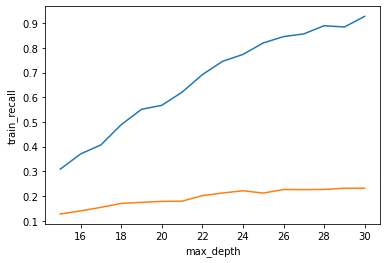

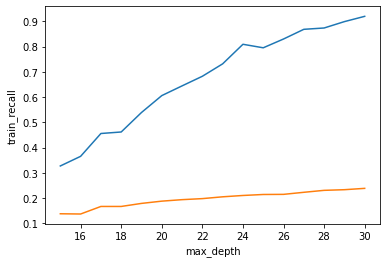

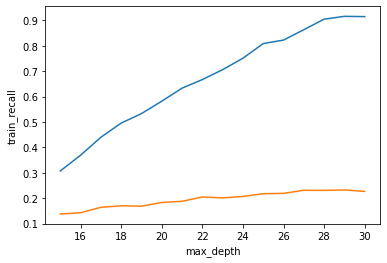

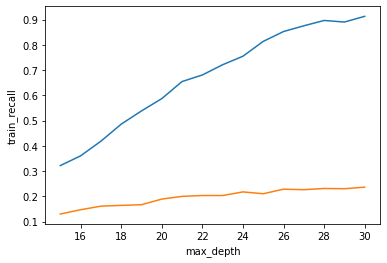

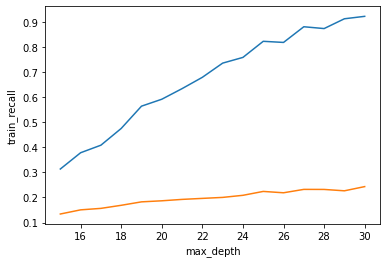

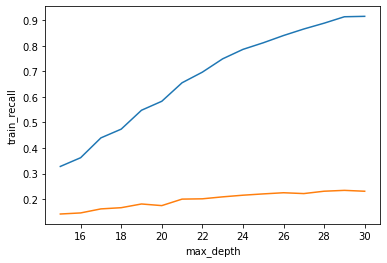

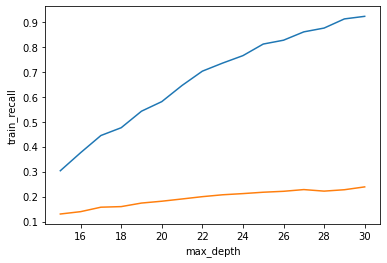

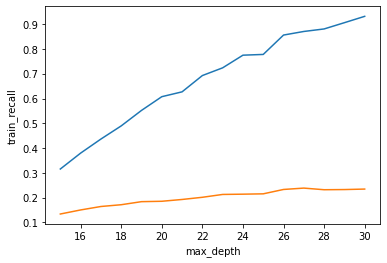

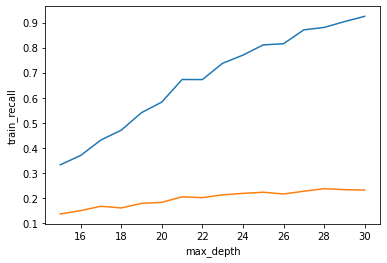

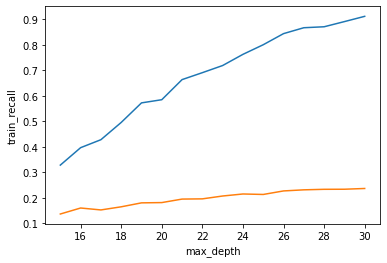

In [157]:
for i in range(35, 45):
    recall_scores_max_feat = recall_scores[recall_scores['max_features']==i]

    plt.figure(figsize=(6, 4))
    sns.lineplot(x=recall_scores_max_feat['max_depth'], y=recall_scores_max_feat['train_recall'])
    sns.lineplot(x=recall_scores_max_feat['max_depth'], y=recall_scores_max_feat['test_recall'])
    plt.show()

- Clearly all the models are overfitting. 
- As max_depth increases, the train and test scores also increases, as well the gap between them. (The model increasingly overfits)
- Now trying a few more with higher max depth, as there seems to be an upward trend in that direction, while keeping max.features constant.

In [181]:
recall_scores_2 = []
for j in range(25, 50):
    GSmanual_dt = DecisionTreeClassifier(max_depth=j, max_features=40)
    GSmanual_dt.fit(X_train_full, y_train)
    print('Fitted tree with max_depth:', j, ' and max_features: ', 40)
        
    y_train_preds = GSmanual_dt.predict(X_train_full)
    train_recall = recall_score(y_train, y_train_preds)
        
    y_test_preds = GSmanual_dt.predict(X_test_full)
    test_recall = recall_score(y_test, y_test_preds)
        
    recall_scores_2.append([j, 40, train_recall, test_recall])

Fitted tree with max_depth: 25  and max_features:  40
Fitted tree with max_depth: 26  and max_features:  40
Fitted tree with max_depth: 27  and max_features:  40
Fitted tree with max_depth: 28  and max_features:  40
Fitted tree with max_depth: 29  and max_features:  40
Fitted tree with max_depth: 30  and max_features:  40
Fitted tree with max_depth: 31  and max_features:  40
Fitted tree with max_depth: 32  and max_features:  40
Fitted tree with max_depth: 33  and max_features:  40
Fitted tree with max_depth: 34  and max_features:  40
Fitted tree with max_depth: 35  and max_features:  40
Fitted tree with max_depth: 36  and max_features:  40
Fitted tree with max_depth: 37  and max_features:  40
Fitted tree with max_depth: 38  and max_features:  40
Fitted tree with max_depth: 39  and max_features:  40
Fitted tree with max_depth: 40  and max_features:  40
Fitted tree with max_depth: 41  and max_features:  40
Fitted tree with max_depth: 42  and max_features:  40
Fitted tree with max_depth: 

In [184]:
recall_scores_2 = pd.DataFrame(recall_scores_2, columns=recall_scores.columns)
recall_scores_2

max_depth  max_features  test_recall  train_recall
0          25            40     0.807551      0.222211
1          26            40     0.816479      0.220740
2          27            40     0.845265      0.228196
3          28            40     0.880893      0.235161
4          29            40     0.908511      0.232022
5          30            40     0.910763      0.238203
6          31            40     0.946391      0.233690
7          32            40     0.952357      0.240557
8          33            40     0.963955      0.241735
9          34            40     0.966333      0.241244
10         35            40     0.977347      0.244089
11         36            40     0.981894      0.242127
12         37            40     0.981227      0.246738
13         38            40     0.993951      0.245561
14         39            40     0.985816      0.245659
15         40            40     0.996037      0.253311
16         41            40     0.996871      0.245168
17         42            40     0.994994      0.248013
18         43            40     0.995035      0.247817
19         44            40     0.995870      0.250172
20         45            40     0.998874      0.246247
21         46            40     0.995953      0.243206
22         47            40     0.997831      0.248013
23         48            40     0.999666      0.252722
24         49            40     0.999958      0.243795

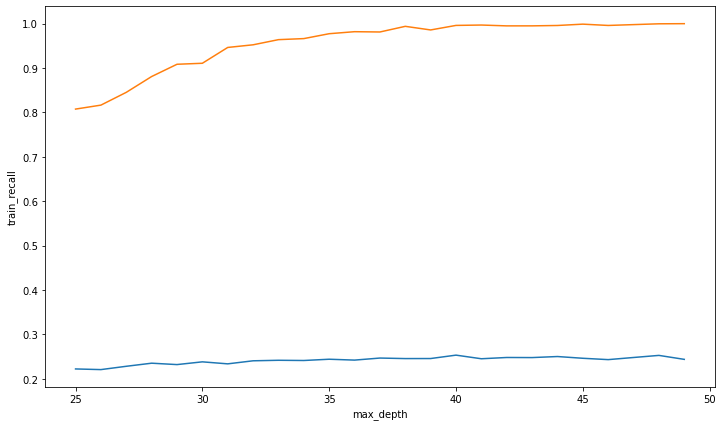

In [185]:
sns.lineplot(x=recall_scores_2['max_depth'], y=recall_scores_2['train_recall'])
sns.lineplot(x=recall_scores_2['max_depth'], y=recall_scores_2['test_recall'])
plt.show()

As we can see, there is no significant increase to be obtained by increasing the max depth. 

This is the best possible decision tree we can obtain.

In [190]:
# experimenting with the number of estimators, keeping max_depth and max_features constant

recall_scores_rf = []
n_est = [1, 2, 5, 10, 15, 20, 25, 50, 75, 100, 150, 200]

for i in n_est:
    rf_est = RandomForestClassifier(n_estimators=i, max_depth=30, max_features=30)
    rf_est.fit(X_train_full, y_train)
    
    print('Fitted tree with n_estimators:', i)
        
    y_train_preds = rf_est.predict(X_train_full)
    train_recall = recall_score(y_train, y_train_preds)
        
    y_test_preds = rf_est.predict(X_test_full)
    test_recall = recall_score(y_test, y_test_preds)
        
    recall_scores_rf.append([i, train_recall, test_recall])

Fitted tree with n_estimators: 1
Fitted tree with n_estimators: 2
Fitted tree with n_estimators: 5
Fitted tree with n_estimators: 10
Fitted tree with n_estimators: 15
Fitted tree with n_estimators: 20
Fitted tree with n_estimators: 25
Fitted tree with n_estimators: 50
Fitted tree with n_estimators: 75
Fitted tree with n_estimators: 100
Fitted tree with n_estimators: 150
Fitted tree with n_estimators: 200


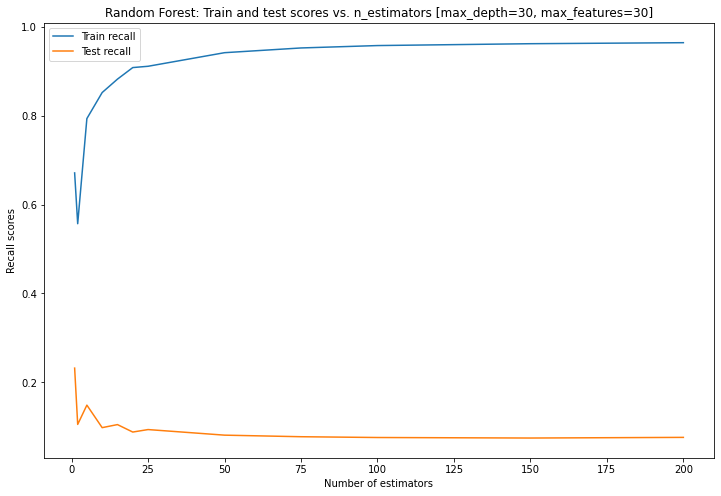

In [198]:
recall_scores_rf = np.array(recall_scores_rf)

plt.title('Random Forest: Train and test scores vs. n_estimators [max_depth=30, max_features=30]')
sns.lineplot(x=recall_scores_rf[:, 0], y=recall_scores_rf[:, 1])
sns.lineplot(x=recall_scores_rf[:, 0], y=recall_scores_rf[:, 2])
plt.xlabel('Number of estimators')
plt.ylabel('Recall scores')
plt.legend(labels=['Train recall', 'Test recall'])
plt.show()

- As the features increase, the fits of the Random Forest models are increasingly overfit. 
- The least overfitting model occurs with n_estimators=1, which mean the Decision Trees are still the best the option.

## Model: Decision Tree

In [ ]:
# tuning the decision tree as per the learnings in the previous section

In [202]:
dt_tuned = DecisionTreeClassifier(max_features=30, max_depth=40)

dt_tuned.fit(X_train_full, y_train)

DecisionTreeClassifier(max_depth=40, max_features=30)


Confusion Matrix
[[254905      7]
 [   243  23727]]

Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    254912
         1.0       1.00      0.99      0.99     23970

    accuracy                           1.00    278882
   macro avg       1.00      0.99      1.00    278882
weighted avg       1.00      1.00      1.00    278882


Distribution of probabilities for the response class


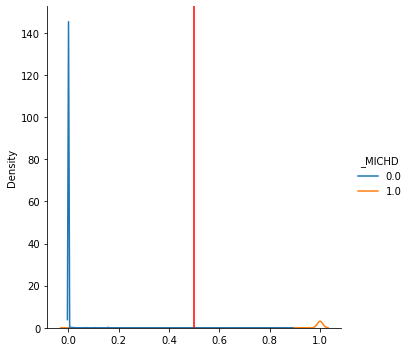

In [207]:
model_performance_reports(dt_tuned, X_train_full, y_train)


Confusion Matrix
[[101405   7907]
 [  7751   2442]]

Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93    109312
         1.0       0.24      0.24      0.24     10193

    accuracy                           0.87    119505
   macro avg       0.58      0.58      0.58    119505
weighted avg       0.87      0.87      0.87    119505


Distribution of probabilities for the response class


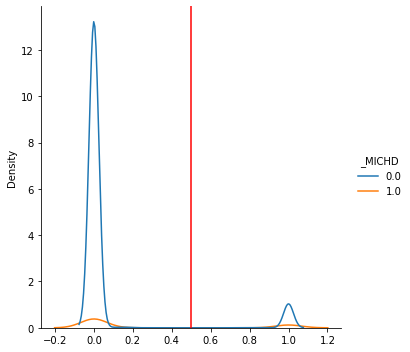

In [203]:
model_performance_reports(dt_tuned, X_test_full, y_test)

In [205]:
scores = calc_model_scores(dt_tuned, X_train_full, y_train, X_test_full, y_test)
update_scorecard('Decision Tree: max_depth=40, max_features=30', scores)
model_scorecard

Recall Score, pos=1  Accuracy  \
Random Forest - default                                  0.047582  0.916171   
Decision Tree: max_depth=40, max_features=30             0.239576  0.868976   

                                              Cohen Kappa Score  Bias Error  \
Random Forest - default                                0.076885    0.955029   
Decision Tree: max_depth=40, max_features=30           0.166089    0.762071   

                                              Variance Error  ROC-AUC score  \
Random Forest - default                             0.003717       0.831034   
Decision Tree: max_depth=40, max_features=30        0.002981       0.585773   

                                              Best Youden  Best Threshold  
Random Forest - default                          0.517610        0.110000  
Decision Tree: max_depth=40, max_features=30     0.171922        0.020833

#### Part 1: Comparison Between Decision Tree and Random Forest

- The Tuned Decision tree has a much better performance than the Random Forest in terms of the Recall and Cohen Kappa Scores. 
- The Decision Tree's bias and variance errors are also much lower than the Random Forest. 
- The variance error seems to be very low for the Decision tree, but the tree is clearly overfitting on the training data
- Decreasing the max_depth of the tree decreases the gap between the train and test scores at the cost of the overall decrease in test scores. (Refer graphs above)

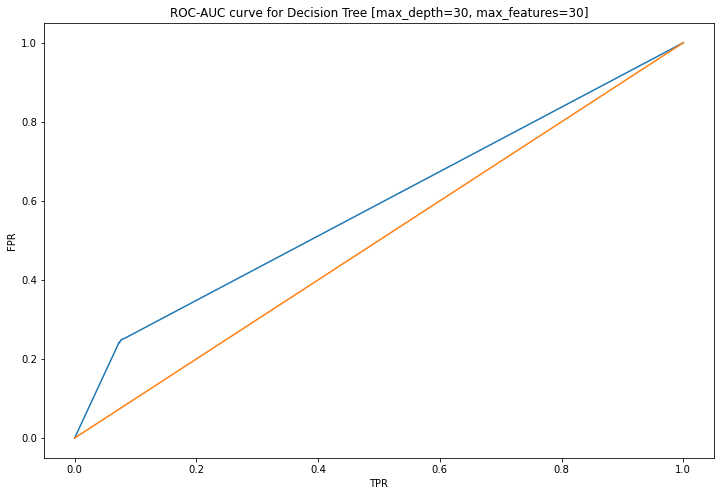

In [211]:
y_preds_dt_tuned = dt_tuned.predict(X_test_full)
y_prob_preds_dt_tuned = dt_tuned.predict_proba(X_test_full)[:, 1]

fpr, tpr, thresh = roc_curve(y_test, y_prob_preds_dt_tuned)

plt.title('ROC-AUC curve for Decision Tree [max_depth=30, max_features=30]')
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1]) 
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

#### Part 2: Comparison between Decision Tree and Random Forest

- On comparing the ROC curves of the best Decision Tree and the best Random Forest, we see that the Random Forest has a higher potential if we try to find a better threshold. 
- According to the scorecard, the best threshold is 0.11

In [ ]:
# compiling the rf scores using the best youden threshold:



In [186]:
GS_rf_cv_results = pd.DataFrame(GS_rf.cv_results_)
GS_rf_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         2.880343      0.037799         0.239586        0.033408   
1         3.634881      0.119722         0.316021        0.087771   
2         6.774826      0.249146         0.540056        0.099269   
3        10.559979      0.490971         0.513010        0.042079   
4         2.196822      0.127183         0.222322        0.026153   
..             ...           ...              ...             ...   
135      24.443620      0.391651         0.646317        0.058528   
136       4.078597      0.279272         0.246028        0.014348   
137       7.489444      0.300876         0.222148        0.030240   
138      15.819160      0.625617         0.420783        0.118339   
139      22.915794      2.504615         0.348892        0.102992   

    param_max_depth param_max_features param_n_estimators  \
0              None               auto                  1   
1              None               auto                  2   
2              None               auto                  5   
3              None               auto                 10   
4              None                 10                  1   
..              ...                ...                ...   
135              80                 30                 10   
136              80                 40                  1   
137              80                 40                  2   
138              80                 40                  5   
139              80                 40                 10   

                                                params  split0_test_score  \
0    {'max_depth': None, 'max_features': 'auto', 'n...           0.212367   
1    {'max_depth': None, 'max_features': 'auto', 'n...           0.070997   
2    {'max_depth': None, 'max_features': 'auto', 'n...           0.135332   
3    {'max_depth': None, 'max_features': 'auto', 'n...           0.057464   
4    {'max_depth': None, 'max_features': 10, 'n_est...           0.222569   
..                                                 ...                ...   
135  {'max_depth': 80, 'max_features': 30, 'n_estim...           0.090360   
136  {'max_depth': 80, 'max_features': 40, 'n_estim...           0.245263   
137  {'max_depth': 80, 'max_features': 40, 'n_estim...           0.085363   
138  {'max_depth': 80, 'max_features': 40, 'n_estim...           0.151156   
139  {'max_depth': 80, 'max_features': 40, 'n_estim...           0.091609   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.226625           0.225786           0.222752   
1             0.073166           0.069456           0.078119   
2             0.120126           0.126381           0.127642   
3             0.070021           0.060323           0.067758   
4             0.224528           0.225998           0.226896   
..                 ...                ...                ...   
135           0.081971           0.081776           0.093245   
136           0.242977           0.244265           0.237257   
137           0.085954           0.081138           0.093867   
138           0.153040           0.149108           0.154787   
139           0.091405           0.086024           0.087857   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
0             0.222085         0.221923        0.005080               23  
1             0.068476         0.072043        0.003426              109  
2             0.131400         0.128176        0.005097               56  
3             0.062513         0.063616        0.004649              127  
4             0.236480         0.227294        0.004820               19  
..                 ...              ...             ...              ...  
135           0.086572         0.086785        0.004535               81  
136           0.239975         0.241947        0.002943                5  
137           0.087395         0.086743        0.004126               82  

In [187]:
GS_rf_1_est = GS_rf_cv_results[(GS_rf_cv_results['param_max_depth'].isna())]

bias_errors = GS_rf_1_est[['param_max_features', 'param_n_estimators', 'mean_test_score', 'std_test_score']]
#bias_errors_mod = bias_errors.drop(15, axis=0)
bias_errors


param_max_features param_n_estimators  mean_test_score  std_test_score
0                auto                  1         0.221923        0.005080
1                auto                  2         0.072043        0.003426
2                auto                  5         0.128176        0.005097
3                auto                 10         0.063616        0.004649
4                  10                  1         0.227294        0.004820
5                  10                  2         0.070850        0.002492
6                  10                  5         0.127173        0.004089
7                  10                 10         0.065773        0.001833
8                  20                  1         0.232042        0.008777
9                  20                  2         0.076798        0.002181
10                 20                  5         0.142214        0.004910
11                 20                 10         0.078555        0.004349
12                 30                  1         0.242915        0.006396
13                 30                  2         0.084194        0.005022
14                 30                  5         0.150976        0.005124
15                 30                 10         0.088175        0.004300
16                 40                  1         0.245558        0.005824
17                 40                  2         0.084540        0.002639
18                 40                  5         0.152985        0.004629
19                 40                 10         0.091105        0.002623

In [188]:
bias_errors = bias_errors.iloc[np.where(~(bias_errors['param_max_features']=='auto'))]

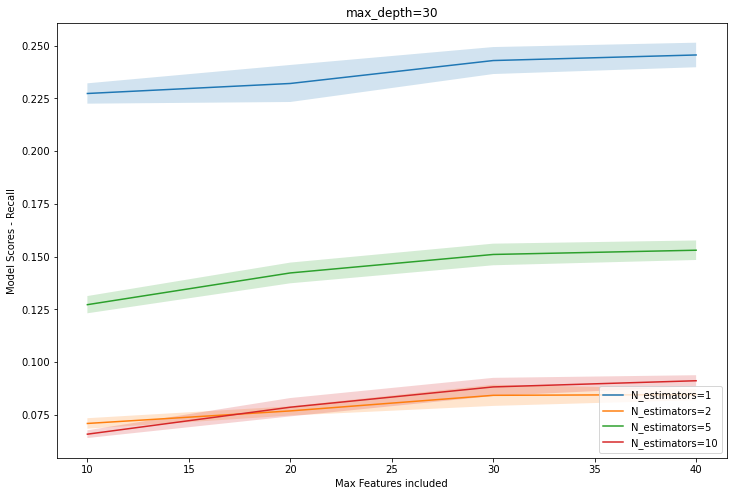

In [189]:
plt.rcParams['figure.figsize'] = [12, 8]
for i in [1, 2, 5, 10]:
    bias_errors_n_est = bias_errors[bias_errors['param_n_estimators']==i]
    
    lower_bound = bias_errors_n_est['mean_test_score'] - bias_errors_n_est['std_test_score']
    upper_bound = bias_errors_n_est['mean_test_score'] + bias_errors_n_est['std_test_score']
    
    plt.plot([10, 20, 30, 40], bias_errors_n_est['mean_test_score'])
    plt.fill_between(x=[10, 20, 30, 40], y1=lower_bound, y2=upper_bound, alpha=0.2)
    

plt.legend(labels=['N_estimators=1', 'N_estimators=2', 'N_estimators=5', 'N_estimators=10'], loc='lower right')
    
plt.title('max_depth=30')
plt.xlabel('Max Features included')
plt.ylabel('Model Scores - Recall')
plt.show()

This chart shows that by running a decision tree, we would get the most reliable results.

#### Tuning the Decision Tree's other parameters

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

params = {'criterion': ['gini', 'entropy'],
          'max_depth':[None, 15, 25, 50],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 5, 10],
          'max_features' : [None, 10, 20, 30, 40]}

GS_dt = GridSearchCV(estimator=DecisionTreeClassifier(),
                    param_grid=params,
                    scoring='recall',
                    cv=kfold,
                    n_jobs=-1, 
                    verbose=2)

GS_dt.fit(X_train_full, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


In [ ]:
GS_dt.best_params_

Note: the best parameters are the default ones.


Confusion Matrix
[[101037   8231]
 [  7850   2399]]

Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93    109268
         1.0       0.23      0.23      0.23     10249

    accuracy                           0.87    119517
   macro avg       0.58      0.58      0.58    119517
weighted avg       0.87      0.87      0.87    119517


Distribution of probabilities for the response class


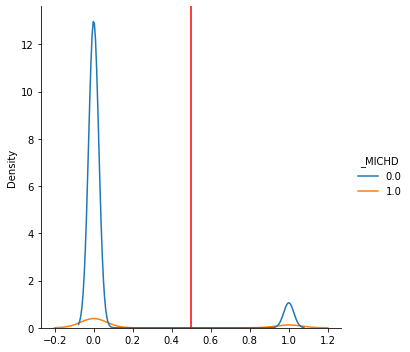

In [146]:
model_performance_reports(GS_dt, X_test_full, y_test)

In [147]:
scores = calc_model_scores(GS_dt, X_test_full, y_test)
update_scorecard('Decision Tree - tuned (best=default)', scores)
model_scorecard

Recall Score, pos=1  Accuracy  \
Random Forest, max_depth=10, n_est=30              0.018051  0.915058   
Random Forest, max_depth=20, n_est=12              0.068592  0.914347   
Random Forest, max_depth=None, n_est=1             0.234072  0.865450   
Decision Tree - default settings                   0.248707  0.865701   
Decision Tree - tuned (best=default)               0.234072  0.865450   

                                        Cohen Kappa Score  Bias Error  \
Random Forest, max_depth=10, n_est=30            0.030852    0.984682   
Random Forest, max_depth=20, n_est=12            0.102326    0.930088   
Random Forest, max_depth=None, n_est=1           0.156114    0.775627   
Decision Tree - default settings                 0.167461    0.753646   
Decision Tree - tuned (best=default)             0.156114    0.766063   

                                        Variance Error  ROC-AUC score  \
Random Forest, max_depth=10, n_est=30         0.002334       0.837811   
Random Forest, max_depth=20, n_est=12         0.008387       0.819523   
Random Forest, max_depth=None, n_est=1        0.008860       0.579372   
Decision Tree - default settings              0.008303       0.586140   
Decision Tree - tuned (best=default)          0.010158       0.579372   

                                        Best Youden  Best Threshold  
Random Forest, max_depth=10, n_est=30      0.523032        0.090395  
Random Forest, max_depth=20, n_est=12      0.484409        0.070081  
Random Forest, max_depth=None, n_est=1     0.158743        1.000000  
Decision Tree - default settings           0.172280        1.000000  
Decision Tree - tuned (best=default)       0.158743        1.000000

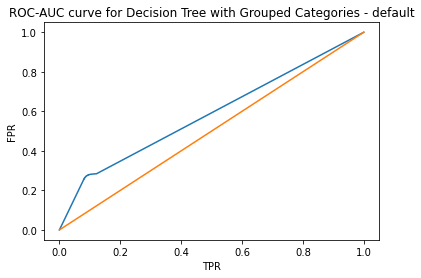

In [82]:
y_preds_dt = dt_groupcat.predict(X_test_full_groupcat)
y_prob_preds_dt = dt_groupcat.predict_proba(X_test_full_groupcat)[:, 1]

fpr_dt, tpr_dt, thresh_dt = roc_curve(y_test, y_prob_preds_dt)

plt.title('ROC-AUC curve for Decision Tree with Grouped Categories - default')
plt.plot(fpr_dt, tpr_dt)
plt.plot([0, 1], [0, 1]) 
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

### Decision Tree and Random Forest models with Grouped Categories

- As dummy encoding makes decision trees very sparse, dummy encoded categorical features rarely ever get picked at the top of the decision tree. 
- This model aims to compare the trees built on ungrouped categories with the grouped ones.

#### Fitting a Decision Tree on the data using grouped categories

In [56]:
X_train_full_groupcat = pd.concat([X_train_categoric, X_train_numeric], axis=1)
X_train_full_groupcat

_STATE  MARITAL  EMPLOY1  _IMPRACE  _ASTHMS1  _EDUCAG  _SMOKER3  \
323733    47.0      5.0      1.0       5.0       3.0      2.0       4.0   
265382    36.0      5.0      1.0       5.0       3.0      1.0       4.0   
377471    53.0      3.0      3.0       1.0       3.0      1.0       1.0   
123636    21.0      1.0      2.0       1.0       3.0      4.0       4.0   
134892    23.0      1.0      4.0       1.0       3.0      4.0       1.0   
...        ...      ...      ...       ...       ...      ...       ...   
212604    31.0      1.0      7.0       1.0       3.0      3.0       4.0   
331622    48.0      3.0      4.0       5.0       3.0      1.0       4.0   
400133    72.0      6.0      2.0       5.0       3.0      1.0       4.0   
1781       1.0      1.0      7.0       1.0       3.0      3.0       3.0   
137933    23.0      1.0      1.0       1.0       3.0      4.0       1.0   

        CVDSTRK3  CHCSCNCR  CHCOCNCR  CHCCOPD2  ADDEPEV3  CHCKDNY2  DEAF  \
323733       2.0       2.0       2.0       2.0       1.0       2.0   2.0   
265382       2.0       2.0       2.0       2.0       2.0       2.0   2.0   
377471       2.0       2.0       2.0       2.0       1.0       2.0   2.0   
123636       2.0       1.0       2.0       2.0       2.0       2.0   2.0   
134892       2.0       2.0       2.0       2.0       2.0       2.0   2.0   
...          ...       ...       ...       ...       ...       ...   ...   
212604       2.0       2.0       2.0       2.0       2.0       1.0   2.0   
331622       2.0       2.0       2.0       2.0       2.0       2.0   2.0   
400133       2.0       2.0       2.0       2.0       2.0       2.0   2.0   
1781         2.0       2.0       2.0       2.0       2.0       2.0   1.0   
137933       2.0       2.0       2.0       2.0       2.0       2.0   2.0   

        BLIND  DIFFWALK  _METSTAT  _TOTINDA  _DRDXAR2  _EXTETH3  _SEX  \
323733    2.0       2.0       1.0       1.0       2.0       1.0   0.0   
265382    2.0       2.0       1.0       1.0       2.0       1.0   1.0   
377471    2.0       2.0       1.0       1.0       1.0       2.0   1.0   
123636    2.0       2.0       2.0       1.0       2.0       1.0   1.0   
134892    2.0       2.0       1.0       2.0       2.0       2.0   0.0   
...       ...       ...       ...       ...       ...       ...   ...   
212604    2.0       2.0       2.0       1.0       2.0       2.0   0.0   
331622    2.0       2.0       1.0       2.0       2.0       1.0   0.0   
400133    2.0       2.0       1.0       2.0       2.0       2.0   1.0   
1781      2.0       2.0       1.0       1.0       1.0       1.0   1.0   
137933    2.0       2.0       2.0       1.0       2.0       1.0   1.0   

        DRNKANY5  _RFDRHV7  DIABETE4  _RFBING5  HHADULT  GENHLTH  PHYSHLTH  \
323733       1.0       2.0       2.0       2.0      1.0      2.0       0.0   
265382       2.0       1.0       2.0       1.0      2.0      3.0       0.0   
377471       2.0       1.0       2.0       1.0      1.0      3.0       0.0   
123636       1.0       1.0       2.0       1.0      2.0      1.0       0.0   
134892       2.0       1.0       2.0       1.0      2.0      2.0       1.0   
...          ...       ...       ...       ...      ...      ...       ...   
212604       2.0       1.0       2.0       1.0      2.0      4.0       0.0   
331622       2.0       1.0       2.0       1.0      3.0      1.0       0.0   
400133       1.0       1.0       2.0       2.0      1.0      1.0       0.0   
1781         1.0       1.0       2.0       1.0      2.0      2.0       0.0   
137933       1.0       1.0       2.0       1.0      2.0      2.0       0.0   

        MENTHLTH  SLEPTIM1  AVEDRNK3  DRNK3GE5  MARIJAN1  _AGE80  HTIN4  \
323733      10.0       6.0      10.0      15.0       0.0    23.0   64.0   
265382       0.0       8.0       0.0       0.0       0.0    35.0   67.0   
377471      15.0       5.0       0.0       0.0       0.0    62.0   72.0   
123636       0.0       7.0       1.0       0.0       0.0    70.0   64.0   
13489

In [59]:
X_test_full_groupcat = pd.concat([X_test_categoric, X_test_numeric], axis=1)
X_test_full_groupcat

_STATE  MARITAL  EMPLOY1  _IMPRACE  _ASTHMS1  _EDUCAG  _SMOKER3  \
263426    36.0      2.0      1.0       5.0       3.0      3.0       4.0   
202298    29.0      2.0      1.0       1.0       3.0      3.0       4.0   
372111    53.0      1.0      7.0       1.0       3.0      3.0       4.0   
182660    27.0      1.0      1.0       1.0       3.0      4.0       4.0   
245835    35.0      1.0      7.0       1.0       3.0      3.0       3.0   
...        ...      ...      ...       ...       ...      ...       ...   
178626    27.0      1.0      1.0       5.0       3.0      1.0       4.0   
44157      9.0      1.0      2.0       4.0       3.0      2.0       4.0   
202592    29.0      4.0      4.0       1.0       1.0      2.0       1.0   
307208    44.0      4.0      7.0       2.0       3.0      4.0       4.0   
362166    51.0      3.0      2.0       1.0       3.0      4.0       1.0   

        CVDSTRK3  CHCSCNCR  CHCOCNCR  CHCCOPD2  ADDEPEV3  CHCKDNY2  DEAF  \
263426       2.0       2.0       2.0       2.0       2.0       2.0   2.0   
202298       2.0       2.0       2.0       2.0       2.0       2.0   2.0   
372111       2.0       1.0       2.0       2.0       2.0       2.0   2.0   
182660       2.0       2.0       2.0       2.0       1.0       2.0   2.0   
245835       2.0       1.0       1.0       1.0       2.0       2.0   2.0   
...          ...       ...       ...       ...       ...       ...   ...   
178626       2.0       2.0       2.0       2.0       2.0       2.0   2.0   
44157        2.0       2.0       2.0       2.0       2.0       2.0   2.0   
202592       2.0       2.0       2.0       2.0       2.0       2.0   2.0   
307208       2.0       2.0       2.0       2.0       2.0       2.0   2.0   
362166       2.0       1.0       1.0       2.0       2.0       2.0   2.0   

        BLIND  DIFFWALK  _METSTAT  _TOTINDA  _DRDXAR2  _EXTETH3  _SEX  \
263426    2.0       2.0       1.0       2.0       2.0       1.0   1.0   
202298    2.0       2.0       1.0       1.0       2.0       1.0   0.0   
372111    2.0       2.0       1.0       1.0       2.0       1.0   0.0   
182660    2.0       1.0       2.0       1.0       2.0       1.0   0.0   
245835    2.0       1.0       1.0       2.0       1.0       2.0   1.0   
...       ...       ...       ...       ...       ...       ...   ...   
178626    2.0       2.0       1.0       1.0       2.0       1.0   1.0   
44157     2.0       2.0       1.0       1.0       2.0       1.0   1.0   
202592    2.0       2.0       1.0       1.0       1.0       1.0   1.0   
307208    1.0       2.0       1.0       2.0       2.0       2.0   0.0   
362166    2.0       2.0       1.0       2.0       1.0       1.0   0.0   

        DRNKANY5  _RFDRHV7  DIABETE4  _RFBING5  HHADULT  GENHLTH  PHYSHLTH  \
263426       1.0       1.0       2.0       1.0      1.0      2.0       0.0   
202298       1.0       2.0       2.0       2.0      1.0      2.0       3.0   
372111       1.0       1.0       2.0       2.0      2.0      2.0       0.0   
182660       2.0       1.0       2.0       1.0      2.0      3.0       0.0   
245835       2.0       1.0       1.0       1.0      2.0      5.0      30.0   
...          ...       ...       ...       ...      ...      ...       ...   
178626       1.0       1.0       2.0       2.0      2.0      3.0       0.0   
44157        2.0       1.0       2.0       1.0      4.0      2.0       0.0   
202592       2.0       1.0       2.0       1.0      1.0      2.0       1.0   
307208       2.0       1.0       1.0       1.0      2.0      3.0       0.0   
362166       2.0       1.0       2.0       1.0      1.0      2.0       0.0   

        MENTHLTH  SLEPTIM1  AVEDRNK3  DRNK3GE5  MARIJAN1  _AGE80  HTIN4  \
263426       1.0       7.0       2.0       0.0       0.0    40.0   69.0   
202298       0.0       7.0       2.0       3.0       0.0    33.0   62.0   
372111       0.0       6.0       1.0       1.0       0.0    73.0   65.0   
182660       3.0       8.0       0.0       0.0       0.0    39.0   64.0   
24583

In [58]:
dt_groupcat = DecisionTreeClassifier(max_depth=30, max_features=30)

dt_groupcat.fit(X_train_full_groupcat, y_train)

DecisionTreeClassifier(max_depth=30, max_features=30)


Confusion Matrix
[[100416   8852]
 [  7606   2643]]

Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92    109268
         1.0       0.23      0.26      0.24     10249

    accuracy                           0.86    119517
   macro avg       0.58      0.59      0.58    119517
weighted avg       0.87      0.86      0.87    119517


Distribution of probabilities for the response class


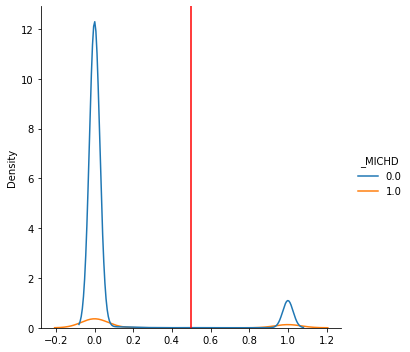

In [63]:
model_performance_reports(dt_groupcat, X_test_full_groupcat, y_test)

In [64]:
scores = calc_model_scores(dt_groupcat, X_train_full_groupcat, y_train, X_test_full_groupcat, y_test)
update_scorecard('Decision Tree with Grouped Categories - default', scores)
model_scorecard

Recall Score, pos=1  \
Decision Tree with Grouped Categories - default             0.257879   

                                                 Accuracy  Cohen Kappa Score  \
Decision Tree with Grouped Categories - default  0.862296           0.167633   

                                                 Bias Error  Variance Error  \
Decision Tree with Grouped Categories - default    0.746788         0.00689   

                                                 ROC-AUC score  Best Youden  \
Decision Tree with Grouped Categories - default       0.585652     0.184886   

                                                 Best Threshold  
Decision Tree with Grouped Categories - default             0.1

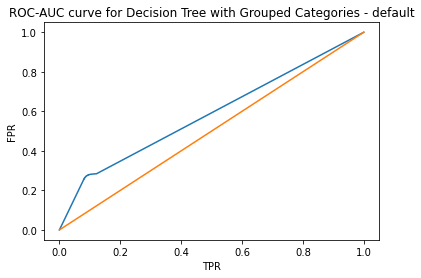

In [81]:
y_preds_dt_gc = dt_groupcat.predict(X_test_full_groupcat)
y_prob_preds_dt_gc = dt_groupcat.predict_proba(X_test_full_groupcat)[:, 1]

fpr_dt_gc, tpr_dt_gc, thresh_dt_gc = roc_curve(y_test, y_prob_preds_dt_gc)

plt.title('ROC-AUC curve for Decision Tree with Grouped Categories - default')
plt.plot(fpr_dt_gc, tpr_dt_gc)
plt.plot([0, 1], [0, 1]) 
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

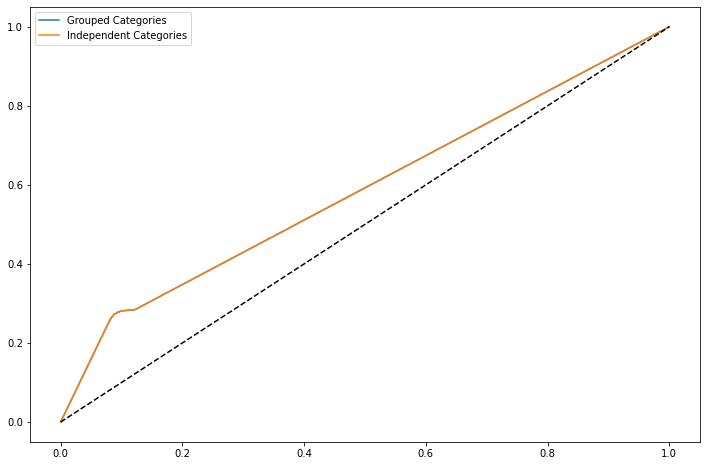

In [87]:
# Comparing the ROC-AUC curves on Decision Trees built on One Hot encoded data and Grouped Categorical data

plt.figure(figsize=[12, 8])
plt.plot(fpr_dt_gc, tpr_dt_gc)
plt.plot(fpr_dt, tpr_dt)
plt.plot([0, 1], [0, 1], c='black', ls='--')
plt.legend(labels=['Grouped Categories', 'Independent Categories'])
plt.show()

There is no difference in the ROC-AUC curves between the grouped categorical and the independent categorical data.

#### Fitting a Random Forest on the same data

In [69]:
rf_groupcat = RandomForestClassifier(max_depth=30, max_features=30)

rf_groupcat.fit(X_train_full_groupcat, y_train)

RandomForestClassifier(max_depth=30, max_features=30)


Confusion Matrix
[[108447    821]
 [  9335    914]]

Classification report
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96    109268
         1.0       0.53      0.09      0.15     10249

    accuracy                           0.92    119517
   macro avg       0.72      0.54      0.55    119517
weighted avg       0.89      0.92      0.89    119517


Distribution of probabilities for the response class


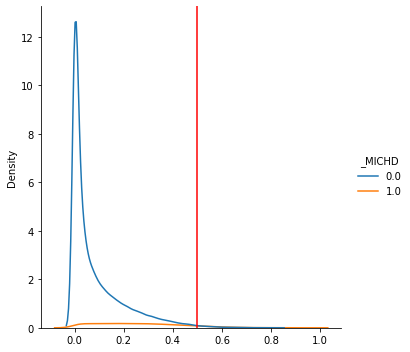

In [70]:
model_performance_reports(rf_groupcat, X_test_full_groupcat, y_test)

In [71]:
scores = calc_model_scores(rf_groupcat, X_train_full_groupcat, y_train, X_test_full_groupcat, y_test)
update_scorecard('Random Forest with Grouped Categories - default', scores)
model_scorecard

Recall Score, pos=1  \
Decision Tree with Grouped Categories - default             0.257879   
Random Forest with Grouped Categories - default             0.089179   

                                                 Accuracy  Cohen Kappa Score  \
Decision Tree with Grouped Categories - default  0.862296           0.167633   
Random Forest with Grouped Categories - default  0.915025           0.130958   

                                                 Bias Error  Variance Error  \
Decision Tree with Grouped Categories - default    0.746788        0.006890   
Random Forest with Grouped Categories - default    0.907107        0.003142   

                                                 ROC-AUC score  Best Youden  \
Decision Tree with Grouped Categories - default       0.585652     0.184886   
Random Forest with Grouped Categories - default       0.822805     0.493839   

                                                 Best Threshold  
Decision Tree with Grouped Categories - default        0.100000  
Random Forest with Grouped Categories - default        0.110755

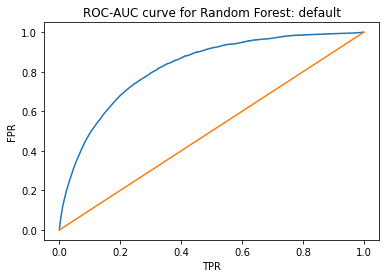

In [78]:
y_preds_rf_gc = rf_groupcat.predict(X_test_full_groupcat)
y_prob_preds_rf_gc = rf_groupcat.predict_proba(X_test_full_groupcat)[:, 1]

fpr_rf_gc, tpr_rf_gc, thresh_rf_gc = roc_curve(y_test, y_prob_preds_rf_gc)

plt.title('ROC-AUC curve for Random Forest: default')
plt.plot(fpr_rf_gc, tpr_rf_gc)
plt.plot([0, 1], [0, 1]) 
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

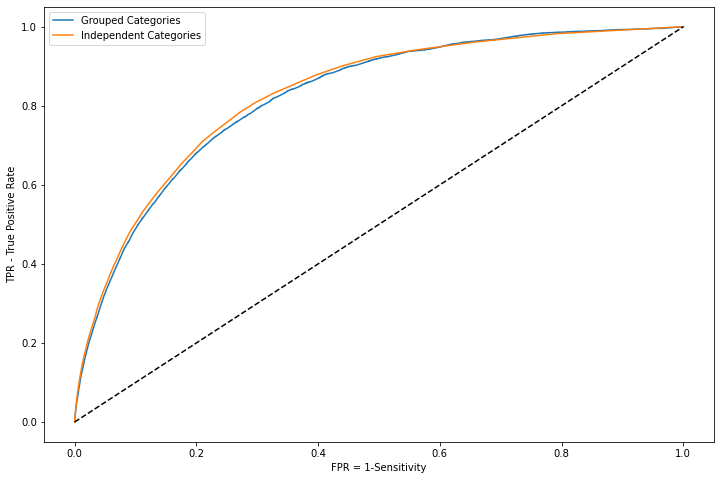

In [145]:
# Comparing the ROC-AUC curves for One Hot encoded data and Grouped Categorical data

plt.figure(figsize=[12, 8])
plt.plot(fpr_rf_gc, tpr_rf_gc)
plt.plot(fpr_rf, tpr_rf)
plt.plot([0, 1], [0, 1], ls='--', c='black')
plt.xlabel('FPR = 1-Sensitivity')
plt.ylabel('TPR - True Positive Rate')
plt.legend(labels=['Grouped Categories', 'Independent Categories'])
plt.show()

According to this graph the Random Forest trained on Grouped Categorical data performs worse than Independent (One-Hot Encoded) Categorical data

## Model : AdaBoostClassifier with Decision Tree, default

In [149]:
from sklearn.ensemble import AdaBoostClassifier

ada_dt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

ada_dt.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())


Confusion Matrix
[[100973   8295]
 [  7762   2487]]

Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93    109268
         1.0       0.23      0.24      0.24     10249

    accuracy                           0.87    119517
   macro avg       0.58      0.58      0.58    119517
weighted avg       0.87      0.87      0.87    119517


Distribution of probabilities for the response class


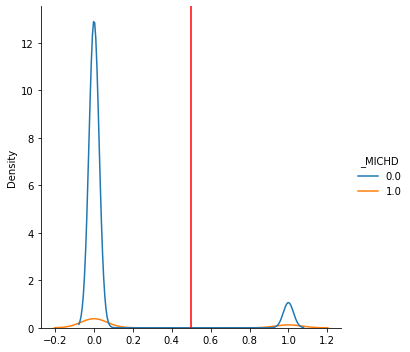

In [151]:
model_performance_reports(ada_dt, X_test, y_test)

In [162]:
scores = calc_model_scores(ada_dt, X_test, y_test)
update_scorecard('AdaBoost Decision Tree default', scores)
model_scorecard

Recall Score, pos=1  Accuracy  \
Random Forest, max_depth=10, n_est=30              0.018051  0.915058   
Random Forest, max_depth=20, n_est=12              0.068592  0.914347   
Random Forest, max_depth=None, n_est=1             0.234072  0.865450   
Decision Tree - default settings                   0.248707  0.865701   
Decision Tree - tuned (best=default)               0.234072  0.865450   
AdaBoost Decision Tree default                     0.242658  0.865651   

                                        Cohen Kappa Score  Bias Error  \
Random Forest, max_depth=10, n_est=30            0.030852    0.984682   
Random Forest, max_depth=20, n_est=12            0.102326    0.930088   
Random Forest, max_depth=None, n_est=1           0.156114    0.775627   
Decision Tree - default settings                 0.167461    0.753646   
Decision Tree - tuned (best=default)             0.156114    0.766063   
AdaBoost Decision Tree default                   0.162905    0.750557   

                                        Variance Error  ROC-AUC score  \
Random Forest, max_depth=10, n_est=30         0.002334       0.837811   
Random Forest, max_depth=20, n_est=12         0.008387       0.819523   
Random Forest, max_depth=None, n_est=1        0.008860       0.579372   
Decision Tree - default settings              0.008303       0.586140   
Decision Tree - tuned (best=default)          0.010158       0.579372   
AdaBoost Decision Tree default                0.011572       0.583372   

                                        Best Youden  Best Threshold  
Random Forest, max_depth=10, n_est=30      0.523032        0.090395  
Random Forest, max_depth=20, n_est=12      0.484409        0.070081  
Random Forest, max_depth=None, n_est=1     0.158743        1.000000  
Decision Tree - default settings           0.172280        1.000000  
Decision Tree - tuned (best=default)       0.158743        1.000000  
AdaBoost Decision Tree default             0.166744        1.000000

Adaboost helped reduce the variance error when compared to a simple decision tree

## Model: AdaBoostClassifier with Decision Tree, tuned

In [153]:
params = {'n_estimators': [1, 10, 50, 100],
         'learning_rate': [0.1, 0.5, 1, 5]}

GS_ada_dt = GridSearchCV(estimator=AdaBoostClassifier(),
                        param_grid=params,
                        scoring='recall',
                        cv=3,
                        n_jobs=-1, 
                        verbose=2)

GS_ada_dt.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1, 5],
                         'n_estimators': [1, 10, 50, 100]},
             scoring='recall', verbose=2)

In [154]:
GS_ada_dt.best_params_

{'learning_rate': 5, 'n_estimators': 10}

Try to zoom in around these numbers and find the best parameters.

In [294]:
ada_dt_tuned = AdaBoostClassifier(n_estimators=10, 
                                  learning_rate=0.5)

ada_dt_tuned.fit(X_train_full, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=10)


Confusion Matrix
[[108987    281]
 [  9819    430]]

Classification report
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    109268
         1.0       0.60      0.04      0.08     10249

    accuracy                           0.92    119517
   macro avg       0.76      0.52      0.52    119517
weighted avg       0.89      0.92      0.88    119517


Distribution of probabilities for the response class


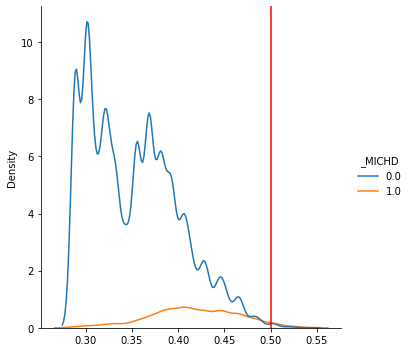

In [295]:
model_performance_reports(ada_dt_tuned, X_test_full, y_test)

In [163]:
scores = calc_model_scores(ada_dt_tuned, X_test, y_test)
update_scorecard('AdaBoost Decision Tree n_est=10, lr=5', scores)
model_scorecard

Recall Score, pos=1  Accuracy  \
Random Forest, max_depth=10, n_est=30              0.018051  0.915058   
Random Forest, max_depth=20, n_est=12              0.068592  0.914347   
Random Forest, max_depth=None, n_est=1             0.234072  0.865450   
Decision Tree - default settings                   0.248707  0.865701   
Decision Tree - tuned (best=default)               0.234072  0.865450   
AdaBoost Decision Tree default                     0.242658  0.865651   
AdaBoost Decision Tree n_est=10, lr=5              1.000000  0.085753   

                                        Cohen Kappa Score  Bias Error  \
Random Forest, max_depth=10, n_est=30            0.030852    0.984682   
Random Forest, max_depth=20, n_est=12            0.102326    0.930088   
Random Forest, max_depth=None, n_est=1           0.156114    0.775627   
Decision Tree - default settings                 0.167461    0.753646   
Decision Tree - tuned (best=default)             0.156114    0.766063   
AdaBoost Decision Tree default                   0.162905    0.750557   
AdaBoost Decision Tree n_est=10, lr=5            0.000000    0.000000   

                                        Variance Error  ROC-AUC score  \
Random Forest, max_depth=10, n_est=30         0.002334       0.837811   
Random Forest, max_depth=20, n_est=12         0.008387       0.819523   
Random Forest, max_depth=None, n_est=1        0.008860       0.579372   
Decision Tree - default settings              0.008303       0.586140   
Decision Tree - tuned (best=default)          0.010158       0.579372   
AdaBoost Decision Tree default                0.011572       0.583372   
AdaBoost Decision Tree n_est=10, lr=5         0.000000       0.351935   

                                        Best Youden  Best Threshold  
Random Forest, max_depth=10, n_est=30      0.523032        0.090395  
Random Forest, max_depth=20, n_est=12      0.484409        0.070081  
Random Forest, max_depth=None, n_est=1     0.158743        1.000000  
Decision Tree - default settings           0.172280        1.000000  
Decision Tree - tuned (best=default)       0.158743        1.000000  
AdaBoost Decision Tree default             0.166744        1.000000  
AdaBoost Decision Tree n_est=10, lr=5      0.000000        1.760255

# Model Type:  Logistic Regression

Assumptions: 
    
    1. The dependent to predict is binary - fulfilled
    2. Linearity of the independent variables and the log(odds) - most of the variables in our dataset are categoric, this will be a check for the 18 numeric variables existing in the dataset.
    3. No strongly influential outliers - we can use the Cook's distance to verify this (or absolute standardized residuals greater than 3)
    4. Absence of multicollinearity - will be checked using VIF
    5. Independence of observations 
    6. Sufficiently large sample size - fulfilled

Pros:
    
    1. The Logistic Model is a good choice due to its ease of interpretability. 
    2. Although the number of features is large, as the sample size is also proportionately large, there is a low risk of the model overfitting the data.
    

Cons:
    
    1. Constructs linear decision boundaries, which could lead to highly biased models which are not good at identifying complex relationships in the data.

## Model: Logistic Regression (using statsmodels)

In [155]:
Xc_train = sm.add_constant(X_train_full)
logit = sm.Logit(y_train, Xc_train)

logit = logit.fit()

logit.summary()

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.225797
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 _MICHD   No. Observations:               278870
Model:                          Logit   Df Residuals:                   278758
Method:                           MLE   Df Model:                          111
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.2283
Time:                        09:05:00   Log-Likelihood:                -62968.
converged:                       True   LL-Null:                       -81598.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4239      0.115     -3.680      0.000      -0.650      -0.198
_STATE_2.0      -0.1065      0.103     -1.032      0.302      -0.309       0.096
_STATE_4.0      -0.1073      0.076     -1.407      0.159      -0.257       0.042
_STATE_5.0       0.0672      0.081      0.831      0.406      -0.091       0.226
_STATE_6.0      -0.1789      0.102     -1.753      0.080      -0.379       0.021
_STATE_8.0      -0.1534      0.081     -1.904      0.057      -0.311       0.004
_STATE_9.0       0.0315      0.080      0.393      0.695      -0.126       0.189
_STATE_10.0      0.0896      0.095      0.943      0.346      -0.097       0.276
_STATE_11.0     -0.0309      0.110     -0.280      0.779      -0.247       0.185
_STATE_12.0     -0.0709      0.072     -0.986      0.324      -0.212       0.070
_STATE_13.0      0.0559      0.075      0.742      0.458      -0.092       0.204
_STATE_15.0     -0.3560      0.092     -3.859      0.000      -0.537      -0.175
_STATE_16.0     -0.0165      0.087     -0.190      0.849      -0.187       0.154
_STATE_17.0     -0.0760      0.102     -0.744      0.457      -0.276       0.124
_STATE_18.0      0.0171      0.077      0.222      0.824      -0.134       0.168
_STATE_19.0      0.0023      0.078      0.030      0.976      -0.150       0.154
_STATE_20.0     -0.0114      0.076     -0.150      0.881      -0.160       0.137
_STATE_21.0     -0.0192      0.091     -0.210      0.834      -0.198       0.160
_STATE_22.0      0.0592      0.088      0.673      0.501      -0.113       0.232
_STATE_23.0      0.0467      0.073      0.637      0.524      -0.097       0.190
_STATE_24.0     -0.0424      0.073     -0.582      0.560      -0.185       0.100
_STATE_25.0     -0.0485      0.086     -0.560      0.575      -0.218       0.121
_STATE_26.0     -0.0690      0.081     -0.850      0.395      -0.228       0.090
_STATE_27.0     -0.0182      0.073     -0.251      0.802      -0.160       0.124
_STATE_28.0      0.0422      0.080      0.530      0.596      -0.114       0.198
_STATE_29.0     -0.0301      0.076     -0.396      0.692      -0.179       0.119
_STATE_30.0     -0.1210      0.086     -1.403      0.161      -0.290       0.048
_STATE_31.0     -0.0447      0.072     -0.619      0.536      -0.186       0.097
_STATE_32.0     -0.0322      0.112     -0.287      0.774      -0.251       0.187
_STATE_33.0     -0.0157      0.083     -0.191      0.849      -0.178       0.146
_STATE_34.0      0.0321      0.077      0.415      0.678      -0.120       0.184
_STATE_35.0     -0.1213      0.083     -1.467      0.142      -0.283       0.041
_STATE_36.0     -0.0061      0.073     -0.084      0.933      -0.149       0.136
_STATE_37.0     -0.0174      0.087     -0.200      0.841      -0.187       0.153
_STATE_38.0     -0.0194      0.090     -0.216      0.829      -0.196       0.157
_STATE_39.0      0.0415      0.070      0.590      0.555      -0.096       0.179
_STATE_40.0      0.0531      0.086      0.619      0.536      -0.115       0.221
_

## Model : Logistic Regression - default

In [209]:
lr = LogisticRegression()
lr.fit(X_train_full, y_train)

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()


Confusion Matrix
[[252668   2288]
 [ 21135   2779]]

Classification report
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96    254956
         1.0       0.55      0.12      0.19     23914

    accuracy                           0.92    278870
   macro avg       0.74      0.55      0.57    278870
weighted avg       0.89      0.92      0.89    278870


Distribution of probabilities for the response class


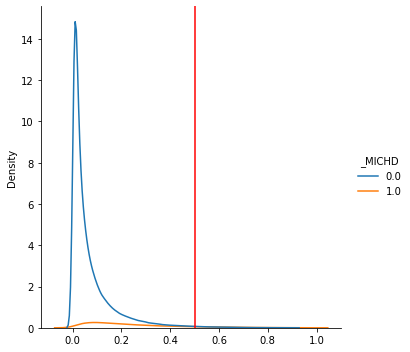

In [210]:
model_performance_reports(lr, X_train_full, y_train)


Confusion Matrix
[[108356    912]
 [  9069   1180]]

Classification report
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96    109268
         1.0       0.56      0.12      0.19     10249

    accuracy                           0.92    119517
   macro avg       0.74      0.55      0.57    119517
weighted avg       0.89      0.92      0.89    119517


Distribution of probabilities for the response class


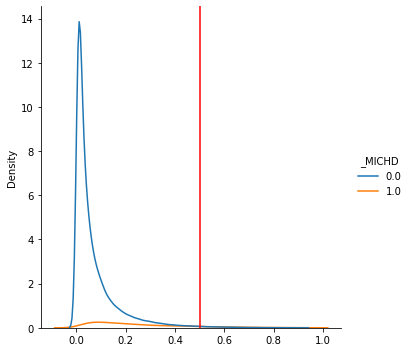

In [211]:
model_performance_reports(lr, X_test_full, y_test)

From the above train and test scores, we see that the model is not really overfitting on the training data. 
There may be no need for regularization.

In [212]:
scores = calc_model_scores(lr, X_train_full, y_train, X_test_full, y_test)
update_scorecard('Logistic Regression - default settings', scores)
model_scorecard

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Recall Score, pos=1  Accuracy  \
Logistic Regression - default settings             0.115133  0.916489   

                                        Cohen Kappa Score  Bias Error  \
Logistic Regression - default settings           0.167015    0.883549   

                                        Variance Error  ROC-AUC score  \
Logistic Regression - default settings           0.004       0.844329   

                                        Best Youden  Best Threshold  
Logistic Regression - default settings     0.536723        0.077961

## Model: Regularized Logistic Regression using statsmodels

In [156]:
logit_reg = sm.Logit(y_train.values, Xc_train)

logit_reg = logit_reg.fit_regularized(method='l1')

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2257972729372056
            Iterations: 314
            Function evaluations: 314
            Gradient evaluations: 314


In [157]:
logit_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               278870
Model:                          Logit   Df Residuals:                   278758
Method:                           MLE   Df Model:                          111
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.2283
Time:                        09:05:36   Log-Likelihood:                -62968.
converged:                       True   LL-Null:                       -81598.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4421      0.115     -3.833      0.000      -0.668      -0.216
_STATE_2.0      -0.0905      0.103     -0.876      0.381      -0.293       0.112
_STATE_4.0      -0.0932      0.076     -1.219      0.223      -0.243       0.057
_STATE_5.0       0.0812      0.081      1.002      0.316      -0.078       0.240
_STATE_6.0      -0.1640      0.102     -1.606      0.108      -0.364       0.036
_STATE_8.0      -0.1401      0.081     -1.736      0.082      -0.298       0.018
_STATE_9.0       0.0454      0.080      0.565      0.572      -0.112       0.203
_STATE_10.0      0.1039      0.095      1.091      0.275      -0.083       0.290
_STATE_11.0     -0.0166      0.110     -0.150      0.881      -0.233       0.200
_STATE_12.0     -0.0574      0.072     -0.796      0.426      -0.199       0.084
_STATE_13.0      0.0692      0.076      0.916      0.360      -0.079       0.217
_STATE_15.0     -0.3418      0.092     -3.701      0.000      -0.523      -0.161
_STATE_16.0     -0.0028      0.087     -0.033      0.974      -0.173       0.168
_STATE_17.0     -0.0615      0.102     -0.601      0.548      -0.262       0.139
_STATE_18.0      0.0308      0.077      0.397      0.691      -0.121       0.182
_STATE_19.0      0.0160      0.078      0.205      0.837      -0.137       0.168
_STATE_20.0      0.0025      0.076      0.033      0.974      -0.146       0.151
_STATE_21.0     -0.0054      0.091     -0.059      0.953      -0.185       0.174
_STATE_22.0      0.0726      0.088      0.824      0.410      -0.100       0.245
_STATE_23.0      0.0609      0.073      0.830      0.407      -0.083       0.205
_STATE_24.0     -0.0287      0.073     -0.393      0.694      -0.172       0.114
_STATE_25.0     -0.0354      0.087     -0.408      0.683      -0.205       0.134
_STATE_26.0     -0.0555      0.081     -0.682      0.495      -0.215       0.104
_STATE_27.0     -0.0045      0.073     -0.061      0.951      -0.147       0.138
_STATE_28.0      0.0560      0.080      0.701      0.483      -0.100       0.212
_STATE_29.0     -0.0172      0.076     -0.225      0.822      -0.166       0.132
_STATE_30.0     -0.1069      0.086     -1.238      0.216      -0.276       0.062
_STATE_31.0     -0.0312      0.072     -0.431      0.666      -0.173       0.111
_STATE_32.0     -0.0171      0.112     -0.152      0.879      -0.236       0.202
_STATE_33.0     -0.0018      0.083     -0.022      0.983      -0.164       0.160
_STATE_34.0      0.0455      0.078      0.587      0.557      -0.106       0.197
_STATE_35.0     -0.1079      0.083     -1.303      0.193      -0.270       0.054
_STATE_36.0      0.0075      0.073      0.104      0.917      -0.135       0.150
_STATE_37.0     -0.0038      0.087     -0.043      0.966      -0.174       0.167
_STATE_38.0     -0.0059      0.090     -0.065      0.948      -0.183       0.171
_STATE_39.0      0.0550      0.071      0.779      0.436      -0.083       0.193
_STATE_40.0      0.0665      0.086      0.773      0.439      -0.102       0.235
_

As seen, the regularized model is the exact same as the non-regularized model. 

## Model: Using only the the significant features to build a model (Feature Selection 1)

In [ ]:
# run a loop:

# run till at all the features left have a p-val < 0.05
# fit model
# find feature with the highest p_val
# drop feature with the highest p_val

In [158]:
Xc_test = sm.add_constant(X_test_full)

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [160]:
p_max = 1

recall_calc_list = []
cohen_list = []
roc_score_list = []

train_set = Xc_train.copy()
test_set = Xc_test.copy()

while(True):
    #fitting a logit model on the current features
    
    logit_fit = sm.Logit(y_train, train_set)
    
    logit_fit = logit_fit.fit()
    
    y_prob_preds = logit_fit.predict(test_set)
    y_preds = [1 if x > 0.5 else 0 for x in y_prob_preds]
    
    # calculating this round's scores
    recall_calc = recall_score(y_test, y_preds)
    cohen = cohen_kappa_score(y_test, y_preds)
    roc_score = roc_auc_score(y_test, y_prob_preds)
    
    # appending this round's scores
    recall_calc_list.append(recall_calc)
    cohen_list.append(cohen)
    roc_score_list.append(roc_score)
    
    p_vals = logit_fit.pvalues
    
    p_max = p_vals.max()
    
    if p_max < 0.05:
        break
    
    else:
        ind_drop = p_vals.idxmax()
        train_set.drop(ind_drop, axis=1, inplace=True)
        test_set.drop(ind_drop, axis=1, inplace=True)
        print('Dropped', ind_drop)
   
# do something to visualize whether or not the model is getting better after dropping variables.

Optimization terminated successfully.
         Current function value: 0.225797
         Iterations 9
Dropped EMPLOY1_5.0
Optimization terminated successfully.
         Current function value: 0.225797
         Iterations 9
Dropped _STATE_19.0
Optimization terminated successfully.
         Current function value: 0.225797
         Iterations 9
Dropped EMPLOY1_4.0
Optimization terminated successfully.
         Current function value: 0.225797
         Iterations 9
Dropped _STATE_48.0
Optimization terminated successfully.
         Current function value: 0.225797
         Iterations 9
Dropped MARIJAN1
Optimization terminated successfully.
         Current function value: 0.225797
         Iterations 9
Dropped DROCDY3_
Optimization terminated successfully.
         Current function value: 0.225797
         Iterations 9
Dropped _STATE_66.0
Optimization terminated successfully.
         Current function value: 0.225797
         Iterations 9
Dropped _STATE_36.0
Optimization terminated succes

Dropped _STATE_35.0
Optimization terminated successfully.
         Current function value: 0.225908
         Iterations 8


In [161]:
print('Columns remaining are:', train_set.columns)

Columns remaining are: Index(['const', '_STATE_4.0', '_STATE_6.0', '_STATE_8.0', '_STATE_15.0',
       '_STATE_41.0', '_STATE_49.0', '_STATE_53.0', '_STATE_72.0',
       'MARITAL_3.0', 'MARITAL_5.0', 'EMPLOY1_1.0', 'EMPLOY1_7.0',
       'EMPLOY1_8.0', '_IMPRACE_2.0', '_IMPRACE_3.0', '_IMPRACE_5.0',
       '_ASTHMS1_3.0', '_EDUCAG_3.0', '_SMOKER3_4.0', 'CVDSTRK3_2.0',
       'CHCSCNCR_2.0', 'CHCCOPD2_2.0', 'ADDEPEV3_2.0', 'CHCKDNY2_2.0',
       'DEAF_2.0', 'BLIND_2.0', 'DIFFWALK_2.0', '_TOTINDA_2.0', '_DRDXAR2_2.0',
       '_EXTETH3_2.0', '_SEX_1.0', 'DRNKANY5_2.0', '_RFDRHV7_2.0',
       'DIABETE4_2.0', '_RFBING5_2.0', 'HHADULT', 'GENHLTH', 'SLEPTIM1',
       '_AGE80', 'HTIN4', 'WTKG3', '_INCOMG', '_DRNKWK1'],
      dtype='object')


In [162]:
selected_features = train_set.columns
selected_features = selected_features.drop('const')
selected_features

Index(['_STATE_4.0', '_STATE_6.0', '_STATE_8.0', '_STATE_15.0', '_STATE_41.0',
       '_STATE_49.0', '_STATE_53.0', '_STATE_72.0', 'MARITAL_3.0',
       'MARITAL_5.0', 'EMPLOY1_1.0', 'EMPLOY1_7.0', 'EMPLOY1_8.0',
       '_IMPRACE_2.0', '_IMPRACE_3.0', '_IMPRACE_5.0', '_ASTHMS1_3.0',
       '_EDUCAG_3.0', '_SMOKER3_4.0', 'CVDSTRK3_2.0', 'CHCSCNCR_2.0',
       'CHCCOPD2_2.0', 'ADDEPEV3_2.0', 'CHCKDNY2_2.0', 'DEAF_2.0', 'BLIND_2.0',
       'DIFFWALK_2.0', '_TOTINDA_2.0', '_DRDXAR2_2.0', '_EXTETH3_2.0',
       '_SEX_1.0', 'DRNKANY5_2.0', '_RFDRHV7_2.0', 'DIABETE4_2.0',
       '_RFBING5_2.0', 'HHADULT', 'GENHLTH', 'SLEPTIM1', '_AGE80', 'HTIN4',
       'WTKG3', '_INCOMG', '_DRNKWK1'],
      dtype='object')

In [163]:
plt.rcParams['figure.figsize'] = [14, 7]

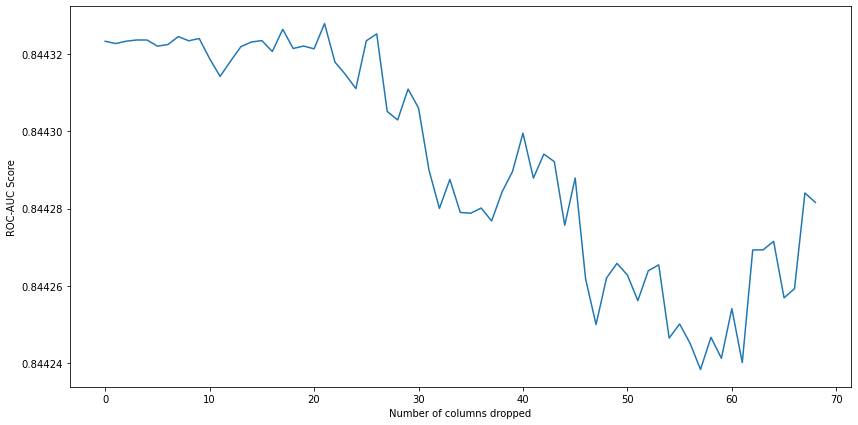

In [168]:
plt.plot(np.arange(0, len(roc_score_list)), roc_score_list)
plt.xlabel('Number of columns dropped')
plt.ylabel('ROC-AUC Score')
plt.show()

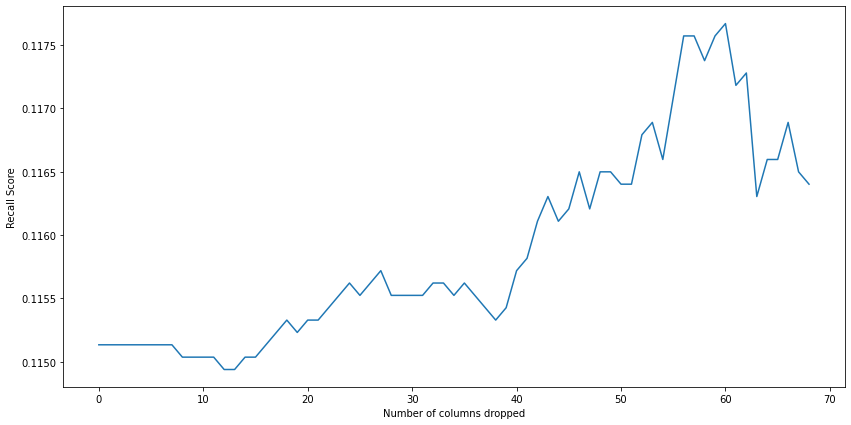

In [169]:
plt.plot(np.arange(0, len(recall_calc_list)), recall_calc_list)
plt.xlabel('Number of columns dropped')
plt.ylabel('Recall Score')
plt.show()

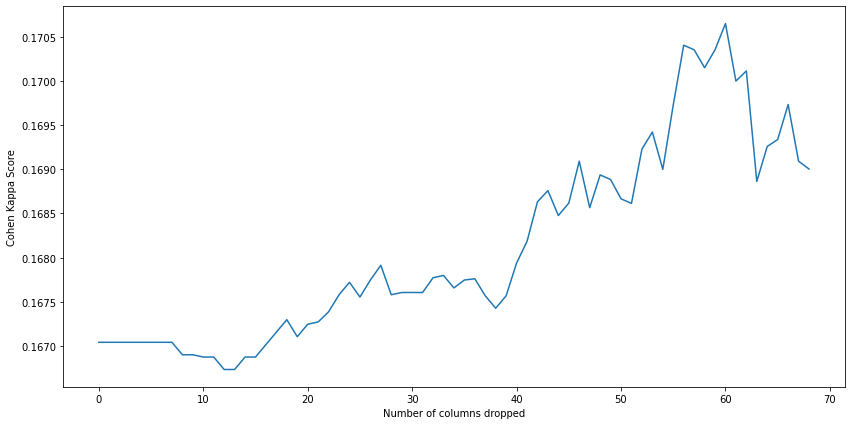

In [170]:
plt.plot(np.arange(0, len(cohen_list)), cohen_list)
plt.xlabel('Number of columns dropped')
plt.ylabel('Cohen Kappa Score')
plt.show()

From the above charts we see that the recall and cohen scores increase with more number of columns dropped, while the roc-auc score slightly depreciates in the later models.

In [171]:
# printing the summary of the final model with the final set of features.
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 _MICHD   No. Observations:               278870
Model:                          Logit   Df Residuals:                   278826
Method:                           MLE   Df Model:                           43
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.2279
Time:                        09:11:38   Log-Likelihood:                -62999.
converged:                       True   LL-Null:                       -81598.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3357      0.062     -5.436      0.000      -0.457      -0.215
_STATE_4.0      -0.0969      0.048     -2.035      0.042      -0.190      -0.004
_STATE_6.0      -0.1746      0.083     -2.111      0.035      -0.337      -0.012
_STATE_8.0      -0.1479      0.054     -2.729      0.006      -0.254      -0.042
_STATE_15.0     -0.3301      0.069     -4.805      0.000      -0.465      -0.195
_STATE_41.0     -0.2166      0.073     -2.957      0.003      -0.360      -0.073
_STATE_49.0     -0.1510      0.052     -2.923      0.003      -0.252      -0.050
_STATE_53.0     -0.1286      0.044     -2.901      0.004      -0.215      -0.042
_STATE_72.0      0.1854      0.077      2.411      0.016       0.035       0.336
MARITAL_3.0      0.0918      0.021      4.468      0.000       0.052       0.132
MARITAL_5.0     -0.1252      0.028     -4.544      0.000      -0.179      -0.071
EMPLOY1_1.0     -0.0876      0.026     -3.361      0.001      -0.139      -0.037
EMPLOY1_7.0      0.0469      0.024      1.972      0.049       0.000       0.094
EMPLOY1_8.0      0.2474      0.031      8.057      0.000       0.187       0.308
_IMPRACE_2.0    -0.2321      0.030     -7.688      0.000      -0.291      -0.173
_IMPRACE_3.0    -0.1932      0.075     -2.585      0.010      -0.340      -0.047
_IMPRACE_5.0    -0.1944      0.037     -5.286      0.000      -0.267      -0.122
_ASTHMS1_3.0    -0.1683      0.021     -7.860      0.000      -0.210      -0.126
_EDUCAG_3.0      0.0627      0.017      3.792      0.000       0.030       0.095
_SMOKER3_4.0    -0.2339      0.016    -14.606      0.000      -0.265      -0.202
CVDSTRK3_2.0    -1.0049      0.024    -41.634      0.000      -1.052      -0.958
CHCSCNCR_2.0    -0.1461      0.021     -6.923      0.000      -0.187      -0.105
CHCCOPD2_2.0    -0.4414      0.021    -20.740      0.000      -0.483      -0.400
ADDEPEV3_2.0    -0.0836      0.020     -4.277      0.000      -0.122      -0.045
CHCKDNY2_2.0    -0.5131      0.026    -19.495      0.000      -0.565      -0.462
DEAF_2.0        -0.1296      0.021     -6.273      0.000      -0.170      -0.089
BLIND_2.0       -0.1305      0.027     -4.869      0.000      -0.183      -0.078
DIFFWALK_2.0    -0.0913      0.019     -4.684      0.000      -0.129      -0.053
_TOTINDA_2.0    -0.0408      0.017     -2.385      0.017      -0.074      -0.007
_DRDXAR2_2.0    -0.2131      0.016    -12.993      0.000      -0.245      -0.181
_EXTETH3_2.0     0.1738      0.017     10.382      0.000       0.141       0.207
_SEX_1.0         0.8000      0.022     36.678      0.000       0.757       0.843
DRNKANY5_2.0     0.0953      0.018      5.421      0.000       0.061       0.130
_RFDRHV7_2.0    -0.1158      0.048     -2.390      0.017      -0.211      -0.021
DIABETE4_2.0    -0.4561      0.018    -25.652      0.000      -0.491      -0.421
_RFBING5_2.0    -0.1161      0.035     -3.303      0.001      -0.185      -0.047
HHADULT          0.0377      0.009      4.296      0.000       0.020       0.055
G

In [568]:
test_set.shape

(119517, 48)

In [172]:
y_logit_fit_prob_preds = logit_fit.predict(test_set)

In [173]:
y_logit_fit_preds = [1 if x > 0.2 else 0 for x in y_logit_fit_prob_preds]

In [174]:
roc_auc_score(y_test.values, y_logit_fit_prob_preds)

0.8442815792895926

In [175]:
recall_score(y_test.values, y_logit_fit_preds)

0.4857059225290272

In [176]:
confusion_matrix(y_test.values, y_logit_fit_preds)

array([[99912,  9356],
       [ 5271,  4978]])

In [177]:
print(classification_report(y_test.values, y_logit_fit_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93    109268
         1.0       0.35      0.49      0.40     10249

    accuracy                           0.88    119517
   macro avg       0.65      0.70      0.67    119517
weighted avg       0.90      0.88      0.89    119517



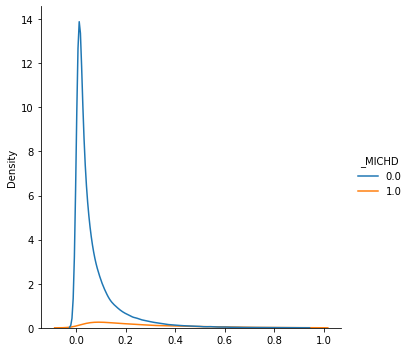

In [178]:
sns.displot(x=y_logit_fit_prob_preds, hue=y_test, kind='kde')
plt.show()

Again, the classes are overlapping.

#### Code to check assumption of Logistic Regression

In [180]:
# Writing a code to check for assumption 2 of Logistic Regression - linearity of independent variables and log(odds)

y_logit_fit_log_preds = np.log(y_logit_fit_prob_preds/(1-y_logit_fit_prob_preds))
y_logit_fit_log_preds

263426   -4.393745
202298   -5.376983
372111   -3.227576
182660   -4.273861
245835    0.450346
            ...   
178626   -3.885792
44157    -3.488312
202592   -3.108841
307208   -1.850619
362166   -3.494096
Length: 119517, dtype: float64

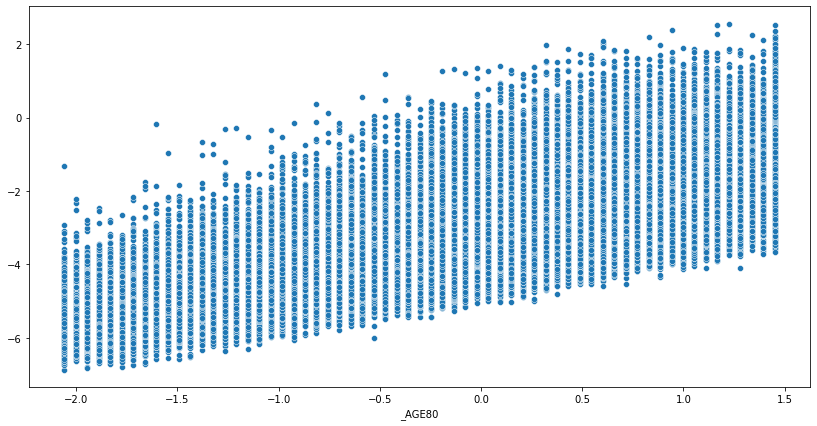

In [181]:
sns.scatterplot(x=test_set['_AGE80'], y=y_logit_fit_log_preds)
plt.show()

<AxesSubplot:xlabel='_SMOKER3_4.0'>

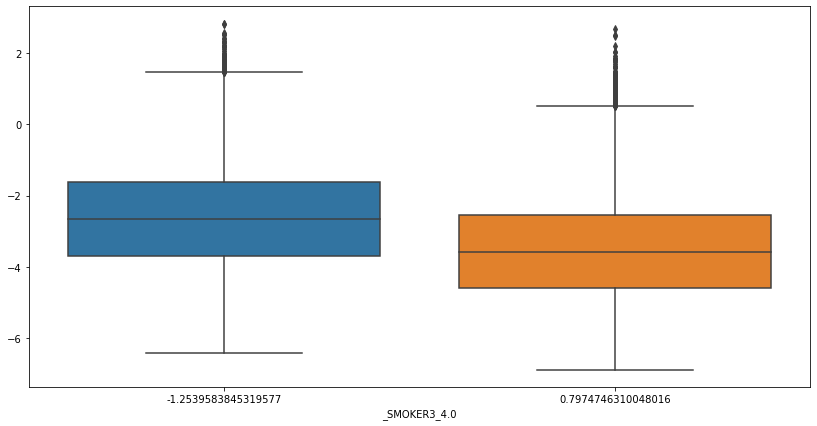

In [589]:
sns.boxplot(x=test_set['_SMOKER3_4.0'], y=y_logit_fit_log_preds)

Checking the assumption of linearity between the predictors and the dependent variable.

Variables like _AGE80 conform to the assumption, while some others like HTIN5 show no linearity.

In [182]:
# using GLM from statsmodel to plot the Cook's distance

logit_results = sm.GLM(y_train, train_set, family=sm.families.Binomial()).fit()

In [183]:
influence = logit_results.get_influence()

In [184]:
summ_df = influence.summary_frame()

In [185]:
diagnosis_df = summ_df[['cooks_d']]

In [186]:
summ_df

dfb_const  dfb__STATE_4.0  dfb__STATE_6.0  dfb__STATE_8.0  \
323733  -0.000005        0.000008        0.000009        0.000007   
265382   0.000068        0.000047        0.000055        0.000047   
377471   0.000144       -0.000068       -0.000057        0.000019   
123636  -0.000565        0.000088        0.000054        0.000108   
134892   0.000003        0.000022        0.000009        0.000018   
...           ...             ...             ...             ...   
212604   0.000444        0.000276        0.000128        0.000159   
331622  -0.000042        0.000025        0.000027        0.000023   
400133   0.000042       -0.000007       -0.000003        0.000003   
1781    -0.000497        0.000176        0.000073        0.000159   
137933  -0.000093        0.000023        0.000012        0.000036   

        dfb__STATE_15.0  dfb__STATE_41.0  dfb__STATE_49.0  dfb__STATE_53.0  \
323733         0.000003         0.000004         0.000001         0.000004   
265382         0.000017         0.000016         0.000029         0.000016   
377471        -0.000069        -0.000055        -0.000045        -0.006084   
123636         0.000056         0.000050         0.000075         0.000078   
134892         0.000015         0.000017         0.000008         0.000018   
...                 ...              ...              ...              ...   
212604         0.000145         0.000194         0.000355         0.000309   
331622         0.000006         0.000003         0.000013         0.000006   
400133        -0.000012        -0.000009        -0.000021        -0.000014   
1781           0.000083         0.000140         0.000139         0.000243   
137933         0.000008         0.000022         0.000018         0.000031   

        dfb__STATE_72.0  dfb_MARITAL_3.0  dfb_MARITAL_5.0  dfb_EMPLOY1_1.0  \
323733         0.000040        -0.000008        -0.000044        -0.000022   
265382         0.000222        -0.000091        -0.000316        -0.000138   
377471         0.000059        -0.002413         0.000466         0.001737   
123636         0.000004         0.000144         0.000116         0.000720   
134892         0.000029         0.000121         0.000155         0.000401   
...                 ...              ...              ...              ...   
212604         0.000065         0.000958         0.000461         0.000059   
331622         0.000122        -0.000130         0.000028         0.000108   
400133        -0.001226         0.000031         0.000149         0.000269   
1781          -0.000019         0.000213         0.000123         0.000270   
137933        -0.000021        -0.000039         0.000103        -0.000165   

        dfb_EMPLOY1_7.0  dfb_EMPLOY1_8.0  dfb__IMPRACE_2.0  dfb__IMPRACE_3.0  \
323733        -0.000027         0.000002          0.000003         -0.000002   
265382        -0.000102        -0.000023          0.000022          0.000022   
377471         0.002368         0.002205          0.000072          0.000077   
123636         0.000903         0.000363         -0.000076          0.000114   
134892         0.000299         0.000310          0.000080          0.000052   
...                 ...              ...               ...               ...   
212604        -0.000994        -0.000189          0.000553          0.000117   
331622         0.000068         0.000065         -0.000003         -0.000003   
400133         0.000192         0.000137         -0.000014          0.000015   
1781          -0.000608        -0.000351          0.000019         -0.000124   
137933        -0.000080        -0.000035          0.000023          0.000045   

        dfb__IMPRACE_5.0  dfb__ASTHMS1_3.0  dfb__EDUCAG_3.0  dfb__SMOKER3_4.0  \
323733         -0.000082         -0.000016         0.000012         -0.000021   
265382         -0.000482         -0.000047         0.000040         -0.000056   
377471          0.000202         -0.000408         0.000862          0.000850   
123636          0.00

In [187]:
cook_threshold = 4 / len(y_train.values)
print('The Cook\'s threshold is:', cook_threshold)

The Cook's threshold is: 1.4343600961021264e-05


In [189]:
# standardize the residuals 
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))

# Find observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]

# Show top 5 highly influential outlier observations

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_727/2365783370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_727/2365783370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))


In [190]:
extreme.sort_values("cooks_d", ascending=False).head(20)

cooks_d  std_resid
50701   0.002282   7.170525
16331   0.001770   4.788160
261924  0.001324   4.475762
38341   0.000867   7.010177
317291  0.000665   3.274928
60575   0.000418   3.044243
301393  0.000361   4.699564
64234   0.000351   3.201756
82458   0.000313   6.634526
310785  0.000305  14.041320
397174  0.000267   4.254907
25101   0.000267   4.546112
205495  0.000259   4.188071
400053  0.000254  11.559754
25410   0.000253   4.162188
131414  0.000249   5.625341
372755  0.000239   4.546708
27223   0.000232   9.716684
147043  0.000230   3.480399
28181   0.000228  11.092024

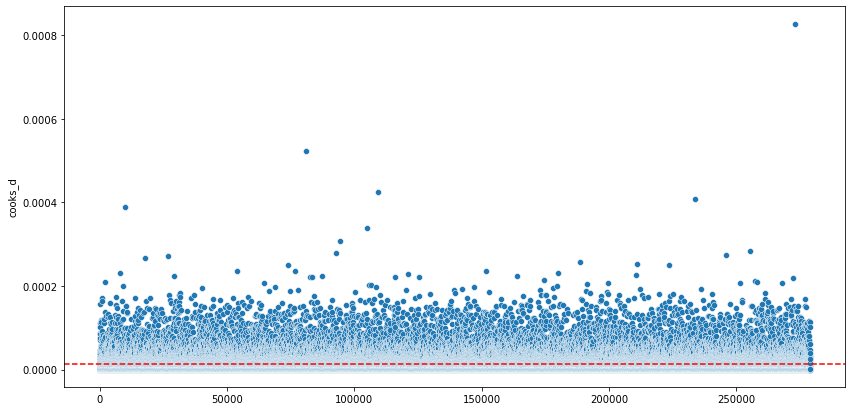

In [618]:
# plotting the influence and the index of cooks distance.

sns.scatterplot(x=np.arange(0, len(y_train.values)), y=diagnosis_df['cooks_d'])
plt.axhline(y=cook_threshold, ls='--', c='r')
plt.show()

In [619]:
diagnosis_df[diagnosis_df['cooks_d'] > cook_threshold].shape

(21612, 2)

In [193]:
# removing all the points present in extreme

extreme_ind = extreme.index

In [195]:
# creating a train and test set without the extreme observations

train_set_lr = train_set.drop(extreme_ind, axis=0)
y_train_lr = y_train.drop(extreme_ind, axis=0)

There are many influential outliers, 21612 to be specific. As we have many samples, we could try building a model which removes these. It may be able to generalize better.

### Model: Logistic Regression, having no outliers (Determined by Cook's distance)

In [197]:
lr_no_outliers = LogisticRegression(C=5)

lr_no_outliers.fit(train_set_lr, y_train_lr)

LogisticRegression(C=5)


Confusion Matrix
[[251569   3383]
 [ 13735   3559]]

Classification report
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    254952
         1.0       0.51      0.21      0.29     17294

    accuracy                           0.94    272246
   macro avg       0.73      0.60      0.63    272246
weighted avg       0.92      0.94      0.92    272246


Distribution of probabilities for the response class


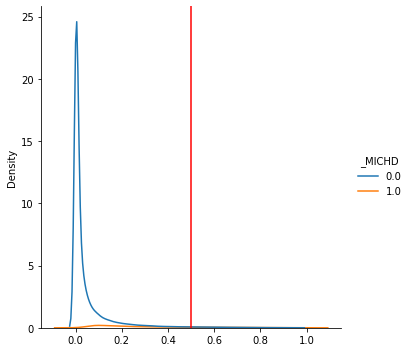

In [203]:
model_performance_reports(lr_no_outliers, train_set_lr, y_train_lr)


Confusion Matrix
[[107903   1365]
 [  8712   1537]]

Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96    109268
         1.0       0.53      0.15      0.23     10249

    accuracy                           0.92    119517
   macro avg       0.73      0.57      0.59    119517
weighted avg       0.89      0.92      0.89    119517


Distribution of probabilities for the response class


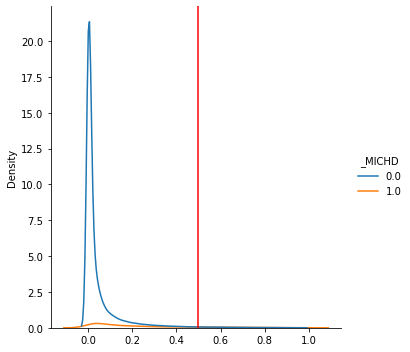

In [201]:
model_performance_reports(lr_no_outliers, test_set, y_test)

- The model above is slightly overfitting
- The variation in train and test recall scores is lesser, at the cost of overall model's performance.

In [213]:
scores = calc_model_scores(lr_no_outliers, train_set_lr, y_train_lr, test_set, y_test)
update_scorecard('Logistic Regression, removed Cook\'s outliers', scores)
model_scorecard

Recall Score, pos=1  Accuracy  \
Logistic Regression - default settings                   0.115133  0.916489   
Logistic Regression, removed Cook's outliers             0.149966  0.915686   

                                              Cohen Kappa Score  Bias Error  \
Logistic Regression - default settings                 0.167015    0.883549   
Logistic Regression, removed Cook's outliers           0.203606    0.793750   

                                              Variance Error  ROC-AUC score  \
Logistic Regression - default settings              0.004000       0.844329   
Logistic Regression, removed Cook's outliers        0.007112       0.842969   

                                              Best Youden  Best Threshold  
Logistic Regression - default settings           0.536723        0.077961  
Logistic Regression, removed Cook's outliers     0.532088        0.030128

We see here that the recall score is slightly improved, as is the Cohen Kappa Score, although the ROC-AUC score is slightly lower. 

The bias and variance errors have increased. 

As our model performance metric selected in Recall / Cohen Kappa, we will go ahead with just the second subset of data (Cook's outliers removed from training data and Selected Features only)

## Model: Ridge Regularized LR using SKlearn

In [ ]:
# using train_set_lr, y_train_lr, test_set, y_test

In [216]:
ridge_lr = RidgeClassifier()

ridge_lr.fit(train_set_lr, y_train_lr)

RidgeClassifier()

In [219]:
y_ridge_lr_preds = ridge_lr.predict(test_set)

confusion_matrix(y_test, y_ridge_lr_preds)

array([[109129,    139],
       [  9938,    311]])

In [220]:
print(classification_report(y_test, y_ridge_lr_preds))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    109268
         1.0       0.69      0.03      0.06     10249

    accuracy                           0.92    119517
   macro avg       0.80      0.51      0.51    119517
weighted avg       0.90      0.92      0.88    119517



The ridge regularization did not make any difference to the original as the initial Logisitic Regression was clearly not overfitting.

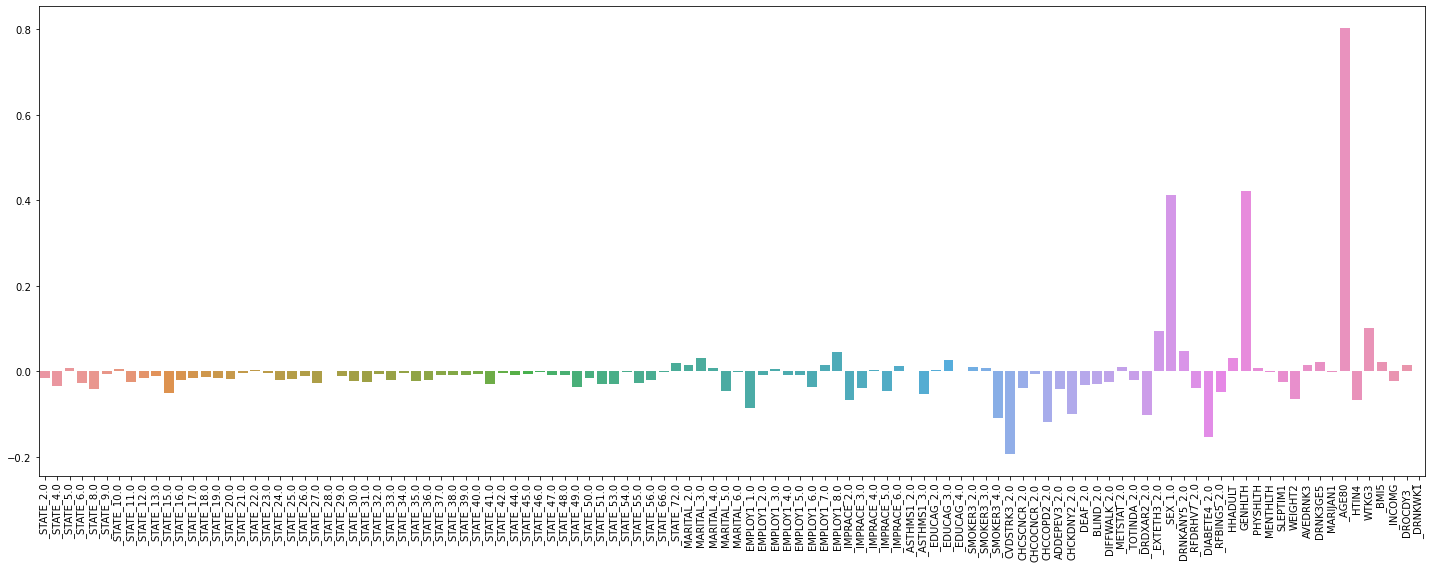

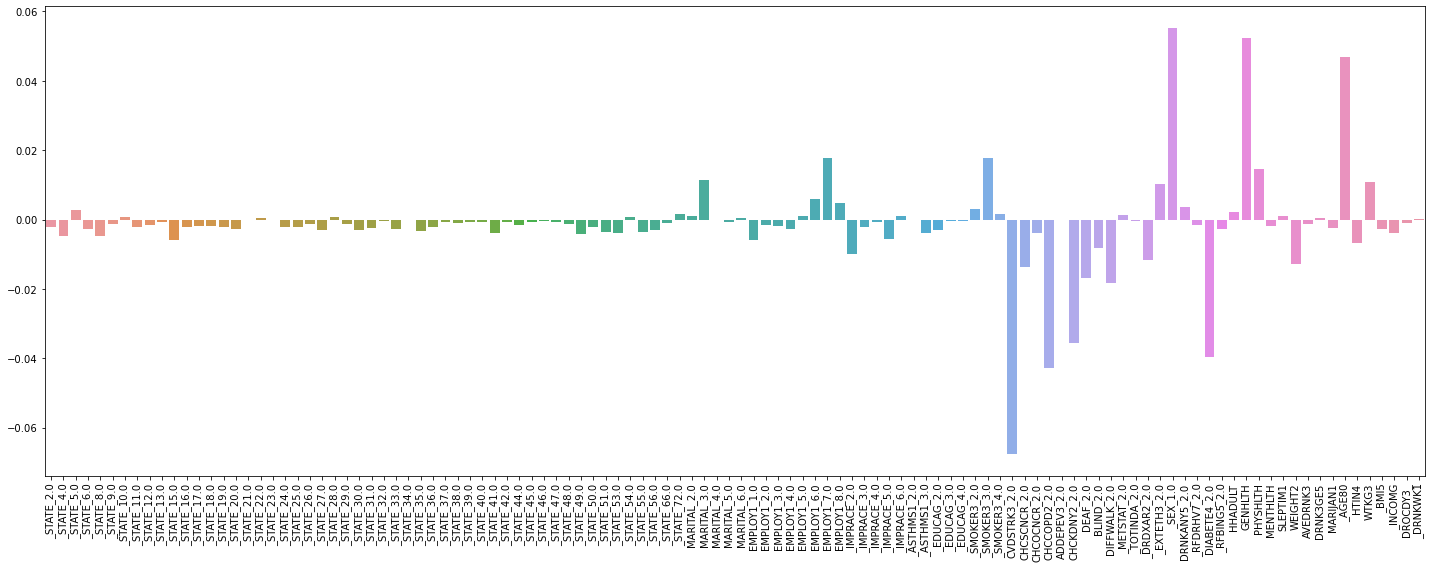

In [435]:
# comparing the ridge coeffs to the default Linear Regression coefficients.

plt.rcParams['figure.figsize'] = [20, 8]

sns.barplot(y=lr.coef_[0], x=X_full.columns)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

sns.barplot(y=ridge_lr.coef_[0], x=X_full.columns)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Model : Tuned Logistic Regression

In [ ]:
# using train_set_lr, y_train_lr, test_set, y_test

In [221]:
param_grid = {'C':[0.01, 0.05, 0.1, 0.5, 1.0, 2, 5, 10]}

GS_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='recall', cv=5)
GS_lr.fit(train_set_lr, y_train_lr)

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1.0, 2, 5, 10]},
             scoring='recall')

In [222]:
GS_lr.best_params_

{'C': 10}

In [224]:
# fit a new logistic model with the best parameters

lr_tuned = LogisticRegression(C=10)
lr_tuned.fit(train_set_lr, y_train_lr)

LogisticRegression(C=10)


Confusion Matrix
[[107903   1365]
 [  8711   1538]]

Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96    109268
         1.0       0.53      0.15      0.23     10249

    accuracy                           0.92    119517
   macro avg       0.73      0.57      0.59    119517
weighted avg       0.89      0.92      0.89    119517


Distribution of probabilities for the response class


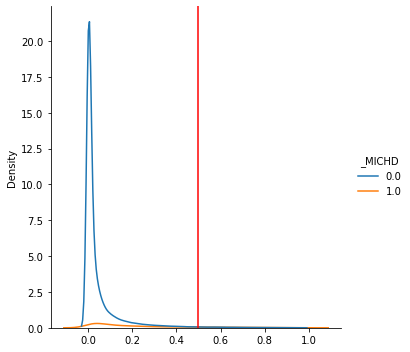

In [225]:
model_performance_reports(lr_tuned, test_set, y_test)

In [226]:
scores = calc_model_scores(lr_tuned, train_set_lr, y_train_lr, test_set, y_test)
update_scorecard('Logistic Regression, C=10', scores)
model_scorecard

Recall Score, pos=1  Accuracy  \
Logistic Regression - default settings                   0.115133  0.916489   
Logistic Regression, removed Cook's outliers             0.149966  0.915686   
Logistic Regression, C=10                                0.150063  0.915694   

                                              Cohen Kappa Score  Bias Error  \
Logistic Regression - default settings                 0.167015    0.883549   
Logistic Regression, removed Cook's outliers           0.203606    0.793750   
Logistic Regression, C=10                              0.203737    0.793750   

                                              Variance Error  ROC-AUC score  \
Logistic Regression - default settings              0.004000       0.844329   
Logistic Regression, removed Cook's outliers        0.007112       0.842969   
Logistic Regression, C=10                           0.007112       0.842969   

                                              Best Youden  Best Threshold  
Logistic Regression - default settings           0.536723        0.077961  
Logistic Regression, removed Cook's outliers     0.532088        0.030128  
Logistic Regression, C=10                        0.532107        0.030129

By running a Grid Search and changing C=10 (inverse of regularization strength), we see that Recall score and Cohen Kappa Score have slightly increased.

In [230]:
# Analysing the Grid Search results

GS_lr_cv_results = pd.DataFrame(GS_lr.cv_results_)
GS_lr_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.846146      0.032632         0.025437        0.001571    0.01   
1       1.093980      0.018975         0.023478        0.000232    0.05   
2       1.075107      0.026303         0.024817        0.001398     0.1   
3       1.143400      0.113555         0.024954        0.002301     0.5   
4       0.967405      0.092181         0.024976        0.001091     1.0   
5       0.878510      0.073184         0.023998        0.001266       2   
6       0.917172      0.042816         0.024503        0.001101       5   
7       0.831960      0.023503         0.023385        0.000466      10   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.198901           0.192886           0.185892   
1  {'C': 0.05}           0.207864           0.200405           0.194276   
2   {'C': 0.1}           0.209309           0.200694           0.195143   
3   {'C': 0.5}           0.210176           0.201272           0.196589   
4   {'C': 1.0}           0.210176           0.201562           0.196589   
5     {'C': 2}           0.210465           0.201272           0.197167   
6     {'C': 5}           0.210465           0.201272           0.196878   
7    {'C': 10}           0.210465           0.201562           0.197167   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.196300           0.202371         0.195270        0.005627   
1           0.206129           0.210755         0.203886        0.005874   
2           0.208731           0.211622         0.205100        0.006197   
3           0.209887           0.212778         0.206141        0.006153   
4           0.209887           0.212778         0.206198        0.006109   
5           0.209887           0.213356         0.206430        0.006142   
6           0.209887           0.213356         0.206372        0.006230   
7           0.209887           0.213356         0.206488        0.006094   

   rank_test_score  
0                8  
1                7  
2                6  
3                5  
4                4  
5                2  
6                3  
7                1

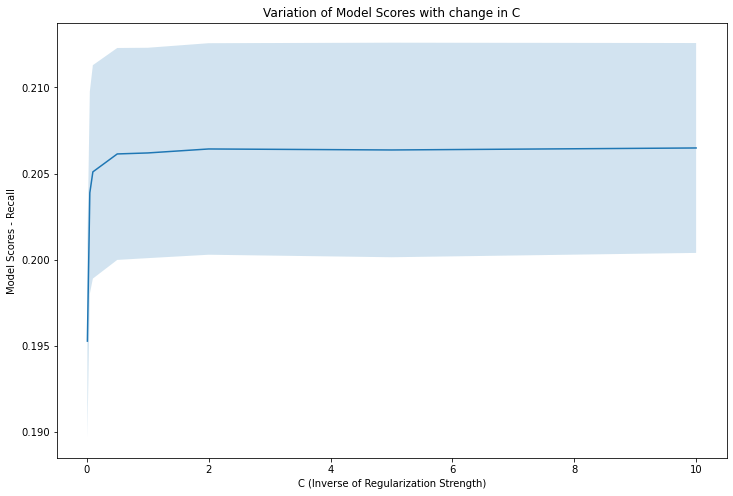

In [233]:
plt.rcParams['figure.figsize'] = [12, 8]

lower_bound = GS_lr_cv_results['mean_test_score'] - GS_lr_cv_results['std_test_score']
upper_bound = GS_lr_cv_results['mean_test_score'] + GS_lr_cv_results['std_test_score']
    
plt.plot([0.01, 0.05, 0.1, 0.5, 1.0, 2, 5, 10], GS_lr_cv_results['mean_test_score'])
plt.fill_between(x=[0.01, 0.05, 0.1, 0.5, 1.0, 2, 5, 10], y1=lower_bound, y2=upper_bound, alpha=0.2)
    

#plt.legend(labels=['N_estimators=1', 'N_estimators=2', 'N_estimators=5', 'N_estimators=10'], loc='lower right')
    
plt.title('Variation of Model Scores with change in C')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Model Scores - Recall')
plt.show()

According to the above graph, increase C makes the model's score increase, but also increase the model's variance error.

#### Running Grid Search 2 for a better value of C, as well as the best regularization technique

In [238]:
param_grid = {'C':[5, 8, 10, 12, 15, 20, 25]}

GS_lr_2 = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='recall', cv=5)
GS_lr_2.fit(train_set_lr, y_train_lr)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [5, 8, 10, 12, 15, 20, 25]}, scoring='recall')

In [240]:
GS_lr_2.best_params_

{'C': 10}

As the same parameter (C=10) was outputted, there's no need to train another model

In [241]:
GS_lr_2_cv_results = pd.DataFrame(GS_lr_2.cv_results_)
GS_lr_2_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.928475      0.054485         0.026228        0.003107       5   
1       0.912382      0.066024         0.023617        0.000222       8   
2       0.869009      0.048860         0.024198        0.000891      10   
3       0.880182      0.036320         0.024049        0.000627      12   
4       0.889108      0.052946         0.023485        0.000520      15   
5       0.865325      0.047875         0.024209        0.001300      20   
6       0.859353      0.049056         0.024163        0.001447      25   

      params  split0_test_score  split1_test_score  split2_test_score  \
0   {'C': 5}           0.210465           0.201272           0.196878   
1   {'C': 8}           0.210465           0.201272           0.197167   
2  {'C': 10}           0.210465           0.201562           0.197167   
3  {'C': 12}           0.210465           0.201272           0.197167   
4  {'C': 15}           0.210465           0.201272           0.197167   
5  {'C': 20}           0.210465           0.201272           0.197167   
6  {'C': 25}           0.210465           0.201272           0.197167   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.209887           0.213356         0.206372        0.006230   
1           0.209887           0.213356         0.206430        0.006142   
2           0.209887           0.213356         0.206488        0.006094   
3           0.209887           0.213356         0.206430        0.006142   
4           0.209887           0.213356         0.206430        0.006142   
5           0.209887           0.213356         0.206430        0.006142   
6           0.209887           0.213356         0.206430        0.006142   

   rank_test_score  
0                7  
1                2  
2                1  
3                2  
4                2  
5                2  
6                2

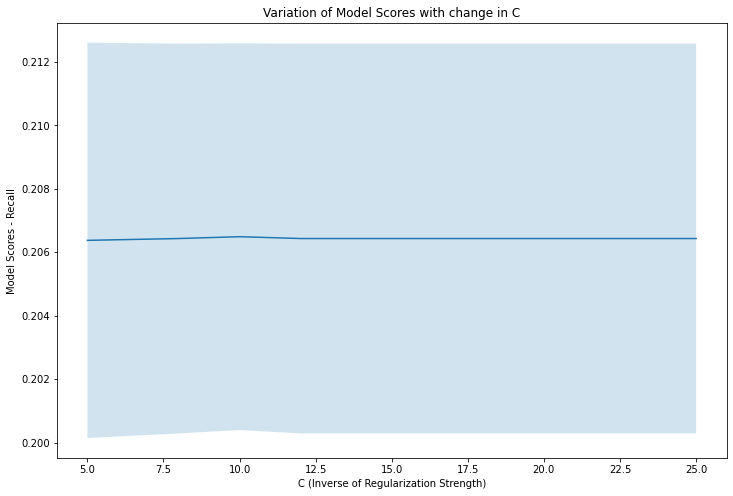

In [242]:
plt.rcParams['figure.figsize'] = [12, 8]

lower_bound = GS_lr_2_cv_results['mean_test_score'] - GS_lr_2_cv_results['std_test_score']
upper_bound = GS_lr_2_cv_results['mean_test_score'] + GS_lr_2_cv_results['std_test_score']
    
plt.plot([5, 8, 10, 12, 15, 20, 25], GS_lr_2_cv_results['mean_test_score'])
plt.fill_between(x=[5, 8, 10, 12, 15, 20, 25], y1=lower_bound, y2=upper_bound, alpha=0.2)
    

#plt.legend(labels=['N_estimators=1', 'N_estimators=2', 'N_estimators=5', 'N_estimators=10'], loc='lower right')
    
plt.title('Variation of Model Scores with change in C')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Model Scores - Recall')
plt.show()

There is no significant in improvement of model scores with the increase in C (Inverse of Regularization Strength)

## Model: AdaBoost LR

In [ ]:
# using train_set_lr, y_train_lr, test_set, y_test

In [245]:
ada_lr = AdaBoostClassifier(base_estimator=LogisticRegression(C=10))

ada_lr.fit(train_set_lr, y_train_lr)

AdaBoostClassifier(base_estimator=LogisticRegression(C=10))


Confusion Matrix
[[107303   1965]
 [  8310   1939]]

Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95    109268
         1.0       0.50      0.19      0.27     10249

    accuracy                           0.91    119517
   macro avg       0.71      0.59      0.61    119517
weighted avg       0.89      0.91      0.90    119517


Distribution of probabilities for the response class


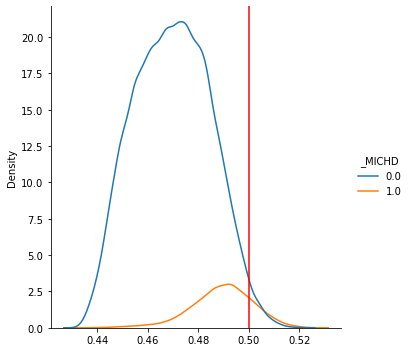

In [246]:
model_performance_reports(ada_lr, test_set, y_test)

In [247]:
scores = calc_model_scores(ada_lr, train_set_lr, y_train_lr, test_set, y_test)
update_scorecard('AdaBoosted Logistic Regression [C=10] - default', scores)
model_scorecard

Recall Score, pos=1  \
Logistic Regression - default settings                      0.115133   
Logistic Regression, removed Cook's outliers                0.149966   
Logistic Regression, C=10                                   0.150063   
AdaBoosted Logistic Regression [C=10] - default             0.189189   

                                                 Accuracy  Cohen Kappa Score  \
Logistic Regression - default settings           0.916489           0.167015   
Logistic Regression, removed Cook's outliers     0.915686           0.203606   
Logistic Regression, C=10                        0.915694           0.203737   
AdaBoosted Logistic Regression [C=10] - default  0.914029           0.237954   

                                                 Bias Error  Variance Error  \
Logistic Regression - default settings             0.883549        0.004000   
Logistic Regression, removed Cook's outliers       0.793750        0.007112   
Logistic Regression, C=10                          0.793750        0.007112   
AdaBoosted Logistic Regression [C=10] - default    0.737328        0.005128   

                                                 ROC-AUC score  Best Youden  \
Logistic Regression - default settings                0.844329     0.536723   
Logistic Regression, removed Cook's outliers          0.842969     0.532088   
Logistic Regression, C=10                             0.842969     0.532107   
AdaBoosted Logistic Regression [C=10] - default       0.841860     0.529978   

                                                 Best Threshold  
Logistic Regression - default settings                 0.077961  
Logistic Regression, removed Cook's outliers           0.030128  
Logistic Regression, C=10                              0.030129  
AdaBoosted Logistic Regression [C=10] - default        0.480354

The AdaBoosted Logistic Regression with (C=10) has a much better recall score than just simple Logistic Regression

## Model: AdaBoost LR - 2

In [248]:
ada_lr_2 = AdaBoostClassifier(base_estimator=LogisticRegression(C=5))

ada_lr_2.fit(train_set_lr, y_train_lr)

AdaBoostClassifier(base_estimator=LogisticRegression(C=5))


Confusion Matrix
[[250086   4866]
 [ 12757   4537]]

Classification report
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97    254952
         1.0       0.48      0.26      0.34     17294

    accuracy                           0.94    272246
   macro avg       0.72      0.62      0.65    272246
weighted avg       0.92      0.94      0.93    272246


Distribution of probabilities for the response class


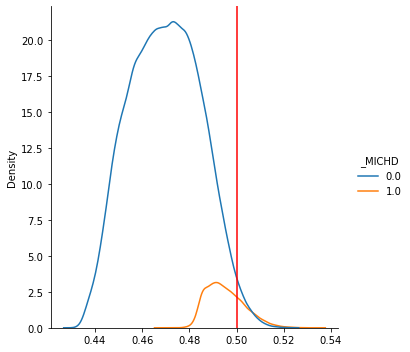

In [250]:
model_performance_reports(ada_lr_2, train_set_lr, y_train_lr)


Confusion Matrix
[[107302   1966]
 [  8315   1934]]

Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95    109268
         1.0       0.50      0.19      0.27     10249

    accuracy                           0.91    119517
   macro avg       0.71      0.59      0.61    119517
weighted avg       0.89      0.91      0.90    119517


Distribution of probabilities for the response class


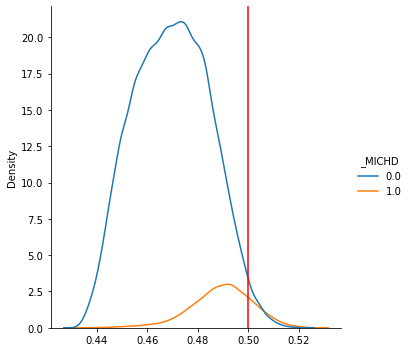

In [251]:
model_performance_reports(ada_lr_2, test_set, y_test)

In [253]:
scores = calc_model_scores(ada_lr_2, train_set_lr, y_train_lr, test_set, y_test)
update_scorecard('AdaBoosted Logistic Regression [C=5] - default', scores)
model_scorecard

Recall Score, pos=1  \
Logistic Regression - default settings                      0.115133   
Logistic Regression, removed Cook's outliers                0.149966   
Logistic Regression, C=10                                   0.150063   
AdaBoosted Logistic Regression [C=10] - default             0.189189   
AdaBoosted Logistic Regression [C=5] - default              0.188701   

                                                 Accuracy  Cohen Kappa Score  \
Logistic Regression - default settings           0.916489           0.167015   
Logistic Regression, removed Cook's outliers     0.915686           0.203606   
Logistic Regression, C=10                        0.915694           0.203737   
AdaBoosted Logistic Regression [C=10] - default  0.914029           0.237954   
AdaBoosted Logistic Regression [C=5] - default   0.913979           0.237321   

                                                 Bias Error  Variance Error  \
Logistic Regression - default settings             0.883549        0.004000   
Logistic Regression, removed Cook's outliers       0.793750        0.007112   
Logistic Regression, C=10                          0.793750        0.007112   
AdaBoosted Logistic Regression [C=10] - default    0.737328        0.005128   
AdaBoosted Logistic Regression [C=5] - default     0.737837        0.006380   

                                                 ROC-AUC score  Best Youden  \
Logistic Regression - default settings                0.844329     0.536723   
Logistic Regression, removed Cook's outliers          0.842969     0.532088   
Logistic Regression, C=10                             0.842969     0.532107   
AdaBoosted Logistic Regression [C=10] - default       0.841860     0.529978   
AdaBoosted Logistic Regression [C=5] - default        0.841809     0.530206   

                                                 Best Threshold  
Logistic Regression - default settings                 0.077961  
Logistic Regression, removed Cook's outliers           0.030128  
Logistic Regression, C=10                              0.030129  
AdaBoosted Logistic Regression [C=10] - default        0.480354  
AdaBoosted Logistic Regression [C=5] - default         0.479670

Using an AdaBoosted Logistic Regression with C=5 did not improve the model

## Model: Tuned Adaboost LR

In [254]:
params = {'n_estimators': [25, 50, 100, 250, 500], 'learning_rate': [0.5, 1, 2]}

GS_lr_tuned = GridSearchCV(estimator=AdaBoostClassifier(base_estimator=LogisticRegression(C=10)),
                          param_grid=params,
                          cv=5, 
                          scoring='recall',
                          n_jobs=-1,
                          verbose=2,)

GS_lr_tuned.fit(train_set_lr, y_train_lr)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END .................learning_rate=0.5, n_estimators=25; total time=  23.7s
[CV] END .................learning_rate=0.5, n_estimators=50; total time=  42.3s
[CV] END ................learning_rate=0.5, n_estimators=250; total time= 3.2min
[CV] END ................learning_rate=0.5, n_estimators=500; total time= 5.6min
[CV] END ..................learning_rate=1, n_estimators=500; total time= 6.1min
[CV] END ..................learning_rate=2, n_estimators=250; total time= 6.4min
[CV] END ..................learning_rate=2, n_estimators=500; total time= 4.9min
[CV] END .................learning_rate=0.5, n_estimators=50; total time=  39.6s
[CV] END ................learning_rate=0.5, n_estimators=100; total time= 1.2min
[CV] END ................learning_rate=0.5, n_estimators=500; total time= 5.6min
[CV] END ..................learning_rate=1, n_estimators=250; total time= 3.4min
[CV] END ..................learning_rate=1, n_es

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=LogisticRegression(C=10)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1, 2],
                         'n_estimators': [25, 50, 100, 250, 500]},
             scoring='recall', verbose=2)

In [256]:
GS_lr_tuned.best_params_

{'learning_rate': 2, 'n_estimators': 500}

In [257]:
GS_lr_tuned_cv_results = pd.DataFrame(GS_lr_tuned.cv_results_)
GS_lr_tuned_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       23.440834      0.261414         0.408339        0.032989   
1       40.563316      1.033486         0.563975        0.111262   
2       70.847280      1.420412         1.148184        0.095674   
3      183.529852      5.208407         2.345339        0.119626   
4      317.542897     21.502242         3.745316        0.292014   
5       30.593896      2.267253         0.446665        0.117667   
6       55.963556      1.591516         0.775388        0.164158   
7      103.581281     12.577524         1.306831        0.098860   
8      201.811628     15.055147         2.121980        0.176475   
9      327.413697     34.722731         4.251536        0.134456   
10      33.064982      1.153824         0.501524        0.078554   
11      76.355349      4.320601         1.126497        0.152412   
12     167.296428      5.651381         1.463764        0.068439   
13     370.383647      5.519843         2.569175        0.303274   
14     415.031123    110.972482         2.333152        0.415527   

   param_learning_rate param_n_estimators  \
0                  0.5                 25   
1                  0.5                 50   
2                  0.5                100   
3                  0.5                250   
4                  0.5                500   
5                    1                 25   
6                    1                 50   
7                    1                100   
8                    1                250   
9                    1                500   
10                   2                 25   
11                   2                 50   
12                   2                100   
13                   2                250   
14                   2                500   

                                         params  split0_test_score  \
0    {'learning_rate': 0.5, 'n_estimators': 25}           0.263660   
1    {'learning_rate': 0.5, 'n_estimators': 50}           0.269153   
2   {'learning_rate': 0.5, 'n_estimators': 100}           0.268864   
3   {'learning_rate': 0.5, 'n_estimators': 250}           0.270309   
4   {'learning_rate': 0.5, 'n_estimators': 500}           0.270598   
5      {'learning_rate': 1, 'n_estimators': 25}           0.269153   
6      {'learning_rate': 1, 'n_estimators': 50}           0.268864   
7     {'learning_rate': 1, 'n_estimators': 100}           0.270598   
8     {'learning_rate': 1, 'n_estimators': 250}           0.270598   
9     {'learning_rate': 1, 'n_estimators': 500}           0.270598   
10     {'learning_rate': 2, 'n_estimators': 25}           0.058398   
11     {'learning_rate': 2, 'n_estimators': 50}           0.658572   
12    {'learning_rate': 2, 'n_estimators': 100}           0.664354   
13    {'learning_rate': 2, 'n_estimators': 250}           0.671003   
14    {'learning_rate': 2, 'n_estimators': 500}           0.686904   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.255350           0.246892           0.259902   
1            0.260555           0.253541           0.262793   
2            0.261423           0.255276           0.262504   
3            0.261423           0.255276           0.263082   
4            0.261712           0.255276           0.263082   
5            0.260555           0.253831           0.262793   
6            0.261423           0.255276           0.262504   
7            0.261423           0.255276           0.262793   
8            0.261712           0.255276           0.263082   
9            0.261712           0.255276           0.263082   
10           0.060440           0.053773           0.063602   
11           0.651822           0.649032           0.657705   
12           0.653557           0.653946           0.664643   
13           0.663678           0.661174           0.673316   
14           0.678716           0.679098           0.688638   

    split4_test_score  mean_test_score  std_test_score  rank_tes

In [258]:
bias_errors = GS_lr_tuned_cv_results[['param_learning_rate', 'param_n_estimators', 'mean_test_score', 'std_test_score']]
#bias_errors_mod = bias_errors.drop(15, axis=0)
bias_errors

param_learning_rate param_n_estimators  mean_test_score  std_test_score
0                  0.5                 25         0.257199        0.005791
1                  0.5                 50         0.262230        0.005192
2                  0.5                100         0.262461        0.004401
3                  0.5                250         0.262577        0.004790
4                  0.5                500         0.262692        0.004871
5                    1                 25         0.262230        0.005065
6                    1                 50         0.262461        0.004401
7                    1                100         0.262519        0.004879
8                    1                250         0.262692        0.004871
9                    1                500         0.262692        0.004871
10                   2                 25         0.060368        0.004135
11                   2                 50         0.653059        0.004329
12                   2                100         0.657858        0.005435
13                   2                250         0.666127        0.005055
14                   2                500         0.682144        0.004663

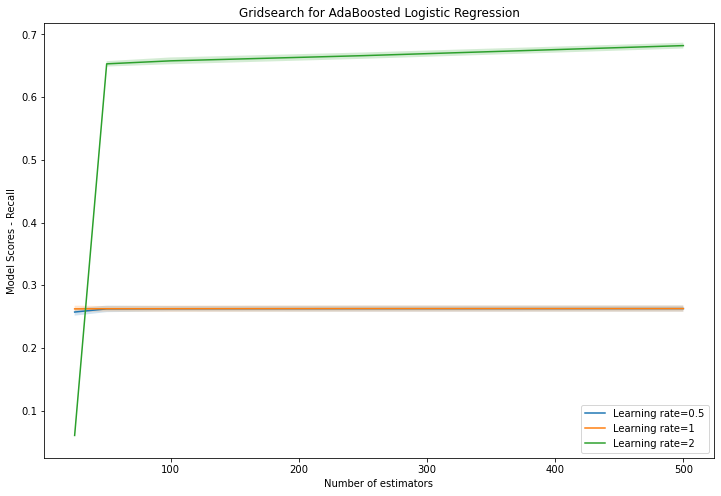

In [260]:
plt.rcParams['figure.figsize'] = [12, 8]
for i in [0.5, 1, 2]:
    bias_errors_lr = bias_errors[bias_errors['param_learning_rate']==i]
    
    lower_bound = bias_errors_lr['mean_test_score'] - bias_errors_lr['std_test_score']
    upper_bound = bias_errors_lr['mean_test_score'] + bias_errors_lr['std_test_score']
    
    plt.plot([25, 50, 100, 250, 500], bias_errors_lr['mean_test_score'])
    plt.fill_between(x=[25, 50, 100, 250, 500], y1=lower_bound, y2=upper_bound, alpha=0.2)

plt.legend(labels=['Learning rate=0.5', 'Learning rate=1', 'Learning rate=2'], 
           loc='lower right')

plt.title('Gridsearch for AdaBoosted Logistic Regression')
plt.xlabel('Number of estimators')
plt.ylabel('Model Scores - Recall')
plt.show()

We see that the AdaBoosted model with 500 estimators is the best, with learning_rate=2

In [261]:
# training a model with the best parameters returned by the Grid Search

ada_lr_tuned = AdaBoostClassifier(base_estimator=LogisticRegression(C=10),
                                 n_estimators=500,
                                 learning_rate=2)

ada_lr_tuned.fit(train_set_lr, y_train_lr)

AdaBoostClassifier(base_estimator=LogisticRegression(C=10), learning_rate=2,
                   n_estimators=500)


Confusion Matrix
[[99384  9884]
 [ 5170  5079]]

Classification report
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93    109268
         1.0       0.34      0.50      0.40     10249

    accuracy                           0.87    119517
   macro avg       0.64      0.70      0.67    119517
weighted avg       0.90      0.87      0.88    119517


Distribution of probabilities for the response class


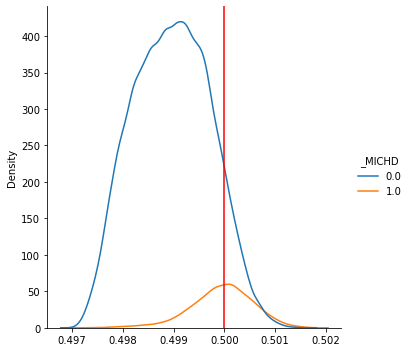

In [262]:
model_performance_reports(ada_lr_tuned, test_set, y_test)

In [263]:
scores = calc_model_scores(ada_lr_tuned, train_set_lr, y_train_lr, test_set, y_test)
update_scorecard('AdaBoosted Logistic Regression [C=5]: n_estimators=500, lr=2', scores)
model_scorecard

Recall Score, pos=1  \
Logistic Regression - default settings                         0.115133   
Logistic Regression, removed Cook's outliers                   0.149966   
Logistic Regression, C=10                                      0.150063   
AdaBoosted Logistic Regression [C=10] - default                0.189189   
AdaBoosted Logistic Regression [C=5] - default                 0.188701   
AdaBoosted Logistic Regression [C=5]: n_estimat...             0.495561   

                                                    Accuracy  \
Logistic Regression - default settings              0.916489   
Logistic Regression, removed Cook's outliers        0.915686   
Logistic Regression, C=10                           0.915694   
AdaBoosted Logistic Regression [C=10] - default     0.914029   
AdaBoosted Logistic Regression [C=5] - default      0.913979   
AdaBoosted Logistic Regression [C=5]: n_estimat...  0.874043   

                                                    Cohen Kappa Score  \
Logistic Regression - default settings                       0.167015   
Logistic Regression, removed Cook's outliers                 0.203606   
Logistic Regression, C=10                                    0.203737   
AdaBoosted Logistic Regression [C=10] - default              0.237954   
AdaBoosted Logistic Regression [C=5] - default               0.237321   
AdaBoosted Logistic Regression [C=5]: n_estimat...           0.335239   

                                                    Bias Error  \
Logistic Regression - default settings                0.883549   
Logistic Regression, removed Cook's outliers          0.793750   
Logistic Regression, C=10                             0.793750   
AdaBoosted Logistic Regression [C=10] - default       0.737328   
AdaBoosted Logistic Regression [C=5] - default        0.737837   
AdaBoosted Logistic Regression [C=5]: n_estimat...    0.318084   

                                                    Variance Error  \
Logistic Regression - default settings                    0.004000   
Logistic Regression, removed Cook's outliers              0.007112   
Logistic Regression, C=10                                 0.007112   
AdaBoosted Logistic Regression [C=10] - default           0.005128   
AdaBoosted Logistic Regression [C=5] - default            0.006380   
AdaBoosted Logistic Regression [C=5]: n_estimat...        0.005696   

                                                    ROC-AUC score  \
Logistic Regression - default settings                   0.844329   
Logistic Regression, removed Cook's outliers             0.842969   
Logistic Regression, C=10                                0.842969   
AdaBoosted Logistic Regression [C=10] - default          0.841860   
AdaBoosted Logistic Regression [C=5] - default           0.841809   
AdaBoosted Logistic Regression [C=5]: n_estimat...       0.841885   

                                                    Best Youden  \
Logistic Regression - default settings                 0.536723   
Logistic Regression, removed Cook's outliers           0.532088   
Logistic Regression, C=10                              0.532107   
AdaBoosted Logistic Regression [C=10] - default        0.529978   
AdaBoosted Logistic Regression [C=5] - default         0.530206   
AdaBoosted Logistic Regression [C=5]: n_estimat...     0.530138   

                                                    Best Threshold  
Logistic Regression - default settings                    0.077961  
Logistic Regression, removed Cook's outliers              0.030128  
Logistic Regression, C=10                                 0.030129  
AdaBoosted Logistic Regression [C=10] - default           0.480354  
AdaBoosted Logistic Regression [C=5] - default            0.479670  
AdaBoosted Logistic Regression [C=5]: n_estimat...        0.499476

There is a significant improvement in the Recall and Cohen Kappa scores, while the ROC-AUC score has not improved much.

## Model: Tuned AdaBoost LR 2

In [264]:
params = {'n_estimators': [500, 600, 750], 'learning_rate': [1, 2, 5, 10]}

GS_ada_lr_tuned_2 = GridSearchCV(estimator=AdaBoostClassifier(base_estimator=LogisticRegression(C=10)),
                          param_grid=params,
                          cv=5, 
                          scoring='recall',
                          n_jobs=-1,
                          verbose=2,)

GS_ada_lr_tuned_2.fit(train_set_lr, y_train_lr)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................learning_rate=1, n_estimators=500; total time= 6.2min
[CV] END ..................learning_rate=1, n_estimators=750; total time= 7.2min
[CV] END ..................learning_rate=2, n_estimators=600; total time=12.4min
[CV] END ..................learning_rate=2, n_estimators=750; total time=16.2min
[CV] END ..................learning_rate=5, n_estimators=600; total time=40.2min
[CV] END .................learning_rate=10, n_estimators=500; total time=18.1min
[CV] END .................learning_rate=10, n_estimators=600; total time=16.1min
[CV] END ..................learning_rate=1, n_estimators=600; total time= 6.7min
[CV] END ..................learning_rate=2, n_estimators=500; total time=10.6min
[CV] END ..................learning_rate=2, n_estimators=600; total time=12.4min
[CV] END ..................learning_rate=5, n_estimators=500; total time=12.2min
[CV] END ..................learning_rate=5, n_es

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=LogisticRegression(C=10)),
             n_jobs=-1,
             param_grid={'learning_rate': [1, 2, 5, 10],
                         'n_estimators': [500, 600, 750]},
             scoring='recall', verbose=2)

In [266]:
GS_ada_lr_tuned_2.best_params_

{'learning_rate': 5, 'n_estimators': 500}

In [268]:
GS_lr_tuned_cv_results_2 = pd.DataFrame(GS_ada_lr_tuned_2.cv_results_)
GS_lr_tuned_cv_results_2

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      351.749163     11.622052         3.655287        0.573558   
1      368.539270     30.838139         4.281451        0.679553   
2      413.880696      9.975380         5.373023        0.495444   
3      635.838738     20.641988         5.025155        0.118732   
4      742.541597      9.819084         6.051655        0.404401   
5      954.844507     14.745318         6.928321        0.620174   
6      768.395471     41.185267         5.444675        0.259366   
7     2410.721953      9.201707         5.263791        0.146285   
8     2242.024618    695.073718         6.433703        0.852197   
9     1008.846949    109.049529         4.593488        0.544769   
10     959.126891     18.606670         5.953416        0.587184   
11     808.459521    147.979193         3.066240        1.106792   

   param_learning_rate param_n_estimators  \
0                    1                500   
1                    1                600   
2                    1                750   
3                    2                500   
4                    2                600   
5                    2                750   
6                    5                500   
7                    5                600   
8                    5                750   
9                   10                500   
10                  10                600   
11                  10                750   

                                        params  split0_test_score  \
0    {'learning_rate': 1, 'n_estimators': 500}           0.270598   
1    {'learning_rate': 1, 'n_estimators': 600}           0.270598   
2    {'learning_rate': 1, 'n_estimators': 750}           0.270598   
3    {'learning_rate': 2, 'n_estimators': 500}           0.686904   
4    {'learning_rate': 2, 'n_estimators': 600}           0.691818   
5    {'learning_rate': 2, 'n_estimators': 750}           0.701648   
6    {'learning_rate': 5, 'n_estimators': 500}           1.000000   
7    {'learning_rate': 5, 'n_estimators': 600}           1.000000   
8    {'learning_rate': 5, 'n_estimators': 750}           1.000000   
9   {'learning_rate': 10, 'n_estimators': 500}           0.000000   
10  {'learning_rate': 10, 'n_estimators': 600}           0.000000   
11  {'learning_rate': 10, 'n_estimators': 750}           0.000000   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.261712           0.255276           0.263082   
1            0.261712           0.255276           0.263082   
2            0.261712           0.255276           0.263082   
3            0.678716           0.679098           0.688638   
4            0.686235           0.687482           0.699046   
5            0.696067           0.698179           0.702804   
6            1.000000           1.000000           1.000000   
7            1.000000           1.000000           1.000000   
8            1.000000           1.000000           1.000000   
9            0.000000           1.000000           0.930038   
10           1.000000           1.000000           0.000000   
11           1.000000           1.000000           0.000000   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
0            0.262793         0.262692        0.004871               10  
1            0.262793         0.262692        0.004871               10  
2            0.262793         0.262692        0.004871               10  
3            0.677363         0.682144        0.004663                6  
4            0.686326         0.690181        0.004878                5  
5            0.692397         0.698219        0.003777                4  
6            1.000000         1.000000        0.000000                1  
7            1.000000         1.000000        0.000000                1  
8            1.000000         1.000000        0.000000                1  
9            0.000000         0.386008        0.473278                9  
1

In [270]:
bias_errors = GS_lr_tuned_cv_results_2[['param_learning_rate', 'param_n_estimators', 'mean_test_score', 'std_test_score']]
#bias_errors_mod = bias_errors.drop(15, axis=0)
bias_errors

param_learning_rate param_n_estimators  mean_test_score  std_test_score
0                    1                500         0.262692        0.004871
1                    1                600         0.262692        0.004871
2                    1                750         0.262692        0.004871
3                    2                500         0.682144        0.004663
4                    2                600         0.690181        0.004878
5                    2                750         0.698219        0.003777
6                    5                500         1.000000        0.000000
7                    5                600         1.000000        0.000000
8                    5                750         1.000000        0.000000
9                   10                500         0.386008        0.473278
10                  10                600         0.600000        0.489898
11                  10                750         0.400000        0.489898

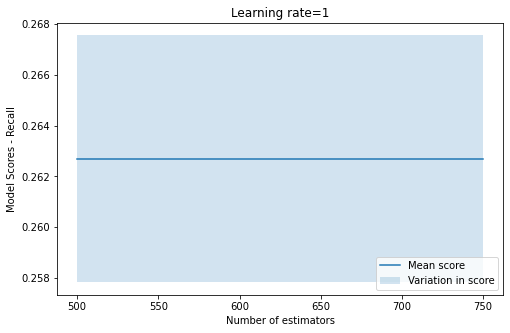

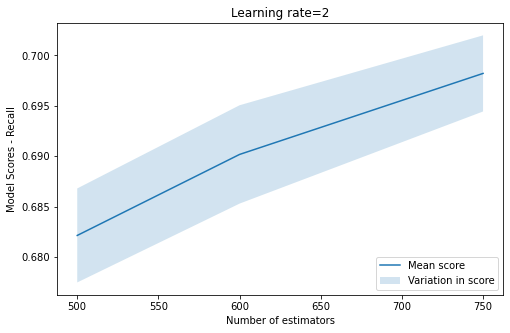

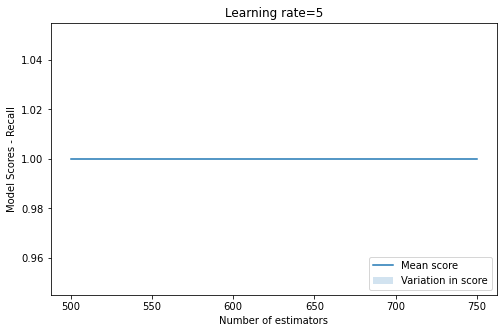

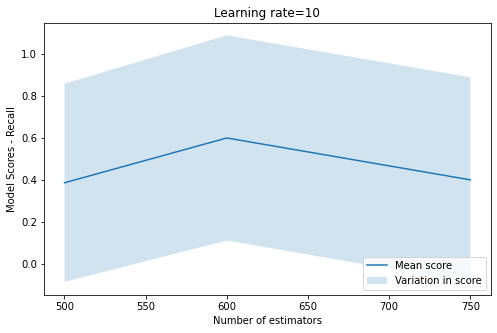

In [271]:
plt.rcParams['figure.figsize'] = [8, 5]
for i in [1, 2, 5, 10]:
    bias_errors_lr = bias_errors[bias_errors['param_learning_rate']==i]
    
    lower_bound = bias_errors_lr['mean_test_score'] - bias_errors_lr['std_test_score']
    upper_bound = bias_errors_lr['mean_test_score'] + bias_errors_lr['std_test_score']
    
    plt.plot([500, 600, 750], bias_errors_lr['mean_test_score'])
    plt.fill_between(x=[500, 600, 750], y1=lower_bound, y2=upper_bound, alpha=0.2)

    plt.legend(labels=['Mean score', 'Variation in score'], loc='lower right')
    plt.title(str('Learning rate='+ str(i)))
    plt.xlabel('Number of estimators')
    plt.ylabel('Model Scores - Recall')
    plt.show()

- Note, we can't pick the best one because of the below reason.
- We also see that with higher learning rates, the models get increasingly more unstable.

- Maybe the best combination to pick is with learning rate=2 and number of estimators around 600

In [ ]:
# train_set_lr, y_train_lr, test_set, y_test

In [273]:
ada_lr_tuned_2 = AdaBoostClassifier(base_estimator=LogisticRegression(C=10),
                                  n_estimators=750, learning_rate=2)

ada_lr_tuned_2.fit(train_set_lr, y_train_lr)

AdaBoostClassifier(base_estimator=LogisticRegression(C=10), learning_rate=2,
                   n_estimators=750)


Confusion Matrix
[[230522  24430]
 [  5216  12078]]

Classification report
              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94    254952
         1.0       0.33      0.70      0.45     17294

    accuracy                           0.89    272246
   macro avg       0.65      0.80      0.69    272246
weighted avg       0.94      0.89      0.91    272246


Distribution of probabilities for the response class


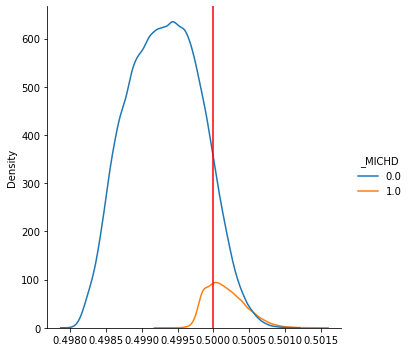

In [275]:
model_performance_reports(ada_lr_tuned_2, train_set_lr, y_train_lr)


Confusion Matrix
[[98979 10289]
 [ 5074  5175]]

Classification report
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93    109268
         1.0       0.33      0.50      0.40     10249

    accuracy                           0.87    119517
   macro avg       0.64      0.71      0.67    119517
weighted avg       0.90      0.87      0.88    119517


Distribution of probabilities for the response class


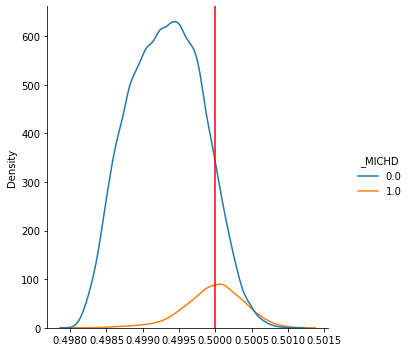

In [274]:
model_performance_reports(ada_lr_tuned_2, test_set, y_test)

The model is clearly overfitting.

Note how recall is not the best way to optimize the score. A model like this will have the best recall.

In [276]:
scores = calc_model_scores(ada_lr_tuned_2, train_set_lr, y_train_lr, test_set, y_test)
update_scorecard('AdaBoosted Logistic Regression [C=10]: n_estimators=750, lr=2', scores)
model_scorecard

Recall Score, pos=1  \
Logistic Regression - default settings                         0.115133   
Logistic Regression, removed Cook's outliers                   0.149966   
Logistic Regression, C=10                                      0.150063   
AdaBoosted Logistic Regression [C=10] - default                0.189189   
AdaBoosted Logistic Regression [C=5] - default                 0.188701   
AdaBoosted Logistic Regression [C=5]: n_estimat...             0.495561   
AdaBoosted Logistic Regression [C=10]: n_estima...             0.504927   

                                                    Accuracy  \
Logistic Regression - default settings              0.916489   
Logistic Regression, removed Cook's outliers        0.915686   
Logistic Regression, C=10                           0.915694   
AdaBoosted Logistic Regression [C=10] - default     0.914029   
AdaBoosted Logistic Regression [C=5] - default      0.913979   
AdaBoosted Logistic Regression [C=5]: n_estimat...  0.874043   
AdaBoosted Logistic Regression [C=10]: n_estima...  0.871458   

                                                    Cohen Kappa Score  \
Logistic Regression - default settings                       0.167015   
Logistic Regression, removed Cook's outliers                 0.203606   
Logistic Regression, C=10                                    0.203737   
AdaBoosted Logistic Regression [C=10] - default              0.237954   
AdaBoosted Logistic Regression [C=5] - default               0.237321   
AdaBoosted Logistic Regression [C=5]: n_estimat...           0.335239   
AdaBoosted Logistic Regression [C=10]: n_estima...           0.333805   

                                                    Bias Error  \
Logistic Regression - default settings                0.883549   
Logistic Regression, removed Cook's outliers          0.793750   
Logistic Regression, C=10                             0.793750   
AdaBoosted Logistic Regression [C=10] - default       0.737328   
AdaBoosted Logistic Regression [C=5] - default        0.737837   
AdaBoosted Logistic Regression [C=5]: n_estimat...    0.318084   
AdaBoosted Logistic Regression [C=10]: n_estima...    0.302251   

                                                    Variance Error  \
Logistic Regression - default settings                    0.004000   
Logistic Regression, removed Cook's outliers              0.007112   
Logistic Regression, C=10                                 0.007112   
AdaBoosted Logistic Regression [C=10] - default           0.005128   
AdaBoosted Logistic Regression [C=5] - default            0.006380   
AdaBoosted Logistic Regression [C=5]: n_estimat...        0.005696   
AdaBoosted Logistic Regression [C=10]: n_estima...        0.004947   

                                                    ROC-AUC score  \
Logistic Regression - default settings                   0.844329   
Logistic Regression, removed Cook's outliers             0.842969   
Logistic Regression, C=10                                0.842969   
AdaBoosted Logistic Regression [C=10] - default          0.841860   
AdaBoosted Logistic Regression [C=5] - default           0.841809   
AdaBoosted Logistic Regression [C=5]: n_estimat...       0.841885   
AdaBoosted Logistic Regression [C=10]: n_estima...       0.841887   

                                                    Best Youden  \
Logistic Regression - default settings                 0.536723   
Logistic Regression, removed Cook's outliers           0.532088   
Logistic Regression, C=10                              0.532107   
AdaBoosted Logistic Regression [C=10] - default        0.529978   
AdaBoosted Logistic Regression [C=5] - default         0.530206   
AdaBoosted Logistic Regression [C=5]: n_estimat...     0.530138   
AdaBoosted Logistic Regression [C=10]: n_estima...     0.530120   

                                                    Best Threshold  
Logistic Regression - default settings                    0.077961  
Logistic Regression, removed Cook's

#### Now, training another ada_lr_tuned_3 after seeing the Grid Search plotted results.

In [277]:
ada_lr_tuned_3 = AdaBoostClassifier(base_estimator=LogisticRegression(C=5),
                                   n_estimators=50,
                                   learning_rate=2)

ada_lr_tuned_3.fit(train_set_lr, y_train_lr)

AdaBoostClassifier(base_estimator=LogisticRegression(C=5), learning_rate=2)


Confusion Matrix
[[233704  21248]
 [  6115  11179]]

Classification report
              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94    254952
         1.0       0.34      0.65      0.45     17294

    accuracy                           0.90    272246
   macro avg       0.66      0.78      0.70    272246
weighted avg       0.93      0.90      0.91    272246


Distribution of probabilities for the response class


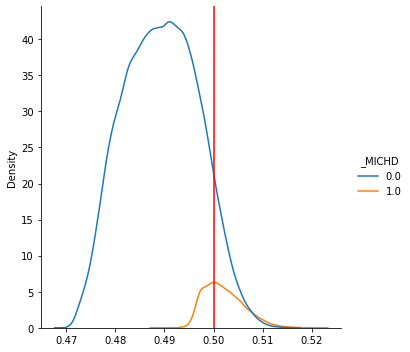

In [278]:
model_performance_reports(ada_lr_tuned_3, train_set_lr, y_train_lr)


Confusion Matrix
[[100304   8964]
 [  5431   4818]]

Classification report
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93    109268
         1.0       0.35      0.47      0.40     10249

    accuracy                           0.88    119517
   macro avg       0.65      0.69      0.67    119517
weighted avg       0.90      0.88      0.89    119517


Distribution of probabilities for the response class


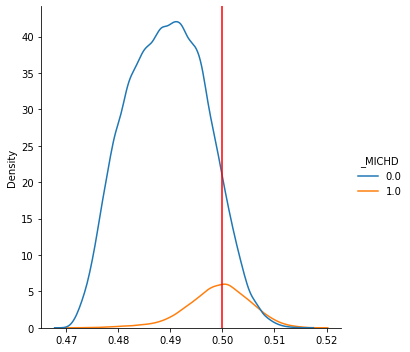

In [279]:
model_performance_reports(ada_lr_tuned_3, test_set, y_test)

In [281]:
scores = calc_model_scores(ada_lr_tuned_3, train_set_lr, y_train_lr, test_set, y_test)
update_scorecard('AdaBoosted Logistic Regression [C=5]: n_estimators=50, lr=2', scores)
model_scorecard

Recall Score, pos=1  \
Logistic Regression - default settings                         0.115133   
Logistic Regression, removed Cook's outliers                   0.149966   
Logistic Regression, C=10                                      0.150063   
AdaBoosted Logistic Regression [C=10] - default                0.189189   
AdaBoosted Logistic Regression [C=5] - default                 0.188701   
AdaBoosted Logistic Regression [C=5]: n_estimat...             0.495561   
AdaBoosted Logistic Regression [C=10]: n_estima...             0.504927   
AdaBoosted Logistic Regression [C=5]: n_estimat...             0.470095   

                                                    Accuracy  \
Logistic Regression - default settings              0.916489   
Logistic Regression, removed Cook's outliers        0.915686   
Logistic Regression, C=10                           0.915694   
AdaBoosted Logistic Regression [C=10] - default     0.914029   
AdaBoosted Logistic Regression [C=5] - default      0.913979   
AdaBoosted Logistic Regression [C=5]: n_estimat...  0.874043   
AdaBoosted Logistic Regression [C=10]: n_estima...  0.871458   
AdaBoosted Logistic Regression [C=5]: n_estimat...  0.879557   

                                                    Cohen Kappa Score  \
Logistic Regression - default settings                       0.167015   
Logistic Regression, removed Cook's outliers                 0.203606   
Logistic Regression, C=10                                    0.203737   
AdaBoosted Logistic Regression [C=10] - default              0.237954   
AdaBoosted Logistic Regression [C=5] - default               0.237321   
AdaBoosted Logistic Regression [C=5]: n_estimat...           0.335239   
AdaBoosted Logistic Regression [C=10]: n_estima...           0.333805   
AdaBoosted Logistic Regression [C=5]: n_estimat...           0.335635   

                                                    Bias Error  \
Logistic Regression - default settings                0.883549   
Logistic Regression, removed Cook's outliers          0.793750   
Logistic Regression, C=10                             0.793750   
AdaBoosted Logistic Regression [C=10] - default       0.737328   
AdaBoosted Logistic Regression [C=5] - default        0.737837   
AdaBoosted Logistic Regression [C=5]: n_estimat...    0.318084   
AdaBoosted Logistic Regression [C=10]: n_estima...    0.302251   
AdaBoosted Logistic Regression [C=5]: n_estimat...    0.354732   

                                                    Variance Error  \
Logistic Regression - default settings                    0.004000   
Logistic Regression, removed Cook's outliers              0.007112   
Logistic Regression, C=10                                 0.007112   
AdaBoosted Logistic Regression [C=10] - default           0.005128   
AdaBoosted Logistic Regression [C=5] - default            0.006380   
AdaBoosted Logistic Regression [C=5]: n_estimat...        0.005696   
AdaBoosted Logistic Regression [C=10]: n_estima...        0.004947   
AdaBoosted Logistic Regression [C=5]: n_estimat...        0.006524   

                                                    ROC-AUC score  \
Logistic Regression - default settings                   0.844329   
Logistic Regression, removed Cook's outliers             0.842969   
Logistic Regression, C=10                                0.842969   
AdaBoosted Logistic Regression [C=10] - default          0.841860   
AdaBoosted Logistic Regression [C=5] - default           0.841809   
AdaBoosted Logistic Regression [C=5]: n_estimat...       0.841885   
AdaBoosted Logistic Regression [C=10]: n_estima...       0.841887   
AdaBoosted Logistic Regression [C=5]: n_estimat...       0.841822   

                                                    Best Youden  \
Logistic Regression - default settings                 0.536723   
Logistic Regression, removed Cook's outliers           0.532088   
Logistic Regression, C=10                              0.532107   
AdaBoosted Logistic Regre

#### Fitting a final couple of models with data that contains outliers

In [282]:
ada_lr_tuned_4 = AdaBoostClassifier(base_estimator=LogisticRegression(C=5),
                                   n_estimators=50,
                                   learning_rate=2)

ada_lr_tuned_4.fit(X_train_full, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(C=5), learning_rate=2)


Confusion Matrix
[[90913 18355]
 [ 3407  6842]]

Classification report
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89    109268
         1.0       0.27      0.67      0.39     10249

    accuracy                           0.82    119517
   macro avg       0.62      0.75      0.64    119517
weighted avg       0.90      0.82      0.85    119517


Distribution of probabilities for the response class


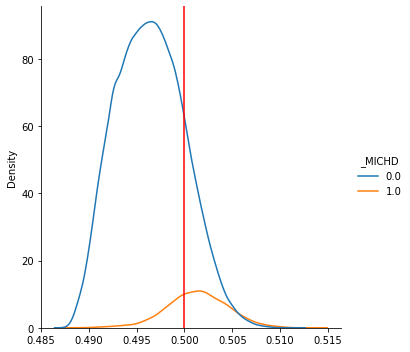

In [283]:
model_performance_reports(ada_lr_tuned_4, X_test_full, y_test)

In [284]:
scores = calc_model_scores(ada_lr_tuned_4, X_train_full, y_train, X_test_full, y_test)
update_scorecard('AdaBoosted Logistic Regression [C=5]: n_estimators=50, lr=2 - fitted with outliers', scores)
model_scorecard

Recall Score, pos=1  \
Logistic Regression - default settings                         0.115133   
Logistic Regression, removed Cook's outliers                   0.149966   
Logistic Regression, C=10                                      0.150063   
AdaBoosted Logistic Regression [C=10] - default                0.189189   
AdaBoosted Logistic Regression [C=5] - default                 0.188701   
AdaBoosted Logistic Regression [C=5]: n_estimat...             0.495561   
AdaBoosted Logistic Regression [C=10]: n_estima...             0.504927   
AdaBoosted Logistic Regression [C=5]: n_estimat...             0.470095   
AdaBoosted Logistic Regression [C=5]: n_estimat...             0.667577   

                                                    Accuracy  \
Logistic Regression - default settings              0.916489   
Logistic Regression, removed Cook's outliers        0.915686   
Logistic Regression, C=10                           0.915694   
AdaBoosted Logistic Regression [C=10] - default     0.914029   
AdaBoosted Logistic Regression [C=5] - default      0.913979   
AdaBoosted Logistic Regression [C=5]: n_estimat...  0.874043   
AdaBoosted Logistic Regression [C=10]: n_estima...  0.871458   
AdaBoosted Logistic Regression [C=5]: n_estimat...  0.879557   
AdaBoosted Logistic Regression [C=5]: n_estimat...  0.817917   

                                                    Cohen Kappa Score  \
Logistic Regression - default settings                       0.167015   
Logistic Regression, removed Cook's outliers                 0.203606   
Logistic Regression, C=10                                    0.203737   
AdaBoosted Logistic Regression [C=10] - default              0.237954   
AdaBoosted Logistic Regression [C=5] - default               0.237321   
AdaBoosted Logistic Regression [C=5]: n_estimat...           0.335239   
AdaBoosted Logistic Regression [C=10]: n_estima...           0.333805   
AdaBoosted Logistic Regression [C=5]: n_estimat...           0.335635   
AdaBoosted Logistic Regression [C=5]: n_estimat...           0.300809   

                                                    Bias Error  \
Logistic Regression - default settings                0.883549   
Logistic Regression, removed Cook's outliers          0.793750   
Logistic Regression, C=10                             0.793750   
AdaBoosted Logistic Regression [C=10] - default       0.737328   
AdaBoosted Logistic Regression [C=5] - default        0.737837   
AdaBoosted Logistic Regression [C=5]: n_estimat...    0.318084   
AdaBoosted Logistic Regression [C=10]: n_estima...    0.302251   
AdaBoosted Logistic Regression [C=5]: n_estimat...    0.354732   
AdaBoosted Logistic Regression [C=5]: n_estimat...    0.330591   

                                                    Variance Error  \
Logistic Regression - default settings                    0.004000   
Logistic Regression, removed Cook's outliers              0.007112   
Logistic Regression, C=10                                 0.007112   
AdaBoosted Logistic Regression [C=10] - default           0.005128   
AdaBoosted Logistic Regression [C=5] - default            0.006380   
AdaBoosted Logistic Regression [C=5]: n_estimat...        0.005696   
AdaBoosted Logistic Regression [C=10]: n_estima...        0.004947   
AdaBoosted Logistic Regression [C=5]: n_estimat...        0.006524   
AdaBoosted Logistic Regression [C=5]: n_estimat...        0.008633   

                                                    ROC-AUC score  \
Logistic Regression - default settings                   0.844329   
Logistic Regression, removed Cook's outliers             0.842969   
Logistic Regression, C=10                                0.842969   
AdaBoosted Logistic Regression [C=10] - default          0.841860   
AdaBoosted Logistic Regression [C=5] - default           0.841809   
AdaBoosted Logistic Regression [C=5]: n_estimat...       0.841885   
AdaBoosted Logistic Regression [C=10]: n_estima...       0.841887   
AdaBoosted Logi

#### Fitting a final model with the outlier data

In [285]:
ada_lr_tuned_5 = AdaBoostClassifier(base_estimator=LogisticRegression(C=10),
                                   n_estimators=750,
                                   learning_rate=2)

ada_lr_tuned_5.fit(X_train_full, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(C=10), learning_rate=2,
                   n_estimators=750)


Confusion Matrix
[[90811 18457]
 [ 3397  6852]]

Classification report
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89    109268
         1.0       0.27      0.67      0.39     10249

    accuracy                           0.82    119517
   macro avg       0.62      0.75      0.64    119517
weighted avg       0.90      0.82      0.85    119517


Distribution of probabilities for the response class


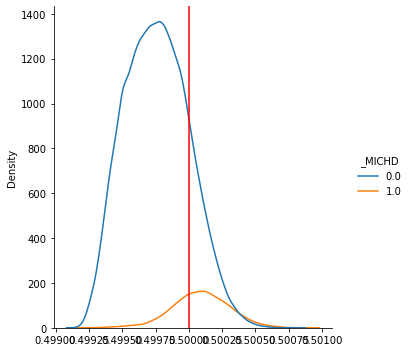

In [286]:
model_performance_reports(ada_lr_tuned_5, X_test_full, y_test)

In [287]:
scores = calc_model_scores(ada_lr_tuned_5, X_train_full, y_train, X_test_full, y_test)
update_scorecard('AdaBoosted Logistic Regression [C=10]: n_estimators=750, lr=2 - fitted with outliers', scores)
model_scorecard

Recall Score, pos=1  \
Logistic Regression - default settings                         0.115133   
Logistic Regression, removed Cook's outliers                   0.149966   
Logistic Regression, C=10                                      0.150063   
AdaBoosted Logistic Regression [C=10] - default                0.189189   
AdaBoosted Logistic Regression [C=5] - default                 0.188701   
AdaBoosted Logistic Regression [C=5]: n_estimat...             0.495561   
AdaBoosted Logistic Regression [C=10]: n_estima...             0.504927   
AdaBoosted Logistic Regression [C=5]: n_estimat...             0.470095   
AdaBoosted Logistic Regression [C=5]: n_estimat...             0.667577   
AdaBoosted Logistic Regression [C=10]: n_estima...             0.668553   

                                                    Accuracy  \
Logistic Regression - default settings              0.916489   
Logistic Regression, removed Cook's outliers        0.915686   
Logistic Regression, C=10                           0.915694   
AdaBoosted Logistic Regression [C=10] - default     0.914029   
AdaBoosted Logistic Regression [C=5] - default      0.913979   
AdaBoosted Logistic Regression [C=5]: n_estimat...  0.874043   
AdaBoosted Logistic Regression [C=10]: n_estima...  0.871458   
AdaBoosted Logistic Regression [C=5]: n_estimat...  0.879557   
AdaBoosted Logistic Regression [C=5]: n_estimat...  0.817917   
AdaBoosted Logistic Regression [C=10]: n_estima...  0.817147   

                                                    Cohen Kappa Score  \
Logistic Regression - default settings                       0.167015   
Logistic Regression, removed Cook's outliers                 0.203606   
Logistic Regression, C=10                                    0.203737   
AdaBoosted Logistic Regression [C=10] - default              0.237954   
AdaBoosted Logistic Regression [C=5] - default               0.237321   
AdaBoosted Logistic Regression [C=5]: n_estimat...           0.335239   
AdaBoosted Logistic Regression [C=10]: n_estima...           0.333805   
AdaBoosted Logistic Regression [C=5]: n_estimat...           0.335635   
AdaBoosted Logistic Regression [C=5]: n_estimat...           0.300809   
AdaBoosted Logistic Regression [C=10]: n_estima...           0.299940   

                                                    Bias Error  \
Logistic Regression - default settings                0.883549   
Logistic Regression, removed Cook's outliers          0.793750   
Logistic Regression, C=10                             0.793750   
AdaBoosted Logistic Regression [C=10] - default       0.737328   
AdaBoosted Logistic Regression [C=5] - default        0.737837   
AdaBoosted Logistic Regression [C=5]: n_estimat...    0.318084   
AdaBoosted Logistic Regression [C=10]: n_estima...    0.302251   
AdaBoosted Logistic Regression [C=5]: n_estimat...    0.354732   
AdaBoosted Logistic Regression [C=5]: n_estimat...    0.330591   
AdaBoosted Logistic Regression [C=10]: n_estima...    0.328893   

                                                    Variance Error  \
Logistic Regression - default settings                    0.004000   
Logistic Regression, removed Cook's outliers              0.007112   
Logistic Regression, C=10                                 0.007112   
AdaBoosted Logistic Regression [C=10] - default           0.005128   
AdaBoosted Logistic Regression [C=5] - default            0.006380   
AdaBoosted Logistic Regression [C=5]: n_estimat...        0.005696   
AdaBoosted Logistic Regression [C=10]: n_estima...        0.004947   
AdaBoosted Logistic Regression [C=5]: n_estimat...        0.006524   
AdaBoosted Logistic Regression [C=5]: n_estimat...        0.008633   
AdaBoosted Logistic Regression [C=10]: n_estima...        0.009021   

                                                    ROC-AUC score  \
Logistic Regression - default settings                   0.844329   
Logistic Regression, removed Cook's outliers             0.842969   
Logistic Reg

- The best Logistic Regression models are the AdaBoost Models
- We see that there is very little difference between the model with n_estimators=50 and n_estimators=500. 
- In favour of increasing model performance in terms of time taken, we will finalize the AdaBoosted Logistic Regression with n_estimators=50
- Further, we see that the models that include the outliers in the data perform better than the ones without the outliers.

In [ ]:
-- end of part 2 --

## Model: GradientBoostClassifier

In [307]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_lr = GradientBoostingClassifier()
# note: change this name, it should be only gbc

gbc_lr.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
model_performance_reports(gbc_lr, X_train, y_train)


Confusion Matrix
[[108496    772]
 [  9230   1019]]

Classification report
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96    109268
         1.0       0.57      0.10      0.17     10249

    accuracy                           0.92    119517
   macro avg       0.75      0.55      0.56    119517
weighted avg       0.89      0.92      0.89    119517


Distribution of probabilities for the response class


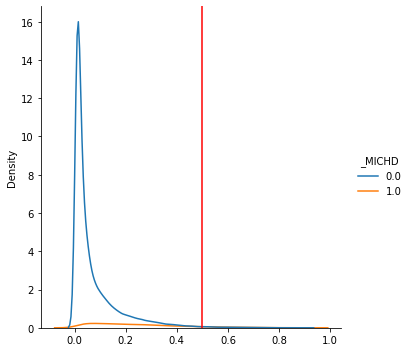

In [309]:
model_performance_reports(gbc_lr, X_test, y_test)

In [311]:
scores = calc_model_scores(gbc_lr, X_test, y_test)
update_scorecard('GradientBoosting - default', scores)
model_scorecard

Recall Score, pos=1  \
Random Forest, max_depth=10, n_est=30                          0.018051   
Random Forest, max_depth=20, n_est=12                          0.068592   
Random Forest, max_depth=None, n_est=1                         0.234072   
Decision Tree - default settings                               0.248707   
Decision Tree - tuned (best=default)                           0.234072   
AdaBoost Decision Tree default                                 0.242658   
AdaBoost Decision Tree n_est=10, lr=5                          1.000000   
Logistic Regression - default settings                         0.118506   
Logistic Regression, C=5                                       0.118506   
AdaBoosted Logistic Regression C=5 - default                   0.128012   
AdaBoosted Logistic Regression C=5: n_estimator...             0.128012   
AdaBoosted Logistic Regression C=5: n_estimator...             0.671383   
AdaBoosted Logistic Regression C=5: n_estimator...             0.671383   
GradientBoosting - default                                     0.099424   

                                                    Accuracy  \
Random Forest, max_depth=10, n_est=30               0.915058   
Random Forest, max_depth=20, n_est=12               0.914347   
Random Forest, max_depth=None, n_est=1              0.865450   
Decision Tree - default settings                    0.865701   
Decision Tree - tuned (best=default)                0.865450   
AdaBoost Decision Tree default                      0.865651   
AdaBoost Decision Tree n_est=10, lr=5               0.085753   
Logistic Regression - default settings              0.916071   
Logistic Regression, C=5                            0.916062   
AdaBoosted Logistic Regression C=5 - default        0.915845   
AdaBoosted Logistic Regression C=5: n_estimator...  0.915845   
AdaBoosted Logistic Regression C=5: n_estimator...  0.818762   
AdaBoosted Logistic Regression C=5: n_estimator...  0.818762   
GradientBoosting - default                          0.916313   

                                                    Cohen Kappa Score  \
Random Forest, max_depth=10, n_est=30                        0.030852   
Random Forest, max_depth=20, n_est=12                        0.102326   
Random Forest, max_depth=None, n_est=1                       0.156114   
Decision Tree - default settings                             0.167461   
Decision Tree - tuned (best=default)                         0.156114   
AdaBoost Decision Tree default                               0.162905   
AdaBoost Decision Tree n_est=10, lr=5                        0.000000   
Logistic Regression - default settings                       0.168614   
Logistic Regression, C=5                                     0.168588   
AdaBoosted Logistic Regression C=5 - default                 0.179924   
AdaBoosted Logistic Regression C=5: n_estimator...           0.179924   
AdaBoosted Logistic Regression C=5: n_estimator...           0.303628   
AdaBoosted Logistic Regression C=5: n_estimator...           0.303628   
GradientBoosting - default                                   0.147520   

                                                    Bias Error  \
Random Forest, max_depth=10, n_est=30                 0.984682   
Random Forest, max_depth=20, n_est=12                 0.930088   
Random Forest, max_depth=None, n_est=1                0.775627   
Decision Tree - default settings                      0.753646   
Decision Tree - tuned (best=default)                  0.766063   
AdaBoost Decision Tree default                        0.750557   
AdaBoost Decision Tree n_est=10, lr=5                 0.000000   
Logistic Regression - default settings                0.882998   
Logistic Regression, C=5                              0.882998   
AdaBoosted Logistic Regression C=5 - default          0.863387   
AdaBoosted Logistic Regression C=5: n_estimator...    0.863387   
AdaBoosted Logistic Regression C=5: n_estimator...    0.335618   
AdaBoosted 

## Model: Tuned GradientBoosting

In [312]:
params = {'learning_rate': [0.1, 0.5, 1],
         'n_estimators': [50, 100, 200],
         'max_depth': [2, 3, 5]}

GS_gbc = GridSearchCV(estimator=GradientBoostingClassifier(),
                     param_grid=params,
                     cv=5,
                     scoring='recall',
                     n_jobs=-1,
                     verbose=2)

GS_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time= 3.3min
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=200; total time= 6.4min
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time= 9.4min
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time= 8.0min
[CV] END ....learning_rate=0.5, max_depth=2, n_estimators=50; total time= 1.7min
[CV] END ....learning_rate=0.5, max_depth=2, n_estimators=50; total time= 1.9min
[CV] END ...learning_rate=0.5, max_depth=2, n_estimators=100; total time= 3.7min
[CV] END ...learning_rate=0.5, max_depth=2, n_estimators=100; total time= 4.0min
[CV] END ...learning_rate=0.5, max_depth=2, n_estimators=200; total time= 7.6min
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=200; total time=10.7min
[CV] END ...learning_rate=0.5, max_depth=5, n_estimators=100; total time= 8.3min
[CV] END ...learning_rate=0.5, max_depth=5, n_e

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1], 'max_depth': [2, 3, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=2)

In [314]:
GS_gbc.best_params_

{'learning_rate': 1, 'max_depth': 5, 'n_estimators': 200}

In [316]:
pd.DataFrame(GS_gbc.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      104.651603      0.471666         1.872802        0.118078   
1      196.558454      1.382385         1.710786        0.405884   
2      381.717443      2.754842         2.596207        0.302558   
3      140.140853      2.067981         1.125248        0.091882   
4      289.334838      1.349756         1.606676        0.202801   
5      556.445054      4.146913         1.931714        0.128325   
6      223.527460      4.131506         0.986976        0.103876   
7      476.923429      4.967268         1.844728        0.153489   
8     1048.922910     17.447193         3.432825        0.974449   
9      107.256203      3.188841         1.037804        0.122525   
10     228.588865      7.083336         3.171480        2.220463   
11     450.451063      2.569419         2.580967        0.377556   
12     169.637475      4.706884         1.717291        0.111478   
13     319.018947      1.499381         2.004196        0.202717   
14     646.413357      6.869410         3.306353        0.851138   
15     268.381064      4.723331         1.888612        0.168096   
16     490.288117      9.899368         1.731480        0.205790   
17    1012.712165     15.232687         2.854140        0.350951   
18     109.206879      6.594267         1.111846        0.160180   
19     210.247241     15.967330         1.598798        0.317209   
20     428.173683     10.216480         2.507520        0.329336   
21     153.310050      5.269810         1.381504        0.171432   
22     303.039266      2.482215         2.836217        0.953162   
23     599.620214      2.984087         2.554437        0.462805   
24     243.243229      9.588343         1.197713        0.108540   
25     567.965496     10.978543         1.696223        0.554350   
26     704.366676    121.408517         1.211708        0.229605   

   param_learning_rate param_max_depth param_n_estimators  \
0                  0.1               2                 50   
1                  0.1               2                100   
2                  0.1               2                200   
3                  0.1               3                 50   
4                  0.1               3                100   
5                  0.1               3                200   
6                  0.1               5                 50   
7                  0.1               5                100   
8                  0.1               5                200   
9                  0.5               2                 50   
10                 0.5               2                100   
11                 0.5               2                200   
12                 0.5               3                 50   
13                 0.5               3                100   
14                 0.5               3                200   
15                 0.5               5                 50   
16                 0.5               5                100   
17                 0.5               5                200   
18                   1               2                 50   
19                   1               2                100   
20                   1               2                200   
21                   1               3                 50   
22                   1               3                100   
23                   1               3                200   
24                   1               5                 50   
25                   1               5                100   
26                   1               5                200   

                                               params  split0_test_score  \
0   {'learning_rate': 0.1, 'max_depth': 2, 'n_esti...           0.078001   
1   {'learning_rate': 0.1, 'max_depth': 2, 'n_esti...           0.105604   
2   {'learning_rate': 0.1, 'max_depth': 2, 'n_esti...           0.115224   
3   {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...           0.090548   
4   {'lear

[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=50; total time= 1.8min
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time= 3.3min
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time= 2.4min
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time= 2.3min
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time= 9.4min
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time= 8.0min
[CV] END ....learning_rate=0.5, max_depth=2, n_estimators=50; total time= 1.7min
[CV] END ....learning_rate=0.5, max_depth=2, n_estimators=50; total time= 1.8min
[CV] END ...learning_rate=0.5, max_depth=2, n_estimators=100; total time= 3.8min
[CV] END ...learning_rate=0.5, max_depth=2, n_estimators=200; total time= 7.6min
[CV] END ....learning_rate=0.5, max_depth=3, n_estimators=50; total time= 2.9min
[CV] END ....learning_rate=0.5, max_depth=3, n_estimators=50; total time= 2.7min
[CV] END ...learning_rate=0.

Looking at the cv scores, we know that the gradient boosting is not giving a great result

In [317]:
gbc_tuned = GradientBoostingClassifier(learning_rate=1, n_estimators=200, max_depth=5)

gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=200)


Confusion Matrix
[[106836   2432]
 [  8639   1610]]

Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95    109268
         1.0       0.40      0.16      0.23     10249

    accuracy                           0.91    119517
   macro avg       0.66      0.57      0.59    119517
weighted avg       0.88      0.91      0.89    119517


Distribution of probabilities for the response class


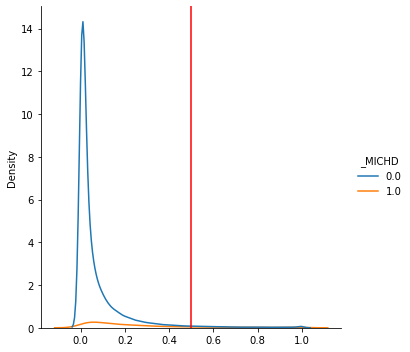

In [318]:
model_performance_reports(gbc_tuned, X_test, y_test)

In [319]:
scores = calc_model_scores(gbc_tuned, X_test, y_test)
update_scorecard('GradientBoosting: lr=1, n_est=200, max_depth=5', scores)
model_scorecard

Recall Score, pos=1  \
Random Forest, max_depth=10, n_est=30                          0.018051   
Random Forest, max_depth=20, n_est=12                          0.068592   
Random Forest, max_depth=None, n_est=1                         0.234072   
Decision Tree - default settings                               0.248707   
Decision Tree - tuned (best=default)                           0.234072   
AdaBoost Decision Tree default                                 0.242658   
AdaBoost Decision Tree n_est=10, lr=5                          1.000000   
Logistic Regression - default settings                         0.118506   
Logistic Regression, C=5                                       0.118506   
AdaBoosted Logistic Regression C=5 - default                   0.128012   
AdaBoosted Logistic Regression C=5: n_estimator...             0.128012   
AdaBoosted Logistic Regression C=5: n_estimator...             0.671383   
AdaBoosted Logistic Regression C=5: n_estimator...             0.671383   
GradientBoosting - default                                     0.099424   
GradientBoosting: lr=1, n_est=200, max_depth=5                 0.157088   

                                                    Accuracy  \
Random Forest, max_depth=10, n_est=30               0.915058   
Random Forest, max_depth=20, n_est=12               0.914347   
Random Forest, max_depth=None, n_est=1              0.865450   
Decision Tree - default settings                    0.865701   
Decision Tree - tuned (best=default)                0.865450   
AdaBoost Decision Tree default                      0.865651   
AdaBoost Decision Tree n_est=10, lr=5               0.085753   
Logistic Regression - default settings              0.916071   
Logistic Regression, C=5                            0.916062   
AdaBoosted Logistic Regression C=5 - default        0.915845   
AdaBoosted Logistic Regression C=5: n_estimator...  0.915845   
AdaBoosted Logistic Regression C=5: n_estimator...  0.818762   
AdaBoosted Logistic Regression C=5: n_estimator...  0.818762   
GradientBoosting - default                          0.916313   
GradientBoosting: lr=1, n_est=200, max_depth=5      0.907369   

                                                    Cohen Kappa Score  \
Random Forest, max_depth=10, n_est=30                        0.030852   
Random Forest, max_depth=20, n_est=12                        0.102326   
Random Forest, max_depth=None, n_est=1                       0.156114   
Decision Tree - default settings                             0.167461   
Decision Tree - tuned (best=default)                         0.156114   
AdaBoost Decision Tree default                               0.162905   
AdaBoost Decision Tree n_est=10, lr=5                        0.000000   
Logistic Regression - default settings                       0.168614   
Logistic Regression, C=5                                     0.168588   
AdaBoosted Logistic Regression C=5 - default                 0.179924   
AdaBoosted Logistic Regression C=5: n_estimator...           0.179924   
AdaBoosted Logistic Regression C=5: n_estimator...           0.303628   
AdaBoosted Logistic Regression C=5: n_estimator...           0.303628   
GradientBoosting - default                                   0.147520   
GradientBoosting: lr=1, n_est=200, max_depth=5               0.185822   

                                                    Bias Error  \
Random Forest, max_depth=10, n_est=30                 0.984682   
Random Forest, max_depth=20, n_est=12                 0.930088   
Random Forest, max_depth=None, n_est=1                0.775627   
Decision Tree - default settings                      0.753646   
Decision Tree - tuned (best=default)                  0.766063   
AdaBoost Decision Tree default                        0.750557   
AdaBoost Decision Tree n_est=10, lr=5                 0.000000   
Logistic Regression - default settings                0.882998   
Logistic Regression, C=5                              0.882998 

## Model: GaussianNB

In [341]:
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_numeric, y, test_size=0.3, random_state=42)

scale_num = StandardScaler()
X_train_num = scale_num.fit_transform(X_train_num)
X_test_num = scale_num.transform(X_test_num)

In [343]:
gnb = GaussianNB()

gnb.fit(X_train_num, y_train_num)

GaussianNB()


Confusion Matrix
[[100417   8898]
 [  7073   3129]]

Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93    109315
         1.0       0.26      0.31      0.28     10202

    accuracy                           0.87    119517
   macro avg       0.60      0.61      0.60    119517
weighted avg       0.88      0.87      0.87    119517


Distribution of probabilities for the response class


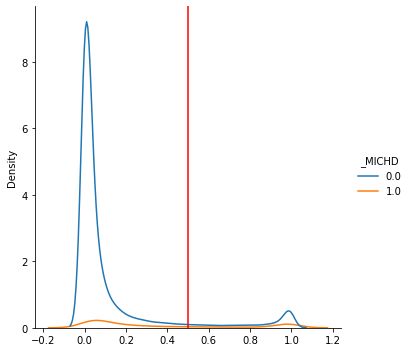

In [344]:
model_performance_reports(gnb, X_test_num, y_test_num)

In [346]:
scores = calc_model_scores(gnb, X_test_num, y_test_num)
update_scorecard('GaussianNB - default', scores)
model_scorecard

Recall Score, pos=1  \
Random Forest, max_depth=10, n_est=30                          0.018051   
Random Forest, max_depth=20, n_est=12                          0.068592   
Random Forest, max_depth=None, n_est=1                         0.234072   
Decision Tree - default settings                               0.248707   
Decision Tree - tuned (best=default)                           0.234072   
AdaBoost Decision Tree default                                 0.242658   
AdaBoost Decision Tree n_est=10, lr=5                          1.000000   
Logistic Regression - default settings                         0.118506   
Logistic Regression, C=5                                       0.118506   
AdaBoosted Logistic Regression C=5 - default                   0.128012   
AdaBoosted Logistic Regression C=5: n_estimator...             0.128012   
AdaBoosted Logistic Regression C=5: n_estimator...             0.671383   
AdaBoosted Logistic Regression C=5: n_estimator...             0.671383   
GradientBoosting - default                                     0.099424   
GradientBoosting: lr=1, n_est=200, max_depth=5                 0.157088   
BernoulliNB - default                                          0.492452   
GaussianNB - default                                           0.306705   

                                                    Accuracy  \
Random Forest, max_depth=10, n_est=30               0.915058   
Random Forest, max_depth=20, n_est=12               0.914347   
Random Forest, max_depth=None, n_est=1              0.865450   
Decision Tree - default settings                    0.865701   
Decision Tree - tuned (best=default)                0.865450   
AdaBoost Decision Tree default                      0.865651   
AdaBoost Decision Tree n_est=10, lr=5               0.085753   
Logistic Regression - default settings              0.916071   
Logistic Regression, C=5                            0.916062   
AdaBoosted Logistic Regression C=5 - default        0.915845   
AdaBoosted Logistic Regression C=5: n_estimator...  0.915845   
AdaBoosted Logistic Regression C=5: n_estimator...  0.818762   
AdaBoosted Logistic Regression C=5: n_estimator...  0.818762   
GradientBoosting - default                          0.916313   
GradientBoosting: lr=1, n_est=200, max_depth=5      0.907369   
BernoulliNB - default                               0.849026   
GaussianNB - default                                0.866370   

                                                    Cohen Kappa Score  \
Random Forest, max_depth=10, n_est=30                        0.030852   
Random Forest, max_depth=20, n_est=12                        0.102326   
Random Forest, max_depth=None, n_est=1                       0.156114   
Decision Tree - default settings                             0.167461   
Decision Tree - tuned (best=default)                         0.156114   
AdaBoost Decision Tree default                               0.162905   
AdaBoost Decision Tree n_est=10, lr=5                        0.000000   
Logistic Regression - default settings                       0.168614   
Logistic Regression, C=5                                     0.168588   
AdaBoosted Logistic Regression C=5 - default                 0.179924   
AdaBoosted Logistic Regression C=5: n_estimator...           0.179924   
AdaBoosted Logistic Regression C=5: n_estimator...           0.303628   
AdaBoosted Logistic Regression C=5: n_estimator...           0.303628   
GradientBoosting - default                                   0.147520   
GradientBoosting: lr=1, n_est=200, max_depth=5               0.185822   
BernoulliNB - default                                        0.279330   
GaussianNB - default                                         0.208406   

                                                    Bias Error  \
Random Forest, max_depth=10, n_est=30                 0.984682   
Random Forest, max_depth=20, n_est=12                 0.930088   
Random Forest, max_depth=None, n_es

## Model: BernoulliNB

In [331]:
X_train_cat_enc, X_test_cat_enc, y_train_cat_enc, y_test_cat_enc = train_test_split(X_categoric_encoded, y, 
                                                                                   test_size=0.3,
                                                                                   random_state=42)

In [332]:
bnb = BernoulliNB()

bnb.fit(X_train_cat_enc, y_train_cat_enc)

BernoulliNB()


Confusion Matrix
[[96449 12866]
 [ 5178  5024]]

Classification report
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91    109315
         1.0       0.28      0.49      0.36     10202

    accuracy                           0.85    119517
   macro avg       0.61      0.69      0.64    119517
weighted avg       0.89      0.85      0.87    119517


Distribution of probabilities for the response class


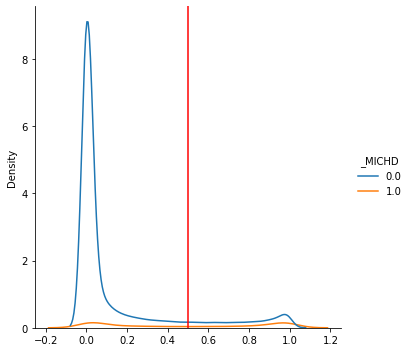

In [333]:
model_performance_reports(bnb, X_test_cat_enc, y_test_cat_enc)

In [334]:
scores = calc_model_scores(bnb, X_test_cat_enc, y_test_cat_enc)
update_scorecard('BernoulliNB - default', scores)
model_scorecard

Recall Score, pos=1  \
Random Forest, max_depth=10, n_est=30                          0.018051   
Random Forest, max_depth=20, n_est=12                          0.068592   
Random Forest, max_depth=None, n_est=1                         0.234072   
Decision Tree - default settings                               0.248707   
Decision Tree - tuned (best=default)                           0.234072   
AdaBoost Decision Tree default                                 0.242658   
AdaBoost Decision Tree n_est=10, lr=5                          1.000000   
Logistic Regression - default settings                         0.118506   
Logistic Regression, C=5                                       0.118506   
AdaBoosted Logistic Regression C=5 - default                   0.128012   
AdaBoosted Logistic Regression C=5: n_estimator...             0.128012   
AdaBoosted Logistic Regression C=5: n_estimator...             0.671383   
AdaBoosted Logistic Regression C=5: n_estimator...             0.671383   
GradientBoosting - default                                     0.099424   
GradientBoosting: lr=1, n_est=200, max_depth=5                 0.157088   
GaussianNB - default                                           0.298239   
BernoulliNB - default                                          0.492452   

                                                    Accuracy  \
Random Forest, max_depth=10, n_est=30               0.915058   
Random Forest, max_depth=20, n_est=12               0.914347   
Random Forest, max_depth=None, n_est=1              0.865450   
Decision Tree - default settings                    0.865701   
Decision Tree - tuned (best=default)                0.865450   
AdaBoost Decision Tree default                      0.865651   
AdaBoost Decision Tree n_est=10, lr=5               0.085753   
Logistic Regression - default settings              0.916071   
Logistic Regression, C=5                            0.916062   
AdaBoosted Logistic Regression C=5 - default        0.915845   
AdaBoosted Logistic Regression C=5: n_estimator...  0.915845   
AdaBoosted Logistic Regression C=5: n_estimator...  0.818762   
AdaBoosted Logistic Regression C=5: n_estimator...  0.818762   
GradientBoosting - default                          0.916313   
GradientBoosting: lr=1, n_est=200, max_depth=5      0.907369   
GaussianNB - default                                0.861441   
BernoulliNB - default                               0.849026   

                                                    Cohen Kappa Score  \
Random Forest, max_depth=10, n_est=30                        0.030852   
Random Forest, max_depth=20, n_est=12                        0.102326   
Random Forest, max_depth=None, n_est=1                       0.156114   
Decision Tree - default settings                             0.167461   
Decision Tree - tuned (best=default)                         0.156114   
AdaBoost Decision Tree default                               0.162905   
AdaBoost Decision Tree n_est=10, lr=5                        0.000000   
Logistic Regression - default settings                       0.168614   
Logistic Regression, C=5                                     0.168588   
AdaBoosted Logistic Regression C=5 - default                 0.179924   
AdaBoosted Logistic Regression C=5: n_estimator...           0.179924   
AdaBoosted Logistic Regression C=5: n_estimator...           0.303628   
AdaBoosted Logistic Regression C=5: n_estimator...           0.303628   
GradientBoosting - default                                   0.147520   
GradientBoosting: lr=1, n_est=200, max_depth=5               0.185822   
GaussianNB - default                                         0.194246   
BernoulliNB - default                                        0.279330   

                                                    Bias Error  \
Random Forest, max_depth=10, n_est=30                 0.984682   
Random Forest, max_depth=20, n_est=12                 0.930088   
Random Forest, max_depth=None, n_es

In [356]:
# comparing gaussianNB preds and BernoulliNB preds

y_test_prob_preds_gaussian = gnb.predict_proba(X_test_num)[:, 1]

y_test_prob_preds_bernoulli = bnb.predict_proba(X_test_cat_enc)[:, 1]

Trying to plot the preds to see how the two predictions would work together

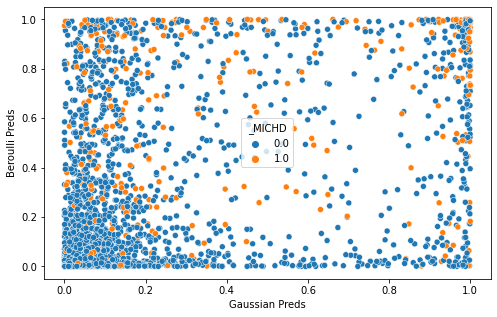

In [364]:
sns.scatterplot(x=y_test_prob_preds_gaussian[-5000:], y=y_test_prob_preds_bernoulli[-5000:], hue=y_test_num[-5000:])
plt.xlabel('Gaussian Preds')
plt.ylabel('Beroulli Preds')
plt.show()

There doesn't seem to be any distinct pattern to the models' mistakes in predictions

## Model: AdaBoost BernoulliNB

In [373]:
ada_bnb = AdaBoostClassifier(base_estimator=BernoulliNB())

ada_bnb.fit(X_train_cat_enc, y_train_cat_enc)

AdaBoostClassifier(base_estimator=BernoulliNB())


Confusion Matrix
[[    32 109283]
 [     1  10201]]

Classification report
              precision    recall  f1-score   support

         0.0       0.97      0.00      0.00    109315
         1.0       0.09      1.00      0.16     10202

    accuracy                           0.09    119517
   macro avg       0.53      0.50      0.08    119517
weighted avg       0.89      0.09      0.01    119517


Distribution of probabilities for the response class


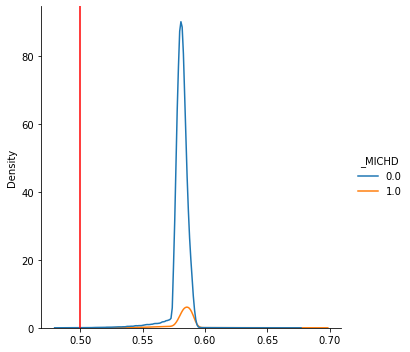

In [374]:
model_performance_reports(ada_bnb, X_test_cat_enc, y_test_cat_enc)

In [375]:
scores = calc_model_scores(ada_bnb, X_test_cat_enc, y_test_cat_enc)
update_scorecard('AdaBoost BernoulliNB - default', scores)
model_scorecard

Recall Score, pos=1  \
Random Forest, max_depth=10, n_est=30                          0.018051   
Random Forest, max_depth=20, n_est=12                          0.068592   
Random Forest, max_depth=None, n_est=1                         0.234072   
Decision Tree - default settings                               0.248707   
Decision Tree - tuned (best=default)                           0.234072   
AdaBoost Decision Tree default                                 0.242658   
AdaBoost Decision Tree n_est=10, lr=5                          1.000000   
Logistic Regression - default settings                         0.118506   
Logistic Regression, C=5                                       0.118506   
AdaBoosted Logistic Regression C=5 - default                   0.128012   
AdaBoosted Logistic Regression C=5: n_estimator...             0.128012   
AdaBoosted Logistic Regression C=5: n_estimator...             0.671383   
AdaBoosted Logistic Regression C=5: n_estimator...             0.671383   
GradientBoosting - default                                     0.099424   
GradientBoosting: lr=1, n_est=200, max_depth=5                 0.157088   
BernoulliNB - default                                          0.492452   
GaussianNB - default                                           0.306705   
AdaBoost BernoulliNB - default                                 0.999902   

                                                    Accuracy  \
Random Forest, max_depth=10, n_est=30               0.915058   
Random Forest, max_depth=20, n_est=12               0.914347   
Random Forest, max_depth=None, n_est=1              0.865450   
Decision Tree - default settings                    0.865701   
Decision Tree - tuned (best=default)                0.865450   
AdaBoost Decision Tree default                      0.865651   
AdaBoost Decision Tree n_est=10, lr=5               0.085753   
Logistic Regression - default settings              0.916071   
Logistic Regression, C=5                            0.916062   
AdaBoosted Logistic Regression C=5 - default        0.915845   
AdaBoosted Logistic Regression C=5: n_estimator...  0.915845   
AdaBoosted Logistic Regression C=5: n_estimator...  0.818762   
AdaBoosted Logistic Regression C=5: n_estimator...  0.818762   
GradientBoosting - default                          0.916313   
GradientBoosting: lr=1, n_est=200, max_depth=5      0.907369   
BernoulliNB - default                               0.849026   
GaussianNB - default                                0.866370   
AdaBoost BernoulliNB - default                      0.085620   

                                                    Cohen Kappa Score  \
Random Forest, max_depth=10, n_est=30                        0.030852   
Random Forest, max_depth=20, n_est=12                        0.102326   
Random Forest, max_depth=None, n_est=1                       0.156114   
Decision Tree - default settings                             0.167461   
Decision Tree - tuned (best=default)                         0.156114   
AdaBoost Decision Tree default                               0.162905   
AdaBoost Decision Tree n_est=10, lr=5                        0.000000   
Logistic Regression - default settings                       0.168614   
Logistic Regression, C=5                                     0.168588   
AdaBoosted Logistic Regression C=5 - default                 0.179924   
AdaBoosted Logistic Regression C=5: n_estimator...           0.179924   
AdaBoosted Logistic Regression C=5: n_estimator...           0.303628   
AdaBoosted Logistic Regression C=5: n_estimator...           0.303628   
GradientBoosting - default                                   0.147520   
GradientBoosting: lr=1, n_est=200, max_depth=5               0.185822   
BernoulliNB - default                                        0.279330   
GaussianNB - default                                         0.208406   
AdaBoost BernoulliNB - default                               0.000033   

                     

## Model: KNN

In [261]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()


Confusion Matrix
[[107982   1286]
 [  9438    811]]

Classification report
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95    109268
         1.0       0.39      0.08      0.13     10249

    accuracy                           0.91    119517
   macro avg       0.65      0.53      0.54    119517
weighted avg       0.87      0.91      0.88    119517


Distribution of probabilities for the response class


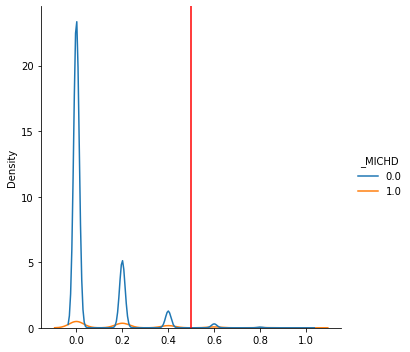

In [263]:
model_performance_reports(knn, X_test, y_test)

## Model : XGBoost 

In [88]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [89]:
import xgboost as xgb

In [97]:
clf_xgb = xgb.XGBClassifier(seed=42)
clf_xgb.fit(X_train_full, 
            y_train, 
            verbose=True, 
           eval_set=[(X_test_full, y_test)], 
           eval_metric='auc')

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82566
[1]	validation_0-auc:0.83046
[2]	validation_0-auc:0.83316
[3]	validation_0-auc:0.83559
[4]	validation_0-auc:0.83743
[5]	validation_0-auc:0.83852
[6]	validation_0-auc:0.83919
[7]	validation_0-auc:0.84007
[8]	validation_0-auc:0.84063
[9]	validation_0-auc:0.84149
[10]	validation_0-auc:0.84213
[11]	validation_0-auc:0.84298
[12]	validation_0-auc:0.84328
[13]	validation_0-auc:0.84385
[14]	validation_0-auc:0.84421
[15]	validation_0-auc:0.84439
[16]	validation_0-auc:0.84451
[17]	validation_0-auc:0.84485
[18]	validation_0-auc:0.84516
[19]	validation_0-auc:0.84516
[20]	validation_0-auc:0.84543
[21]	validation_0-auc:0.84550
[22]	validation_0-auc:0.84553
[23]	validation_0-auc:0.84567
[24]	validation_0-auc:0.84569
[25]	validation_0-auc:0.84585
[26]	validation_0-auc:0.84599
[27]	validation_0-auc:0.84597
[28]	validation_0-auc:0.84593
[29]	validation_0-auc:0.84593
[30]	validation_0-auc:0.84592
[31]	validation_0-auc:0.84590
[32]	validation_0-auc:0.84593
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)


Confusion Matrix
[[253620   1336]
 [ 20180   3734]]

Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96    254956
         1.0       0.74      0.16      0.26     23914

    accuracy                           0.92    278870
   macro avg       0.83      0.58      0.61    278870
weighted avg       0.91      0.92      0.90    278870


Distribution of probabilities for the response class


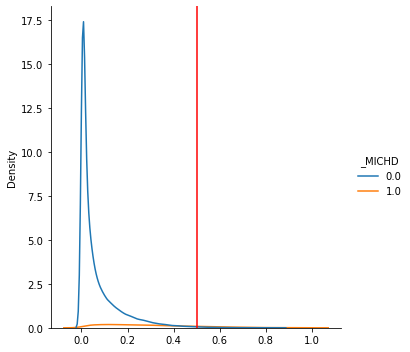

In [99]:
model_performance_reports(clf_xgb, X_train_full, y_train)


Confusion Matrix
[[108369    899]
 [  9152   1097]]

Classification report
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96    109268
         1.0       0.55      0.11      0.18     10249

    accuracy                           0.92    119517
   macro avg       0.74      0.55      0.57    119517
weighted avg       0.89      0.92      0.89    119517


Distribution of probabilities for the response class


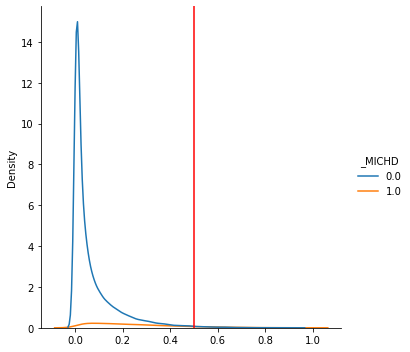

In [98]:
model_performance_reports(clf_xgb, X_test_full, y_test)

In [94]:
scores = calc_model_scores(clf_xgb, X_train_full, y_train, X_test_full, y_test)
update_scorecard('XGBoost - default', scores)
model_scorecard

Recall Score, pos=1  \
Decision Tree with Grouped Categories - default             0.257879   
Random Forest with Grouped Categories - default             0.089179   
XGBoost - default                                           0.107035   

                                                 Accuracy  Cohen Kappa Score  \
Decision Tree with Grouped Categories - default  0.862296           0.167633   
Random Forest with Grouped Categories - default  0.915025           0.130958   
XGBoost - default                                0.915903           0.155568   

                                                 Bias Error  Variance Error  \
Decision Tree with Grouped Categories - default    0.746788        0.006890   
Random Forest with Grouped Categories - default    0.907107        0.003142   
XGBoost - default                                  0.894018        0.003012   

                                                 ROC-AUC score  Best Youden  \
Decision Tree with Grouped Categories - default       0.585652     0.184886   
Random Forest with Grouped Categories - default       0.822805     0.493839   
XGBoost - default                                     0.842923     0.534224   

                                                 Best Threshold  
Decision Tree with Grouped Categories - default        0.100000  
Random Forest with Grouped Categories - default        0.110755  
XGBoost - default                                      0.076847

## Model: Tuned XGBoost 

In [129]:
clf_xgb_2 = xgb.XGBClassifier(seed=42, n_estimators=50, max_depth=5, learning_rate=0.3)
clf_xgb_2.fit(X_train_full, 
            y_train, 
            verbose=True, 
           eval_set=[(X_test_full, y_test)], 
           eval_metric='auc',)

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81718
[1]	validation_0-auc:0.82372
[2]	validation_0-auc:0.83134
[3]	validation_0-auc:0.83278
[4]	validation_0-auc:0.83454
[5]	validation_0-auc:0.83594
[6]	validation_0-auc:0.83690
[7]	validation_0-auc:0.83757
[8]	validation_0-auc:0.83898
[9]	validation_0-auc:0.84045
[10]	validation_0-auc:0.84110
[11]	validation_0-auc:0.84182
[12]	validation_0-auc:0.84231
[13]	validation_0-auc:0.84303
[14]	validation_0-auc:0.84346
[15]	validation_0-auc:0.84410
[16]	validation_0-auc:0.84469
[17]	validation_0-auc:0.84478
[18]	validation_0-auc:0.84513
[19]	validation_0-auc:0.84527
[20]	validation_0-auc:0.84564
[21]	validation_0-auc:0.84573
[22]	validation_0-auc:0.84585
[23]	validation_0-auc:0.84598
[24]	validation_0-auc:0.84606
[25]	validation_0-auc:0.84606
[26]	validation_0-auc:0.84608
[27]	validation_0-auc:0.84616
[28]	validation_0-auc:0.84619
[29]	validation_0-auc:0.84622
[30]	validation_0-auc:0.84634
[31]	validation_0-auc:0.84631
[32]	validation_0-auc:0.84637
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [130]:
clf_xgb_n50_md5_lr3 = clf_xgb_2.evals_result_
clf_xgb_n50_md5_lr3

{'validation_0': OrderedDict([('auc',
               [0.8171839018770499,
                0.8237183796562922,
                0.8313442525504869,
                0.8327818247767,
                0.8345394313150668,
                0.835936913808428,
                0.836902244947532,
                0.837571435687448,
                0.8389815529294502,
                0.840449958603529,
                0.8410985669231351,
                0.8418188596604789,
                0.8423129685646025,
                0.8430291693739173,
                0.8434578386827083,
                0.8441010348526614,
                0.8446941764516088,
                0.8447803984873012,
                0.8451333861026705,
                0.8452697176255879,
                0.8456396654231766,
                0.8457345517202255,
                0.8458500271346843,
                0.8459816104137838,
                0.8460603366088129,
                0.8460603580395325,
                0.846082596429407

In [114]:
clf_xgb_n150_md5
clf_xgb_n50_md5
clf_xgb_n50_md10
clf_xgb_n50_md15
clf_xgb_n50_md20
clf_xgb_n50_md25
clf_xgb_n50_md30

clf_xgb_n50_md5_lr01
clf_xgb_n50_md5_lr05
clf_xgb_n50_md5_lr3
clf_xgb_n50_md5_lr5
clf_xgb_n50_md5_lr_1
clf_xgb_n50_md5_lr_2

{'validation_0': OrderedDict([('auc',
               [0.8189626609821635,
                0.8209516576792003,
                0.8210701445562402,
                0.8210489223396547,
                0.8206607901299878,
                0.8204998775716564,
                0.8201575928148483,
                0.8207023460812409,
                0.8202862646413918,
                0.8204832727822042,
                0.820271460925335,
                0.820334579752321,
                0.8204851810091978,
                0.8207746738670408,
                0.8208378623438657,
                0.8210558645533944,
                0.820983950201894,
                0.8209929377099382,
                0.8211050797545482,
                0.8212545371467647,
                0.8213493292379419,
                0.8212989456160951,
                0.8211615684526491,
                0.8210176504549833,
                0.8211099748880899,
                0.8209072349227234,
                0.82054943745